# Real-Time Retail Feedback Intelligence

Business Context:
This problem is important to solve because retailers work on tight margins, and with online shopping, the chances of losing a sale to a competitor is much higher, than with in-store shopping. Having a rapid response system can give customers a feeling of enpowerment, that they are being listened to, and that their feedback is valuable to the company. This can be positive reenforcement, bringing the customer back to the retailer's site for repeat business. It can also aid in targetting customer trends, so that inventory is relevant, and the retailer's purchasing budget is most effectively used.

Objective:
Create the most effective type of Generative AI feedback system that uses prompt engineering to:
1. Analyze and categorize sentiment in real time.
2. Detect which product or servic eeach feedback refers to.
3. Summarize insights by product category and urgency level.
4. Automatically gnerate and send short, personalized messages to customers based on sentiment — thanking them for positive feedback, acknowledging neutral comments, and apologizing for negative ones.
5. Generate short, actionable reports for retail teams and aggregate results quickly.

This  system should aid retailers in taking quick action on customer issues, improve product quality faster, and enhance customer satisfaction. This system can also aid in turning massive unstructured feedback into meaningful, real-time business intelligence that the retailer can make short and long term decisions on.

The dataset has 23486 entries. It has 9 columns:
1. the clothing ID
2. the age of the reviewer
3. the title of the review
4. the rating
5. the recommended.IND, which is a binary value of 0 or 1
6. the positive.feedback count, which tells the number of people who found the review helpful
7. the division name
8. the department name
9. the class name

### **Installing and Importing Necessary Libraries**
First, let's set up the environment by installing the required Python libraries.

In [ ]:
# Install the required libraries for the project
!pip install openai
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install nltk
!pip install wordcloud
!pip install textblob
!pip install transformers
!pip install torch
!pip install warnings

ERROR: Could not find a version that satisfies the requirement warnings (from versions: none)
ERROR: No matching distribution found for warnings


In [ ]:
# Import the required libraries for the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')


### **Data Loading**
### Loading and Understanding the Data


I loaded the data from the uploaded file, rather than from my google drive.

In [ ]:
DATA_PATH = "/content/Dataset - Real-Time Retail Feedback Intelligence.csv"
review = pd.read_csv(DATA_PATH, sep=None, engine='python', on_bad_lines='warn')
review.head()

Unnamed: 0  Clothing.ID  Age                    Title  \
0           1          767   33                      NaN   
1           2         1080   34                      NaN   
2           3         1077   60  Some major design flaws   
3           4         1049   50         My favorite buy!   
4           5          847   47         Flattering shirt   

                                         Review.Text  Rating  Recommended.IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   Positive.Feedback.Count   Division.Name Department.Name Class.Name  
0                        0       Initmates        Intimate  Intimates  
1                        4         General         Dresses    Dresses  
2                        0         General         Dresses    Dresses  
3                        0  General Petite         Bottoms      Pants  
4                        6         General            Tops    Blouses

### **Sanity checks**

### **Data Overview**

In [ ]:
print('\nThis is the descripton\n', review.describe(), '\n')
print('\nThis is the info\n', review.info(), '\n')
print('\nThis is the null values\n', review.isnull().sum(), '\n')



This is the descripton
          Unnamed: 0   Clothing.ID           Age        Rating  \
count  23486.000000  23486.000000  23486.000000  23486.000000   
mean   11743.500000    918.118709     43.198544      4.196032   
std     6779.968547    203.298980     12.279544      1.110031   
min        1.000000      0.000000     18.000000      1.000000   
25%     5872.250000    861.000000     34.000000      4.000000   
50%    11743.500000    936.000000     41.000000      5.000000   
75%    17614.750000   1078.000000     52.000000      5.000000   
max    23486.000000   1205.000000     99.000000      5.000000   

       Recommended.IND  Positive.Feedback.Count  
count     23486.000000             23486.000000  
mean          0.822362                 2.535936  
std           0.382216                 5.702202  
min           0.000000                 0.000000  
25%           1.000000                 0.000000  
50%           1.000000                 1.000000  
75%           1.000000                 

### **Data Cleaning and Preprocessing**

**Think about it:** The Review Text column is the most critical feature for our Generative AI model. What should be done with rows where this text is missing?

There are 3810 missing titles and 845 missing reviews. The titles can be replaced. The null values need to be filled or dropped.

In [ ]:
review1 = review.copy()
review1['Title'].fillna('My Review', inplace=True)
review1.head()
#review1['Review Text'].fillna('No Review', inplace=True

Unnamed: 0  Clothing.ID  Age                    Title  \
0           1          767   33                My Review   
1           2         1080   34                My Review   
2           3         1077   60  Some major design flaws   
3           4         1049   50         My favorite buy!   
4           5          847   47         Flattering shirt   

                                         Review.Text  Rating  Recommended.IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   Positive.Feedback.Count   Division.Name Department.Name Class.Name  
0                        0       Initmates        Intimate  Intimates  
1                        4         General         Dresses    Dresses  
2                        0         General         Dresses    Dresses  
3                        0  General Petite         Bottoms      Pants  
4                        6         General            Tops    Blouses

In [ ]:
review1.isnull().sum()

Unnamed: 0                   0
Clothing.ID                  0
Age                          0
Title                        0
Review.Text                845
Rating                       0
Recommended.IND              0
Positive.Feedback.Count      0
Division.Name               14
Department.Name             14
Class.Name                  14
dtype: int64

In [ ]:
no_review1 = review1[review1['Review.Text'].isnull()]
print(no_review1.shape)
no_review1.head()

(845, 11)


Unnamed: 0  Clothing.ID  Age      Title Review.Text  Rating  \
92           93          861   23  My Review         NaN       5   
93           94         1081   31  My Review         NaN       5   
98           99         1133   50  My Review         NaN       5   
135         136          861   35  My Review         NaN       4   
142         143         1126   35  My Review         NaN       5   

     Recommended.IND  Positive.Feedback.Count   Division.Name Department.Name  \
92                 1                        0  General Petite            Tops   
93                 1                        0         General         Dresses   
98                 1                        0         General         Jackets   
135                1                        0  General Petite            Tops   
142                1                        0         General         Jackets   

    Class.Name  
92       Knits  
93     Dresses  
98   Outerwear  
135      Knits  
142  Outerwear

If there is no review, these records are of no value, so they will be dropped.

In [ ]:
review1.dropna(inplace=True)
review1.isnull().sum()

Unnamed: 0                 0
Clothing.ID                0
Age                        0
Title                      0
Review.Text                0
Rating                     0
Recommended.IND            0
Positive.Feedback.Count    0
Division.Name              0
Department.Name            0
Class.Name                 0
dtype: int64

The reviews, titles, division names, department names, and class names all need to be turned into string data types. The unnamed column does not seem to serve a purpose, so it will be dropped from the dataset.

In [ ]:
review2 = review1.copy()
# Drop the 'Unnamed: 0' column directly from the DataFrame
review2 = review2.drop('Unnamed: 0', axis=1)
review2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22628 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing.ID              22628 non-null  int64 
 1   Age                      22628 non-null  int64 
 2   Title                    22628 non-null  object
 3   Review.Text              22628 non-null  object
 4   Rating                   22628 non-null  int64 
 5   Recommended.IND          22628 non-null  int64 
 6   Positive.Feedback.Count  22628 non-null  int64 
 7   Division.Name            22628 non-null  object
 8   Department.Name          22628 non-null  object
 9   Class.Name               22628 non-null  object
dtypes: int64(5), object(5)
memory usage: 1.9+ MB


In [ ]:
print(type(review2['Title'][100]))
print(review2['Review.Text'][100])

<class 'str'>
At first i wasn't sure about it. the neckline is much lower and wavy than i thought. but after wearing it, it really is comfortable. it stretches a lot, so i wear a cami underneath so when i lean forward i'm not showing the world my torso.


In [ ]:
review2['Review.Text'] = review2['Review.Text'].astype(str)
review2['Title'] = review2['Title'].astype(str)
review2['Division.Name'] = review2['Division.Name'].astype(str)
review2['Department.Name'] = review2['Department.Name'].astype(str)
review2['Class.Name'] = review2['Class.Name'].astype(str)
review2 = review2.reset_index()
review2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22628 entries, 0 to 22627
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   index                    22628 non-null  int64 
 1   Clothing.ID              22628 non-null  int64 
 2   Age                      22628 non-null  int64 
 3   Title                    22628 non-null  object
 4   Review.Text              22628 non-null  object
 5   Rating                   22628 non-null  int64 
 6   Recommended.IND          22628 non-null  int64 
 7   Positive.Feedback.Count  22628 non-null  int64 
 8   Division.Name            22628 non-null  object
 9   Department.Name          22628 non-null  object
 10  Class.Name               22628 non-null  object
dtypes: int64(6), object(5)
memory usage: 1.9+ MB


### **Exploratory Data Analysis**

EDA is an important part of any project involving data. It is important to investigate and understand the data better before building a model with it. A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data. A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions:**

1.  What is the summary statistics of the numerical data? What can you infer about the distribution of Age, Rating, and Positive Feedback Count?
    
2.  How many unique values are there in the categorical columns like Division Name, Department Name, and Class Name?
    
3.  What is the overall distribution of product Rating? Is the dataset skewed towards positive or negative reviews?
    
4.  Which Department Name receives the highest average rating, and which receives the lowest? What might this indicate?
    
5.  What are the most common words found in highly-rated reviews (4-5 stars) versus poorly-rated reviews (1-2 stars)? (Hint: Use Word Clouds). What initial hypotheses can you form about the key drivers of customer satisfaction and dissatisfaction?

Also write your observations for each questions.

# Univariate

The numerical variables can show us how the data is distributed.

In [ ]:
def histogram_boxplot(data, feature, figsize=(12,7), kde=True, bins=None):
    figure, (ax_box, ax_hist) = plt.subplots(2, sharex=False, figsize=figsize)
    #figure.set_facecolor('black')

    #plt.title(feature, color='white')

    sns.boxplot(data=data, x=feature, ax=ax_box, showmeans=True, color='violet')
    if bins == None:
        sns.set_style('dark')
        sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist)
    else:
        sns.set_style('dark')
        sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist, bins=bins)

    ax_hist.axvline(data[feature].mean(), color='green', linestyle='--')
    ax_hist.axvline(data[feature].median(), color='black', linestyle='-')

    """
    plt.title(feature, color='white')
    plt.xticks(rotation=0, color='white')
    plt.yticks(color='white')
    plt.xlabel(feature, color='white')
    plt.ylabel('count', color='white')
    """

    plt.show()


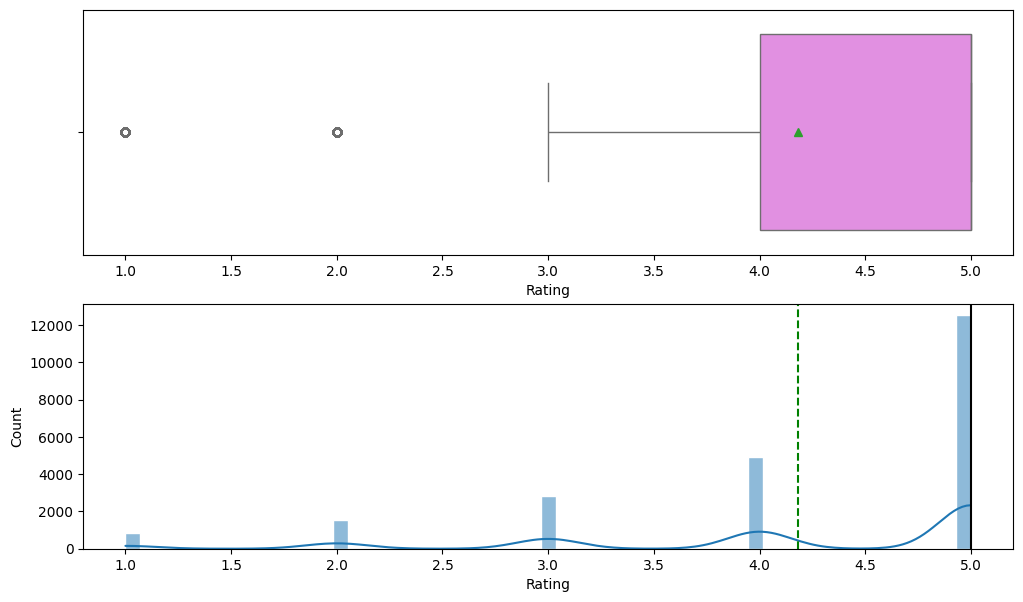

In [ ]:
histogram_boxplot(review2, 'Rating', figsize=(12,7), kde=True, bins=None)

Most of the reviews were positive, with a rating of 5, which is the best rating.

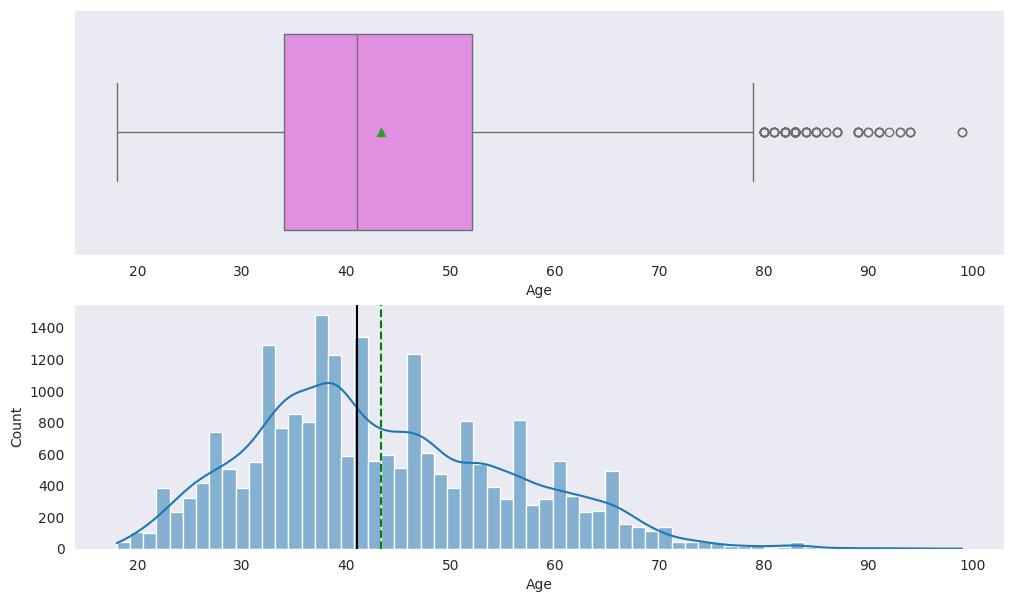

In [ ]:
histogram_boxplot(review2, 'Age', figsize=(12,7), kde=True, bins=None)

The age is skewed to the right, with a majority of the customers between the ages of 34 and 52.

In [ ]:
def labeled_barplot(data, feature, perc=False, n=None):
    total = len(data[feature])
    count = data[feature].nunique()
    #
    if n is None:
        plt.figure(figsize=(count + 1, 5), facecolor='black')
        plt.title(f'{feature}', color='white')
        plt.xticks(rotation=30, fontsize=15, color='white')
        plt.yticks(fontsize=15, color='white')
        plt.xlabel(feature, color='white')
        plt.ylabel('count', color='white')
    else:
        plt.figure(figsize=(n + 1, 5), facecolor='black')
        plt.title(f'{feature}', color='white')
        plt.xticks(rotation=30, fontsize=15, color='white')
        plt.yticks(fontsize=15, color='white')
        plt.xlabel(feature, color='white')
        plt.ylabel('count', color='white')

    sns.set_style('dark')
    ax = sns.countplot(
        data=data,
        x=feature,
        palette='Paired',
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    ax.xaxis.set_ticklabels(ax.get_xticklabels(), rotation=30, color='white')
    ax.yaxis.set_ticklabels(ax.get_yticklabels(), rotation=0, color='white')

    for p in ax.patches:
        if perc == True:
            label = '{:.1f}%'.format(
                100*p.get_height()/total
            )
        else:
            label = p.get_height()

        x = p.get_x() + p.get_width()/2
        y = p.get_height()

        ax.annotate(
            label,
            (x, y),
            ha='center',
            va='center',
            #color='white',
            size=12,
            xytext=(0,5),
            textcoords='offset points',
        )
    plt.show()

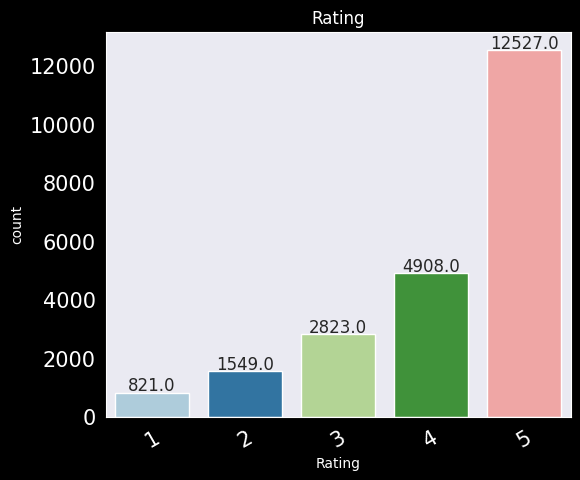

In [ ]:
labeled_barplot(review2, 'Rating')

Most of the ratings are positive, at 5, which is the highest rating. 55% are rated 5.

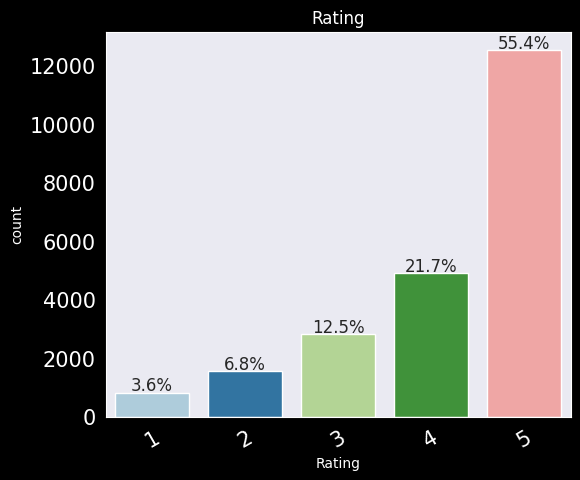

In [ ]:
labeled_barplot(review2, 'Rating', perc=True)

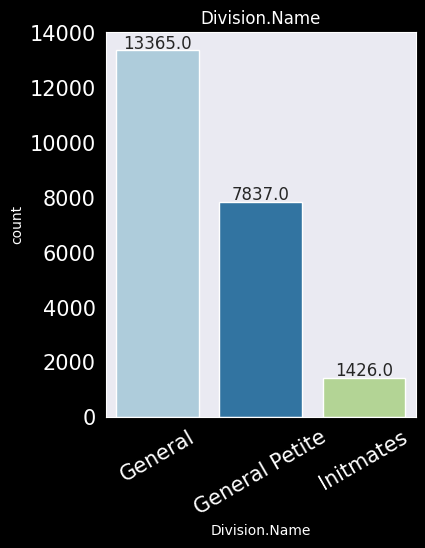

In [ ]:
labeled_barplot(review2, 'Division.Name')

General apparel sold the most.

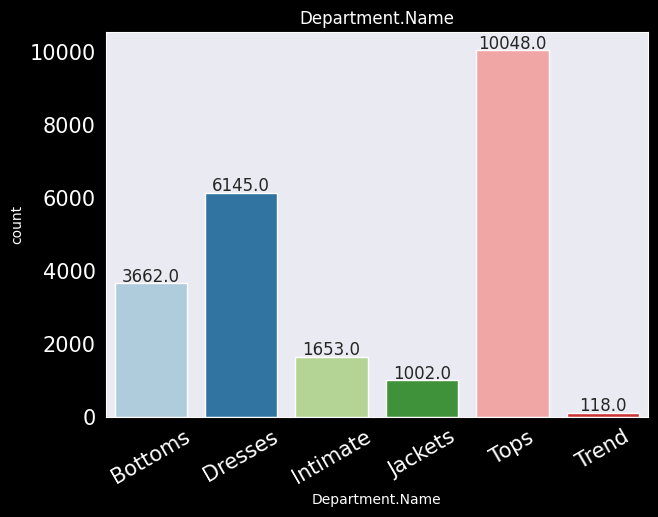

In [ ]:
labeled_barplot(review2, 'Department.Name')

Tops were the most popular items, and were the most frequently purchased.

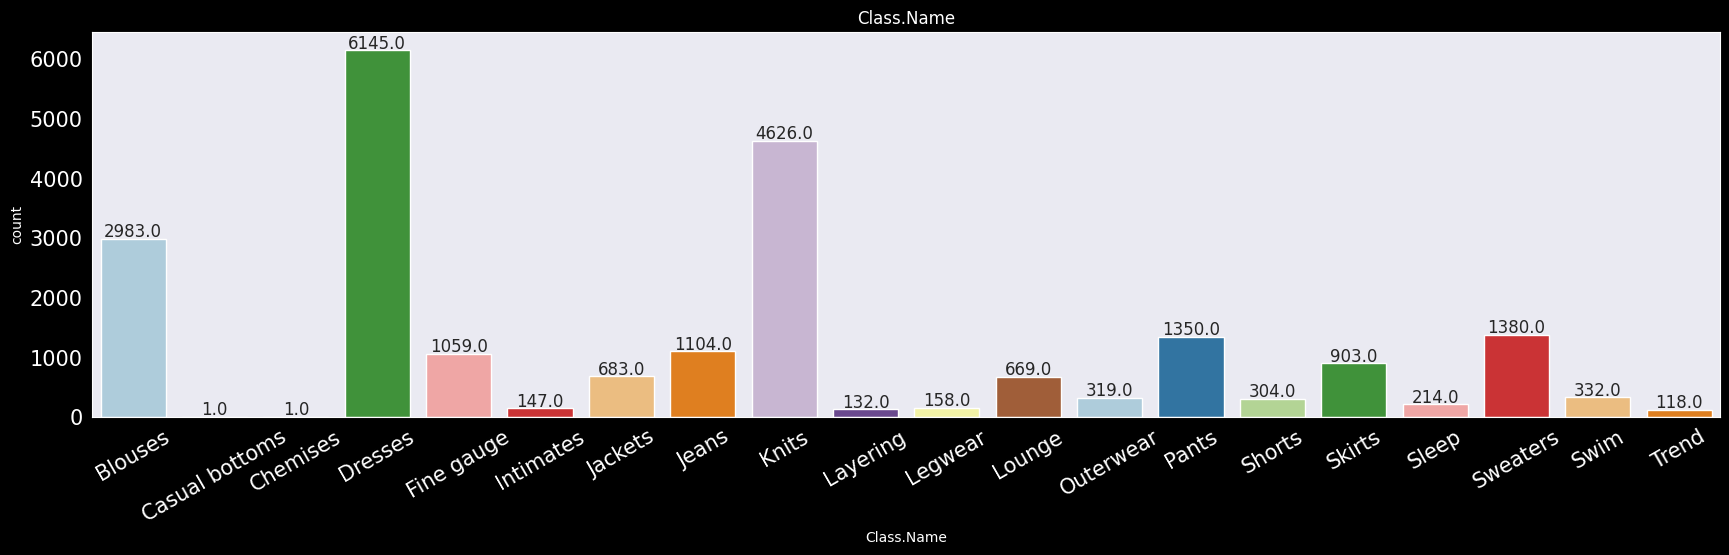

In [ ]:
labeled_barplot(review2, 'Class.Name')

The item most purchased was dresses. The second most purchased was knits, and the third was blouses. From this purchasig pattern, it might be inferred that most of the shoppers are women.

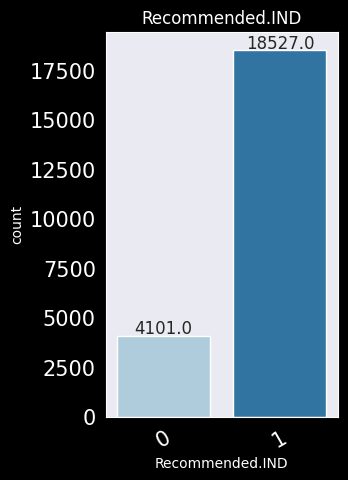

In [ ]:
labeled_barplot(review2, 'Recommended.IND')

Almost 4.5 thousand more products were recommended than not recommended. We can infer that most of the customers are satisfied, but deeper dives into the reviews need to be conducted to check for additional insights and mixed opinions.

In [ ]:
def top_ten_type_graph(data, feature):
    top_ten = data.nlargest(10, feature)

    fig, ax = plt.subplots(facecolor='black')
    plt.title('highest ' + f'{feature}', color = 'white')
    sns.barplot(data=top_ten, x='Class.Name', y=top_ten[feature])
    plt.yticks(fontsize=8, color='white')
    plt.xticks(fontsize=8, color='white')
    plt.xlabel(feature, color='white')
    plt.ylabel(feature, color='white')

    ax.bar_label(container=ax.containers[0], label_type='edge')

    plt.show()


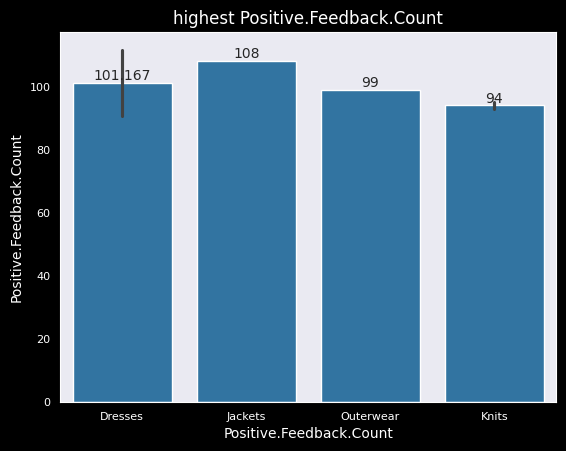

In [ ]:
top_ten_type_graph(review2, 'Positive.Feedback.Count')

The positive feedback shows how many people found the review helpful. This is an important metric, as it can be an indicator of future shoppers

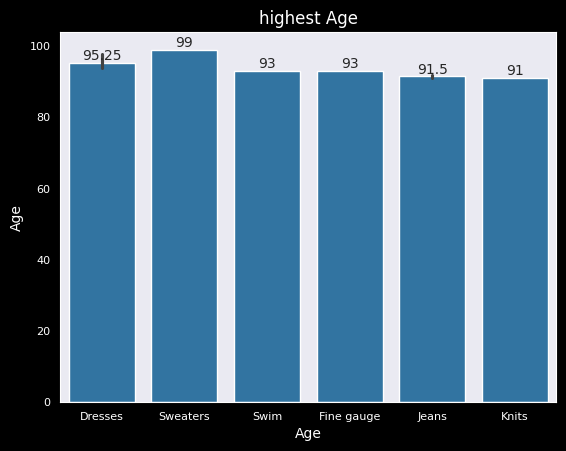

In [ ]:
top_ten_type_graph(review2, 'Age')

# Bivariate

In [ ]:
review2.head()

index  Clothing.ID  Age                    Title  \
0      0          767   33                My Review   
1      1         1080   34                My Review   
2      2         1077   60  Some major design flaws   
3      3         1049   50         My favorite buy!   
4      4          847   47         Flattering shirt   

                                         Review.Text  Rating  Recommended.IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   Positive.Feedback.Count   Division.Name Department.Name Class.Name  
0                        0       Initmates        Intimate  Intimates  
1                        4         General         Dresses    Dresses  
2                        0         General         Dresses    Dresses  
3                        0  General Petite         Bottoms      Pants  
4                        6         General            Tops    Blouses

In [ ]:
def labeled_barplot1(data, feature, target, perc=False, n=None):
    total = len(data[feature])
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5), facecolor='black')
    else:
        plt.figure(figsize=(n + 1, 5), facecolor='black')

    plt.title(f'{target}' + ' vs ' + f'{feature}', color='white')
    plt.xticks(rotation=30, fontsize=15, color='white')
    plt.yticks(fontsize=15, color='white')
    plt.xlabel(feature, color='white')
    plt.ylabel(target, color='white')
    sns.set_style('dark')
    ax = sns.barplot(
        data=data,
        x=feature,
        y=target,
        palette='Paired',
        order=data[feature].value_counts().index[:n].sort_values(),
        #edgecolor='black',
    )

    for p in ax.patches:
        if perc == True:
            label = '{:.1f}%'.format(
                100*p.get_height()/total
            )
        else:
            label = '{:.3f}'.format(p.get_height())

        x = p.get_x() + p.get_width()/2
        y = p.get_height()

        ax.annotate(
            label,
            (x, y),
            #ha='center',
            va='center',
            size=12,
            xytext=(0,5),
            textcoords='offset points',
        )
    plt.show()

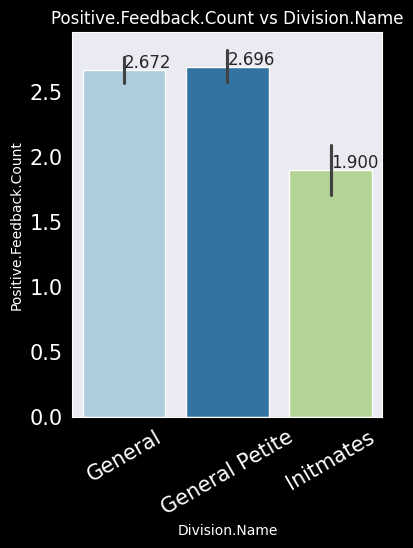

In [ ]:
labeled_barplot1(review2, 'Division.Name', 'Positive.Feedback.Count')

General petite had the most positive feedback, meaning that many potential shoppers found the information in the reviews that fall under this category helpful. Particular attention should be paid to these reviews.

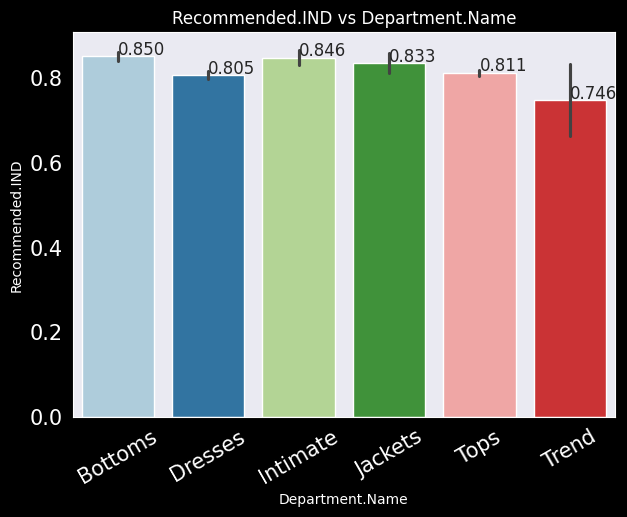

In [ ]:
labeled_barplot1(review2, 'Department.Name', 'Recommended.IND')

## Text Analysis

We can see a sample of the reviews and get a preliminary idea of how the reviews can be analyzed. Textblob and wordcloud can give some insight into the sentiment of the reviews.

Interpreting the Results
The sentiment property returns a named tuple with two float values:
polarity and subjectivity.

Polarity: A float value in the range [-1.0, 1.0].

     1.0 indicates a highly positive sentiment.

     -1.0 indicates a highly negative sentiment.

     0.0 indicates a neutral sentiment.

Subjectivity: A float value in the range [0.0, 1.0].

     1.0 indicates a highly subjective statement (personal opinion, emotion, or judgment).

     0.0 indicates a highly objective statement (factual information).

In [ ]:
from textblob import TextBlob
blob1 = TextBlob(review2['Review.Text'][0])
print(blob1.sentiment)

Sentiment(polarity=0.6333333333333333, subjectivity=0.9333333333333332)





This is the sentiment and the opinion for review with index 0 
 Sentiment(polarity=0.6333333333333333, subjectivity=0.9333333333333332)


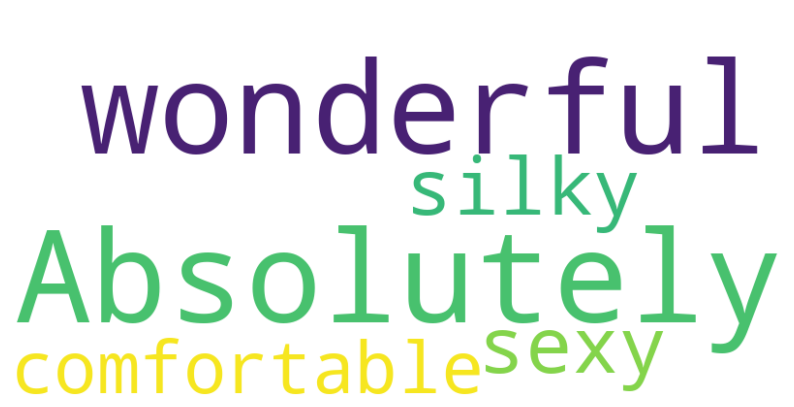




This is the sentiment and the opinion for review with index 1 
 Sentiment(polarity=0.33958333333333335, subjectivity=0.7250000000000001)


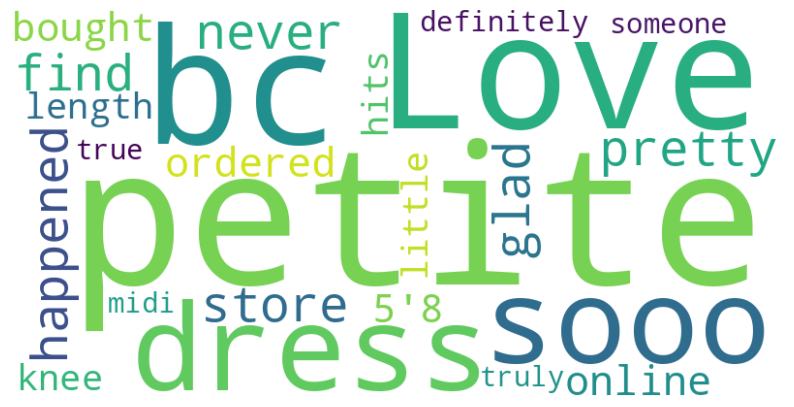




This is the sentiment and the opinion for review with index 2 
 Sentiment(polarity=0.07367494824016563, subjectivity=0.35629399585921323)


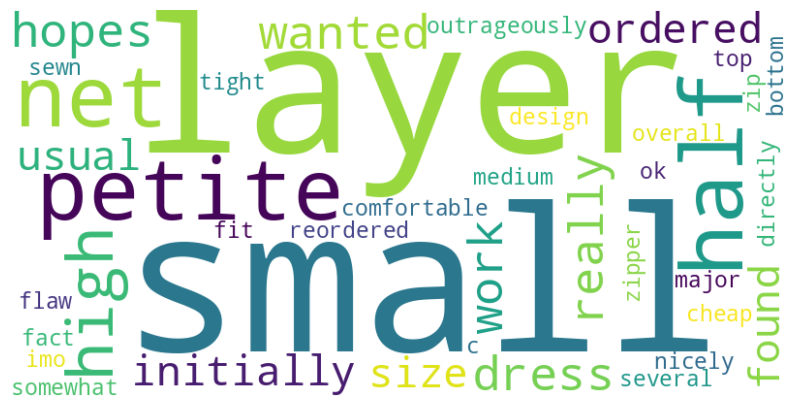




This is the sentiment and the opinion for review with index 3 
 Sentiment(polarity=0.5499999999999999, subjectivity=0.625)


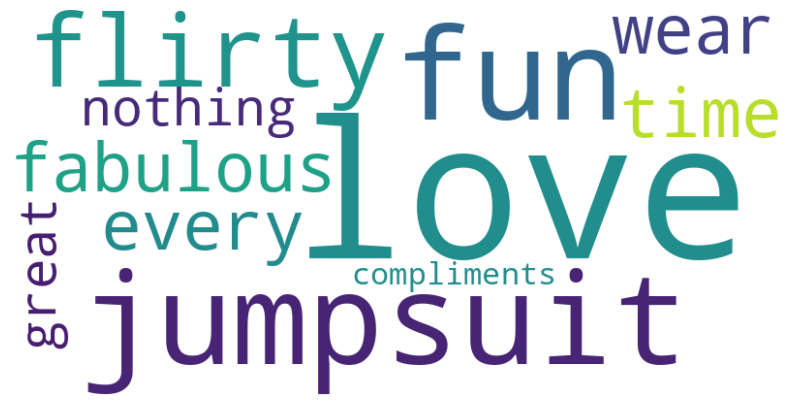




This is the sentiment and the opinion for review with index 4 
 Sentiment(polarity=0.512890625, subjectivity=0.56875)


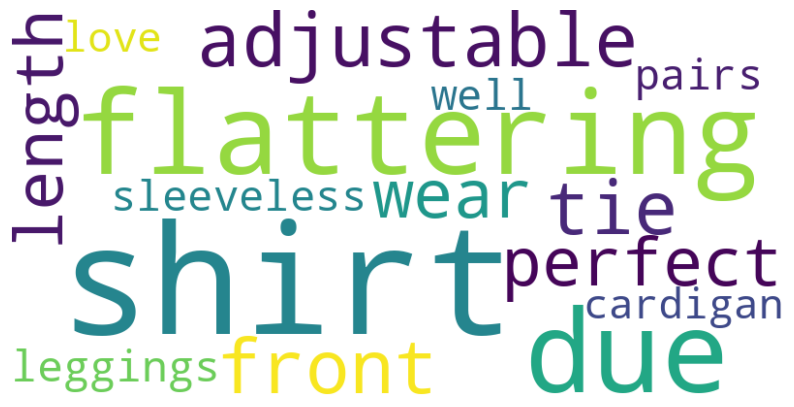




This is the sentiment and the opinion for review with index 5 
 Sentiment(polarity=0.17874999999999996, subjectivity=0.533125)


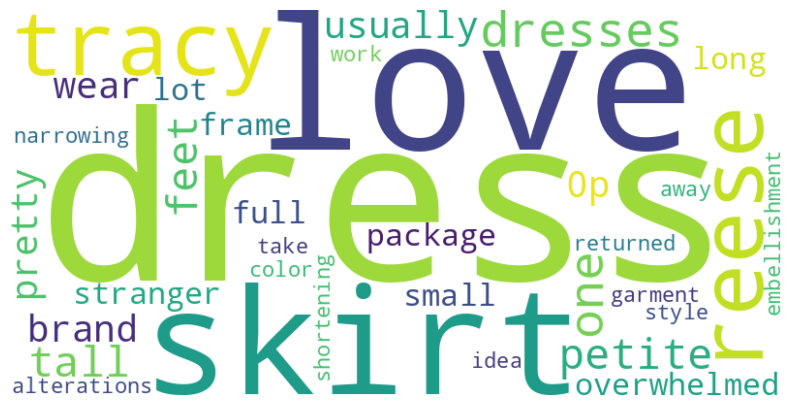




This is the sentiment and the opinion for review with index 6 
 Sentiment(polarity=0.13375, subjectivity=0.6077777777777778)


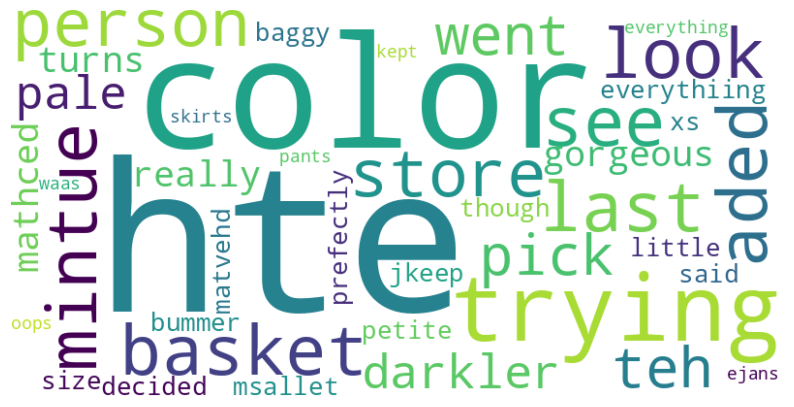




This is the sentiment and the opinion for review with index 7 
 Sentiment(polarity=0.17163461538461539, subjectivity=0.49615384615384617)


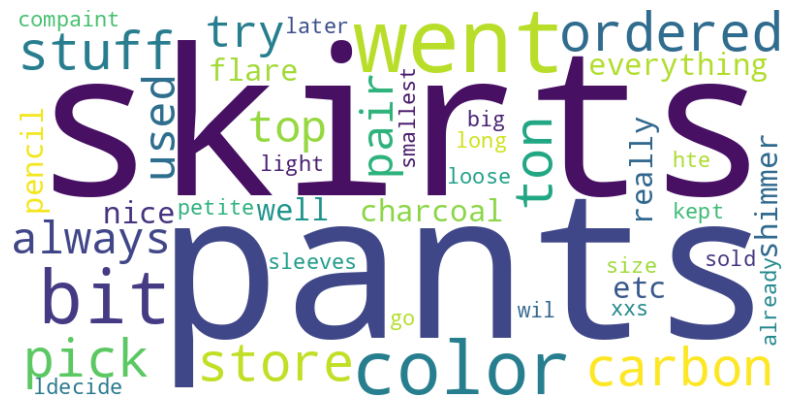




This is the sentiment and the opinion for review with index 8 
 Sentiment(polarity=0.0025000000000000022, subjectivity=0.38)


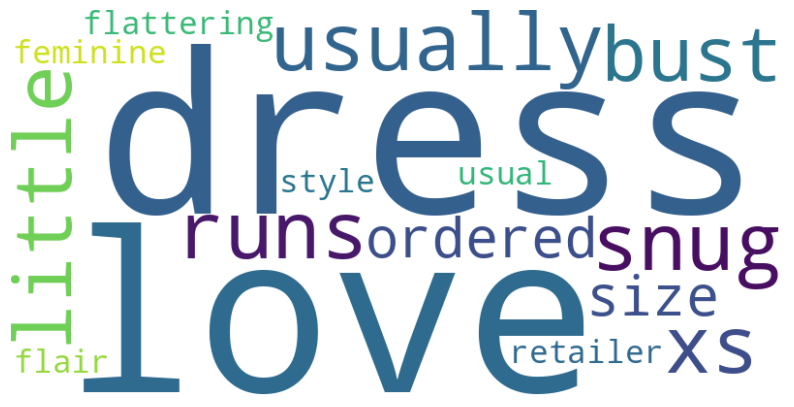




This is the sentiment and the opinion for review with index 9 
 Sentiment(polarity=0.20419973544973546, subjectivity=0.46725681725681717)


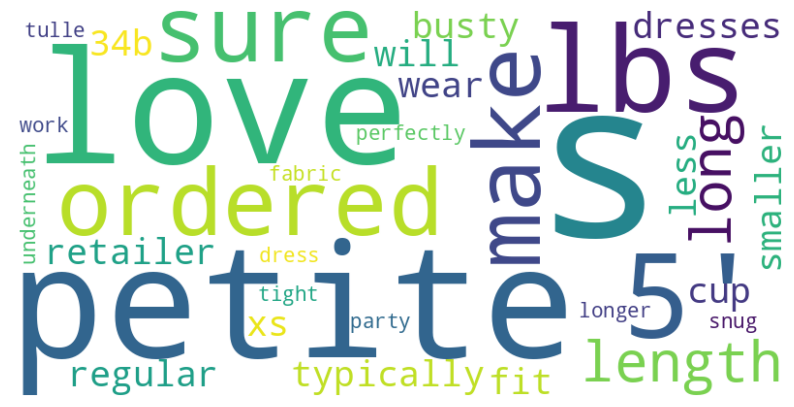

In [ ]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
import matplotlib.pyplot as plt

for i in range(0, 10):
  text = review2['Review.Text'][i]
  wordcloud = WordCloud(
      stopwords=stopwords,
      background_color='white',
      max_words=1000,
      collocations=False,
      width=800, # Increased width for better rendering
      height=400 # Added height for a more balanced canvas
   ).generate(text)
  blob = TextBlob(text)
  print('\n\n\nThis is the sentiment and the opinion for review with index', i, '\n', blob.sentiment)
  plt.figure(figsize=(10,10))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.show()




This is the sentiment and the opinion for reviews from index  0  to index  2262 
 Sentiment(polarity=0.6333333333333333, subjectivity=0.9333333333333332)


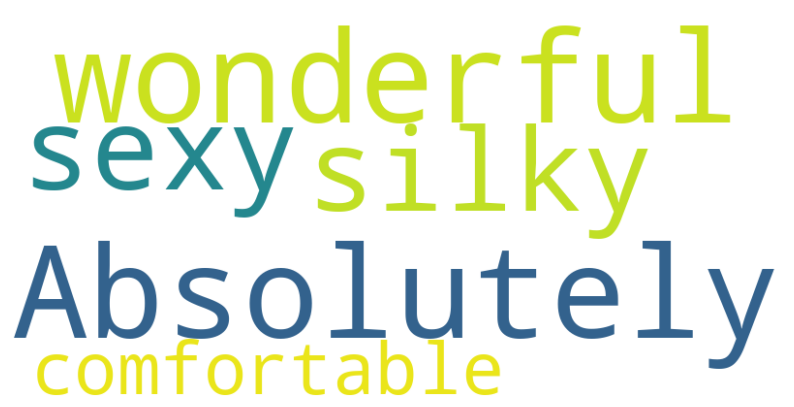




This is the sentiment and the opinion for reviews from index  1  to index  2263 
 Sentiment(polarity=0.33958333333333335, subjectivity=0.7250000000000001)


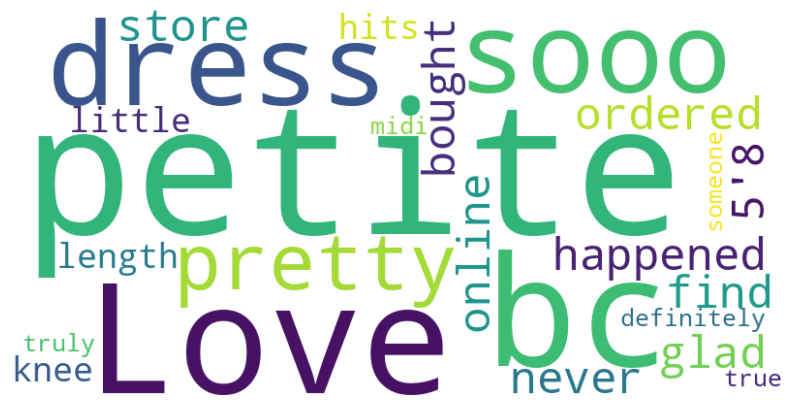




This is the sentiment and the opinion for reviews from index  2  to index  2264 
 Sentiment(polarity=0.07367494824016563, subjectivity=0.35629399585921323)


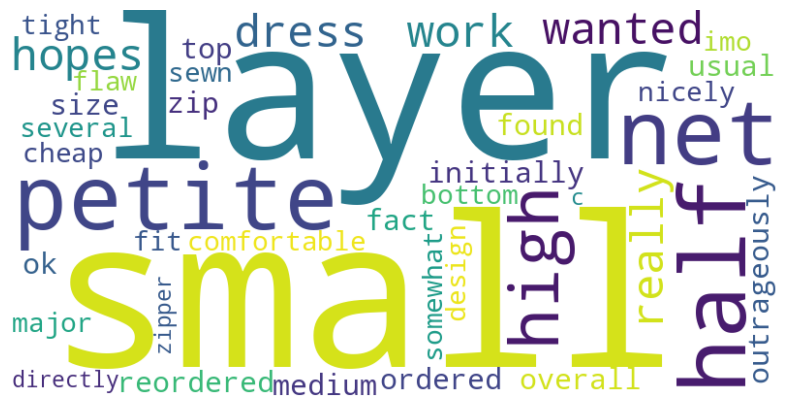




This is the sentiment and the opinion for reviews from index  3  to index  2265 
 Sentiment(polarity=0.5499999999999999, subjectivity=0.625)


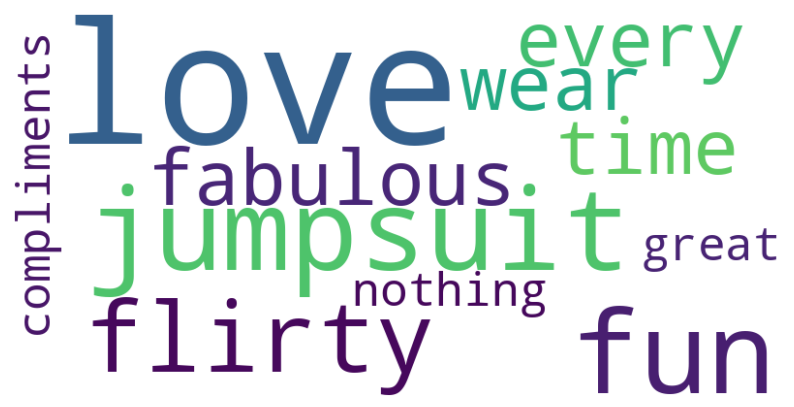




This is the sentiment and the opinion for reviews from index  4  to index  2266 
 Sentiment(polarity=0.512890625, subjectivity=0.56875)


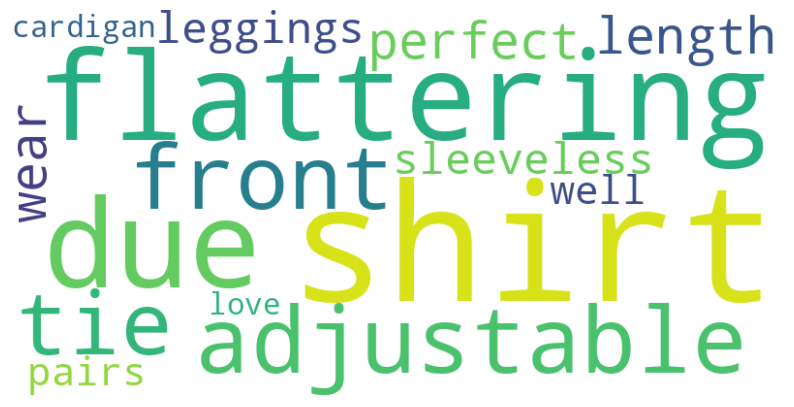




This is the sentiment and the opinion for reviews from index  5  to index  2267 
 Sentiment(polarity=0.17874999999999996, subjectivity=0.533125)


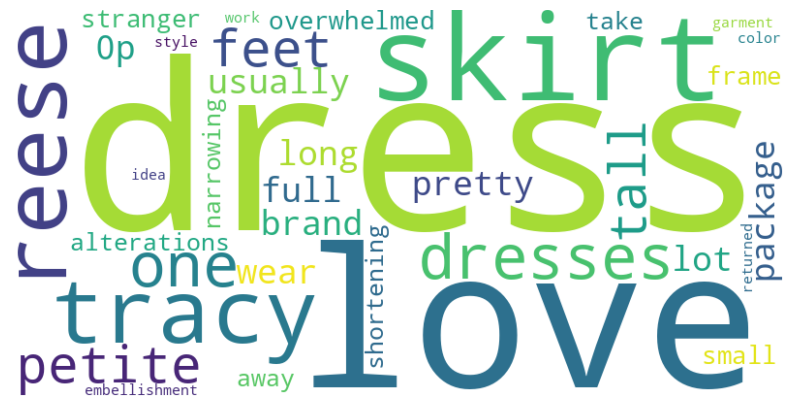




This is the sentiment and the opinion for reviews from index  6  to index  2268 
 Sentiment(polarity=0.13375, subjectivity=0.6077777777777778)


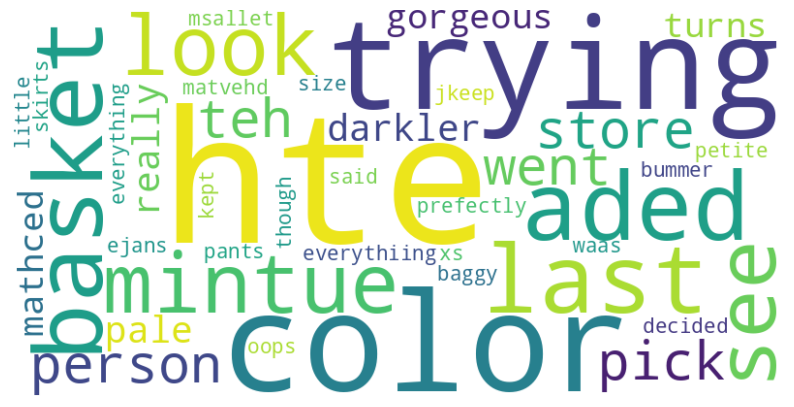




This is the sentiment and the opinion for reviews from index  7  to index  2269 
 Sentiment(polarity=0.17163461538461539, subjectivity=0.49615384615384617)


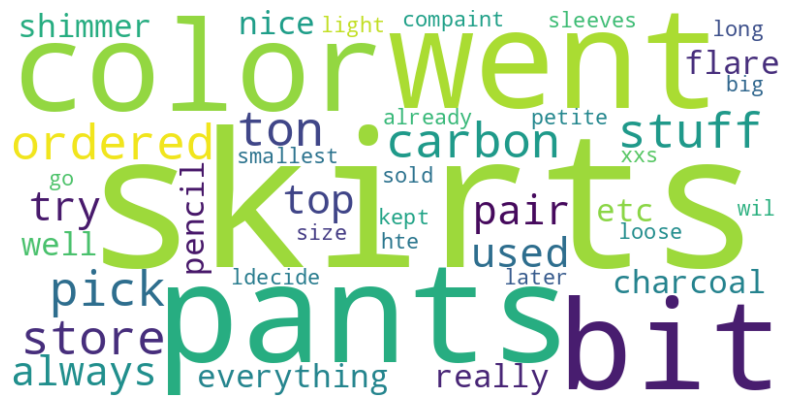




This is the sentiment and the opinion for reviews from index  8  to index  2270 
 Sentiment(polarity=0.0025000000000000022, subjectivity=0.38)


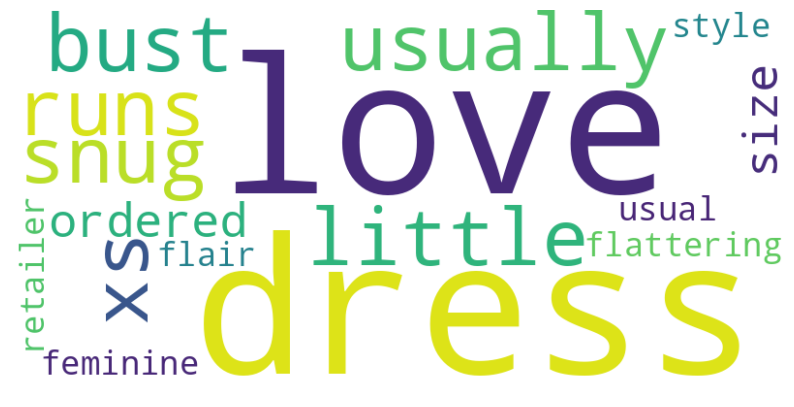




This is the sentiment and the opinion for reviews from index  9  to index  2271 
 Sentiment(polarity=0.20419973544973546, subjectivity=0.46725681725681717)


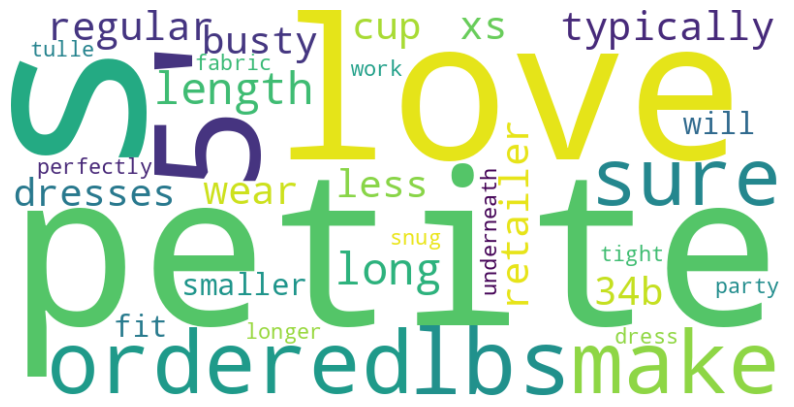




This is the sentiment and the opinion for reviews from index  10  to index  2272 
 Sentiment(polarity=-0.0971494708994709, subjectivity=0.6034920634920635)


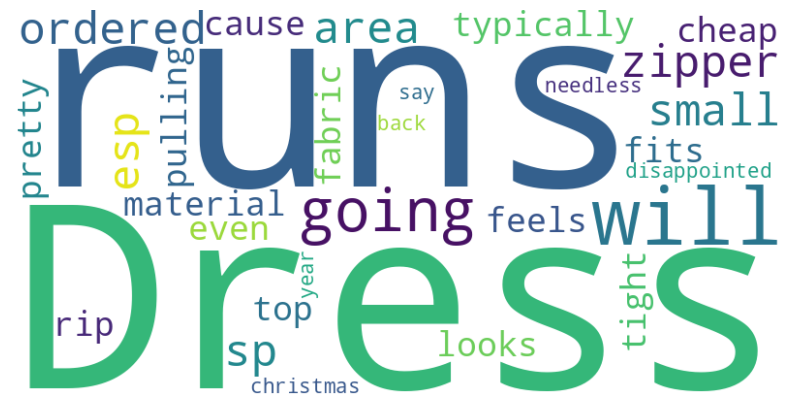

In [ ]:
chunk_size = 2261
chunks = []

for i in range(0, len(review2), chunk_size):
    chunk = review2.iloc[i:i+chunk_size]
    start = i
    stop = i + chunk_size - 1
    chunk['chunk_start'] = start
    chunk['chunk_stop'] = stop
    chunks.append(chunk)

for i, chunk in enumerate(chunks):
  text = review2['Review.Text'][i]
  wordcloud = WordCloud(
      stopwords=stopwords,
      background_color='white',
      max_words=1000,
      collocations=False,
      width=800, # Increased width for better rendering
      height=400 # Added height for a more balanced canvas
   ).generate(text)
  blob = TextBlob(text)
  print('\n\n\nThis is the sentiment and the opinion for reviews from index ', i + chunk_size - 2261, ' to index ', i + chunk_size + 1, '\n', blob.sentiment)
  plt.figure(figsize=(10,10))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.show()

# Building the Generative AI Pipeline

In [ ]:
!pip install openai
!pip install tiktoken
!pip install pypdf
!pip install random

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 329.0/329.0 kB 19.7 MB/s eta 0:00:00
ERROR: Could not find a version that satisfies the requirement random (from versions: none)
ERROR: No matching distribution found for random


In [ ]:
# Importing the necessary libraries
# Mandatory: Run this AFTER restarting the runtime following the installation step.

import os                   # File paths, environment variables
import json                 # JSON handling
import time                 # Timing utilities
from datetime import datetime

import numpy as np          # Numerical operations (used in RAG similarity search)
import pandas as pd         # DataFrame loading and manipulation
from tqdm import tqdm       # Progress bars for iteration and apply()

# OpenAI-compatible client (used to call Gemini models via Generative Language API)
from openai import OpenAI

# Tokenizer utilities (for token-aware chunking)
import tiktoken

# PDF parsing (extract text from HR policy PDFs)
import pypdf


import random

print("All libraries imported successfully.")

All libraries imported successfully.


Get openai api key.

In [ ]:
from openai import OpenAI
import os
from google.colab import userdata
OpenAI_API_KEY =userdata.get('my_key')
OPENAI_CUSTOM_BASE_URL=userdata.get('my_url')


## Sanity Check

Set up the client for embeddings. First, test how many tokens the text has.

First test a small embedding.
There are three embedding types for openai:

1. 'text-embedding-3-small'
2. 'text-embedding-3-large'
3. 'text-embedding-ada-002'

In [ ]:
client = OpenAI(base_url=OPENAI_CUSTOM_BASE_URL, api_key=OpenAI_API_KEY)

In [ ]:
emb_resp = client.embeddings.create(
  #model='text-embedding-ada-002',
  model='text-embedding-3-small',
  input='Your text string goes here',
)

#this code will be kept commented out to not use up tokens
"""
emb_vector = emb_resp.data[0].embedding
print('This is the embedding vector:\n', emb_vector, '\n\n')
print("\nEmbedding generated. Vector length:\n", len(emb_vector), "\n")

"""

'\nemb_vector = emb_resp.data[0].embedding\nprint(\'This is the embedding vector:\n\', emb_vector, \'\n\n\')\nprint("\nEmbedding generated. Vector length:\n", len(emb_vector), "\n")\n\n'

In [ ]:
import tiktoken

def num_tokens_from_string(string: str, encoding_name: str) -> int:
    """Returns the number of tokens in a text string."""
    encoding = tiktoken.get_encoding(encoding_name)
    num_tokens = len(encoding.encode(string))
    return num_tokens

# 'cl100k_base' is a common encoding for newer GPT models like gpt-4o-mini
num_tokens_from_string("Your text string goes here", "o200k_base")

5

Create a chatbot client to reply to the reviewee. This is a test of the chatbot.

Commented out to save tokens

In [ ]:
print("Chat completion test (gpt-4o-mini)...")
chat_resp = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[
        {"role": "system", "content": "You are a helpful assistant."},
        {"role": "user", "content": "Explain to me how AI works in one short sentence."}
    ],
)

# Print the assistant reply text

#assistant_text = chat_resp.choices[0].message.content
#print("Assistant reply:\n", assistant_text, "\n")


Chat completion test (gpt-4o-mini)...


# Prompt Engineering and Evaluation

In [ ]:
# Installing the necessary libraries with specified versions
!pip install -q openai==1.66.3 \
                tqdm==4.67.0 \
                tiktoken==0.9.0 \
                pypdf==5.4.0 \
                langchain==0.3.20 \
                langchain-community==0.3.19 \
                langchain-chroma==0.2.2 \
                langchain-openai==0.3.9 \
                chromadb==0.6.3 \
                langchain-text-splitters==0.0.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 2.8 MB/s eta 0:00:00
ERROR: Cannot install langchain-text-splitters==0.0.1 and langchain==0.3.20 because these package versions have conflicting dependencies.
ERROR: ResolutionImpossible: for help visit https://pip.pypa.io/en/latest/topics/dependency-resolution/#dealing-with-dependency-conflicts


I imported the data set directly to the worksheet, and made the same modifications as the original data set.

In [ ]:
DATA_PATH = "/content/Dataset - Real-Time Retail Feedback Intelligence.csv"
reviews3 = pd.read_csv(DATA_PATH, sep=None, engine='python', on_bad_lines='warn')
reviews3.head()

Unnamed: 0  Clothing.ID  Age                    Title  \
0           1          767   33                      NaN   
1           2         1080   34                      NaN   
2           3         1077   60  Some major design flaws   
3           4         1049   50         My favorite buy!   
4           5          847   47         Flattering shirt   

                                         Review.Text  Rating  Recommended.IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   Positive.Feedback.Count   Division.Name Department.Name Class.Name  
0                        0       Initmates        Intimate  Intimates  
1                        4         General         Dresses    Dresses  
2                        0         General         Dresses    Dresses  
3                        0  General Petite         Bottoms      Pants  
4                        6         General            Tops    Blouses

In [ ]:
reviews3['Title'].fillna('My Review', inplace=True)
reviews3.head()
#review1['Review Text'].fillna('No Review', inplace=True

/tmp/ipython-input-2004461624.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  reviews3['Title'].fillna('My Review', inplace=True)


Unnamed: 0  Clothing.ID  Age                    Title  \
0           1          767   33                My Review   
1           2         1080   34                My Review   
2           3         1077   60  Some major design flaws   
3           4         1049   50         My favorite buy!   
4           5          847   47         Flattering shirt   

                                         Review.Text  Rating  Recommended.IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   Positive.Feedback.Count   Division.Name Department.Name Class.Name  
0                        0       Initmates        Intimate  Intimates  
1                        4         General         Dresses    Dresses  
2                        0         General         Dresses    Dresses  
3                        0  General Petite         Bottoms      Pants  
4                        6         General            Tops    Blouses

In [ ]:
reviews3.isnull().sum()

Unnamed: 0                   0
Clothing.ID                  0
Age                          0
Title                        0
Review.Text                845
Rating                       0
Recommended.IND              0
Positive.Feedback.Count      0
Division.Name               14
Department.Name             14
Class.Name                  14
dtype: int64

In [ ]:
no_reviews3 = reviews3[reviews3['Review.Text'].isnull()]
print(no_reviews3.shape)
no_reviews3.head()

(845, 11)


Unnamed: 0  Clothing.ID  Age      Title Review.Text  Rating  \
92           93          861   23  My Review         NaN       5   
93           94         1081   31  My Review         NaN       5   
98           99         1133   50  My Review         NaN       5   
135         136          861   35  My Review         NaN       4   
142         143         1126   35  My Review         NaN       5   

     Recommended.IND  Positive.Feedback.Count   Division.Name Department.Name  \
92                 1                        0  General Petite            Tops   
93                 1                        0         General         Dresses   
98                 1                        0         General         Jackets   
135                1                        0  General Petite            Tops   
142                1                        0         General         Jackets   

    Class.Name  
92       Knits  
93     Dresses  
98   Outerwear  
135      Knits  
142  Outerwear

If there is no review, these records are of no value, so they will be dropped.

In [ ]:
reviews3.dropna(inplace=True)
reviews3.isnull().sum()

Unnamed: 0                 0
Clothing.ID                0
Age                        0
Title                      0
Review.Text                0
Rating                     0
Recommended.IND            0
Positive.Feedback.Count    0
Division.Name              0
Department.Name            0
Class.Name                 0
dtype: int64

The reviews, titles, division names, department names, and class names all need to be turned into string data types. The unnamed column does not seem to serve a purpose, so it will be dropped from the dataset.

In [ ]:
reviews4 = reviews3.copy()
# Drop the 'Unnamed: 0' column directly from the DataFrame
reviews4 = reviews4.drop('Unnamed: 0', axis=1)
reviews4 = reviews4.reset_index(drop=True)
reviews4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22628 entries, 0 to 22627
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing.ID              22628 non-null  int64 
 1   Age                      22628 non-null  int64 
 2   Title                    22628 non-null  object
 3   Review.Text              22628 non-null  object
 4   Rating                   22628 non-null  int64 
 5   Recommended.IND          22628 non-null  int64 
 6   Positive.Feedback.Count  22628 non-null  int64 
 7   Division.Name            22628 non-null  object
 8   Department.Name          22628 non-null  object
 9   Class.Name               22628 non-null  object
dtypes: int64(5), object(5)
memory usage: 1.7+ MB


In [ ]:
print(type(reviews4['Title'][100]))
print(reviews4['Review.Text'][100])

<class 'str'>
The fabric felt cheap and i didn't find it to be a flattering top. for reference i am wearing a medium in the photos and my measurements are 38-30-40.


I check for the data types.

In [ ]:
reviews4['Review.Text'] = reviews4['Review.Text'].astype(str)
reviews4['Title'] = reviews4['Title'].astype(str)
reviews4['Division.Name'] = reviews4['Division.Name'].astype(str)
reviews4['Department.Name'] = reviews4['Department.Name'].astype(str)
reviews4['Class.Name'] = reviews4['Class.Name'].astype(str)
reviews4 = reviews4.reset_index()
reviews4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22628 entries, 0 to 22627
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   index                    22628 non-null  int64 
 1   Clothing.ID              22628 non-null  int64 
 2   Age                      22628 non-null  int64 
 3   Title                    22628 non-null  object
 4   Review.Text              22628 non-null  object
 5   Rating                   22628 non-null  int64 
 6   Recommended.IND          22628 non-null  int64 
 7   Positive.Feedback.Count  22628 non-null  int64 
 8   Division.Name            22628 non-null  object
 9   Department.Name          22628 non-null  object
 10  Class.Name               22628 non-null  object
dtypes: int64(6), object(5)
memory usage: 1.9+ MB


I created a variable using sample() to randomly select 5 rows from the data set to test the AI prompt.

In [ ]:
five_samples = reviews4.sample(5)
five_samples

index  Clothing.ID  Age                         Title  \
18491  18491         1078   29     Disappointed--will return   
18119  18119          862   34      A pop of color and style   
9559    9559          860   47              Beautiful blouse   
6444    6444          292   35  Make your buns look adorable   
2360    2360          895   45            Pretty party piece   

                                             Review.Text  Rating  \
18491  I ordered this dress online in order to get a ...       3   
18119  Pros:\r\n- fits tts. i tried on a size m and i...       4   
9559   I purchased the green in xs and it fits perfec...       5   
6444   Love this brand and i keep coming back. i don'...       5   
2360   I'll be wearing this to holiday parties this y...       4   

       Recommended.IND  Positive.Feedback.Count   Division.Name  \
18491                0                        1         General   
18119                1                       11  General Petite   
9559                 1                        0         General   
6444                 1                        0       Initmates   
2360                 1                        0  General Petite   

      Department.Name  Class.Name  
18491         Dresses     Dresses  
18119            Tops       Knits  
9559             Tops       Knits  
6444         Intimate        Swim  
2360             Tops  Fine gauge

I tested the output of the data selection variables to ensure that the model would get the correct information.

In [ ]:
div_name = reviews4['Division.Name'][0]
print(div_name)

dept_name = reviews4['Department.Name'][0]
print(dept_name)

class_name = reviews4['Class.Name'][0]
print(class_name)

review_text = reviews4['Review.Text'][0]
print(review_text)

Initmates
Intimate
Intimates
Absolutely wonderful - silky and sexy and comfortable


I tested the selection variable to select specific values from the randomly five selected rows.

In [ ]:
five_samples = reviews4.sample(5)
five_samples['Department.Name']


4294        Tops
5881        Tops
3887        Tops
761      Dresses
18014    Bottoms
Name: Department.Name, dtype: object

I tested all the values I wanted to extract from the dataset rows. I created a user-defined function for this, to be used in the zero-shot function later.

In [ ]:
def review_prompt_five():
    """
    Category, Sentiment, Summary, Personalized Message, and Retail Insight

    """
    for i in range(5):
      five_samples = reviews4.sample()
      review_text = five_samples['Review.Text']
      div_name = five_samples['Division.Name']
      dept_name = five_samples['Department.Name']
      class_name = five_samples['Class.Name']
      print(f'\nThse are the parts\n Division: {div_name} \n Department: {dept_name} \n Class: {class_name}\n')
      #print('\nThis is the department\n', dept_name, '\n')
      #print('\nThis is the class\n', class_name, '\n')

    #return review_text, div_name, dept_name, class_name

review_prompt_five()



Thse are the parts
 Division: 11918    General
Name: Division.Name, dtype: object 
 Department: 11918    Tops
Name: Department.Name, dtype: object 
 Class: 11918    Knits
Name: Class.Name, dtype: object


Thse are the parts
 Division: 15339    General Petite
Name: Division.Name, dtype: object 
 Department: 15339    Tops
Name: Department.Name, dtype: object 
 Class: 15339    Fine gauge
Name: Class.Name, dtype: object


Thse are the parts
 Division: 19874    General
Name: Division.Name, dtype: object 
 Department: 19874    Jackets
Name: Department.Name, dtype: object 
 Class: 19874    Outerwear
Name: Class.Name, dtype: object


Thse are the parts
 Division: 5674    General Petite
Name: Division.Name, dtype: object 
 Department: 5674    Tops
Name: Department.Name, dtype: object 
 Class: 5674    Blouses
Name: Class.Name, dtype: object


Thse are the parts
 Division: 20396    General
Name: Division.Name, dtype: object 
 Department: 20396    Bottoms
Name: Department.Name, dtype: object 
 Cl

In [ ]:
print(review_prompt_five())


Thse are the parts
 Division: 4911    General
Name: Division.Name, dtype: object 
 Department: 4911    Tops
Name: Department.Name, dtype: object 
 Class: 4911    Knits
Name: Class.Name, dtype: object


Thse are the parts
 Division: 21995    General
Name: Division.Name, dtype: object 
 Department: 21995    Tops
Name: Department.Name, dtype: object 
 Class: 21995    Sweaters
Name: Class.Name, dtype: object


Thse are the parts
 Division: 7279    General
Name: Division.Name, dtype: object 
 Department: 7279    Tops
Name: Department.Name, dtype: object 
 Class: 7279    Knits
Name: Class.Name, dtype: object


Thse are the parts
 Division: 14294    General
Name: Division.Name, dtype: object 
 Department: 14294    Tops
Name: Department.Name, dtype: object 
 Class: 14294    Knits
Name: Class.Name, dtype: object


Thse are the parts
 Division: 1174    General Petite
Name: Division.Name, dtype: object 
 Department: 1174    Tops
Name: Department.Name, dtype: object 
 Class: 1174    Blouses
Name:

This is a sanity check for the function.

# The Models

## Zero-Shot Example

Next, I created the zero-shot prompt. I decided to test just one review, to save on tokens. I will create a function later that can take in an integer and test the specified number of reviews.

In [ ]:
SYSTEM_MESSAGE_CS0 = """
You are a strict, expert retail product review analyst. Prepare a short report
with the following five elements, outputting the response in JSON format:
  1. The categories: this should be an object with four entries: 'division', 'department', 'class' and 'Mt Category'.
  2. The sentiment: this should be a string indicating 'positive', 'neutral', or 'negative'. If more than one sentiment applies, prioritize the dominant one.
  3. The summary: this is a short summary of the review.
  4. The personalized_message: a personalized message composed in response to the review.
  5. The retail_insight: any insights that can improve customer satisfaction.
"""

BASE_MESSAGES_CS0 = [
    {"role": "system", "content": SYSTEM_MESSAGE_CS0},
]

This next function is the zero-shot function that creates the output of the review.

In [ ]:
#input for llm-as-a-judge
def review_prompt_five3():
    """
    Samples five reviews and returns them as a list of dictionaries,
    each representing a single review.
    """
    five_samples_df = reviews4.sample(n=50) # Get five random rows as a DataFrame
    list_of_review_dicts = []
    for index, row in five_samples_df.iterrows():
        list_of_review_dicts.append({
            "div_name": row['Division.Name'],
            "dept_name": row['Department.Name'],
            "class_name": row['Class.Name'],
            "review_text": row['Review.Text'],
            "review_index": row['index']
        })
    return list_of_review_dicts

In [ ]:
from nltk.corpus.reader import norm
def zero_shot_prompt(model_name: str = "gpt-4o-mini", review_data: dict = None) -> tuple:
    """
    Generates a Zero-Shot prompt response based on the provided review data.
    Returns the raw LLM output, the original user content string, and the review index.
    """
    if review_data is None:
        review_data = review_prompt_one2()

    user_content = (
        f"Division: {review_data['div_name']}\n"
        f"Department: {review_data['dept_name']}\n"
        f"Class: {review_data['class_name']}\n"
        f"Review: {review_data['review_text']}"
        f"Index: {review_data['review_index']}"
    )

    instructions = BASE_MESSAGES_CS0 + [{
        "role": "user",
        "content": user_content
    }]

    response = client.chat.completions.create(
        model=model_name,
        messages=instructions,
        temperature=0.0,
        max_tokens=300
    )

    raw_info = response.choices[0].message.content.strip()
    #print("This is the actual review:\n", review_data['review_text'], '\n\n')

    return {'raw_info':raw_info}, {'user_content': user_content}, review_data['review_index'] # Return raw_info dict, user_content string, and review_index



Here is the prompt and function for the 5 reviews

In [ ]:
# Call review_prompt_five3() to get a list of five review samples
list_of_review_samples = review_prompt_five3()

# Process each review sample with zero_shot_prompt and collect outputs
llm_outputs_parsed_list = [] # Changed name to be more descriptive
for sample_data in list_of_review_samples:
    raw_info_dict, user_content_dict, review_idx = zero_shot_prompt(review_data=sample_data)
    llm_outputs_parsed_list.append({
        "raw_llm_output": raw_info_dict['raw_info'],
        "original_user_content": user_content_dict['user_content'],
        "review_index": review_idx
    })

# Create a DataFrame from the parsed outputs
zero_shot_results_df = pd.DataFrame(llm_outputs_parsed_list)
zero_shot_results_df.head()

This is the actual review:
 It takes perfection for me to pay this much for a pair of pants, and these delivered! i bought these pants love-at-first-sight in the carbon color. i have not washed them yet, so i can't comment on durability, but they fit like a dream. i carry extra weight in my thighs and rear, and these pants are very flattering and slimming, and don't pull and crease in the crotch area like so many other pants do on my body. my usual size fit perfectly, and the length is great on my 5'5" frame. i can almost 


This is the actual review:
 I bought this in late august and have been wearing it ever since. i love that you can wear it either on or off-the-shoulder. the second option adds sexiness even though the top is flowy, comfortable, and easy to wear. on the shoulder i've even worn it to work on casual friday. the print is versatile, and i like that the fabric has a little heft while still being soft and drapey. i definitely recommend, especially since i notice it is now

raw_llm_output  \
0  ```json\n{\n  "categories": {\n    "division":...   
1  ```json\n{\n  "categories": {\n    "division":...   
2  ```json\n{\n  "categories": {\n    "division":...   
3  ```json\n{\n  "categories": {\n    "division":...   
4  ```json\n{\n  "categories": {\n    "division":...   

                               original_user_content  review_index  
0  Division: General\nDepartment: Bottoms\nClass:...         16753  
1  Division: General\nDepartment: Tops\nClass: Kn...          2642  
2  Division: General Petite\nDepartment: Tops\nCl...          3548  
3  Division: General\nDepartment: Bottoms\nClass:...          3163  
4  Division: General\nDepartment: Dresses\nClass:...         22121

In [ ]:
zero_shot_results_df.head(20)

raw_llm_output  \
0   ```json\n{\n  "categories": {\n    "division":...   
1   ```json\n{\n  "categories": {\n    "division":...   
2   ```json\n{\n  "categories": {\n    "division":...   
3   ```json\n{\n  "categories": {\n    "division":...   
4   ```json\n{\n  "categories": {\n    "division":...   
5   ```json\n{\n  "categories": {\n    "division":...   
6   ```json\n{\n  "categories": {\n    "division":...   
7   ```json\n{\n  "categories": {\n    "division":...   
8   ```json\n{\n  "categories": {\n    "division":...   
9   ```json\n{\n  "categories": {\n    "division":...   
10  ```json\n{\n  "categories": {\n    "division":...   
11  ```json\n{\n  "categories": {\n    "division":...   
12  ```json\n{\n  "categories": {\n    "division":...   
13  ```json\n{\n  "categories": {\n    "division":...   
14  ```json\n{\n  "categories": {\n    "division":...   
15  ```json\n{\n  "categories": {\n    "division":...   
16  ```json\n{\n  "categories": {\n    "division":...   
17  ```json\n{\n  "categories": {\n    "division":...   
18  ```json\n{\n  "categories": {\n    "division":...   
19  ```json\n{\n  "categories": {\n    "division":...   

                                original_user_content  review_index  
0   Division: General\nDepartment: Bottoms\nClass:...         16753  
1   Division: General\nDepartment: Tops\nClass: Kn...          2642  
2   Division: General Petite\nDepartment: Tops\nCl...          3548  
3   Division: General\nDepartment: Bottoms\nClass:...          3163  
4   Division: General\nDepartment: Dresses\nClass:...         22121  
5   Division: General Petite\nDepartment: Bottoms\...          2576  
6   Division: General\nDepartment: Tops\nClass: Bl...          9330  
7   Division: Initmates\nDepartment: Intimate\nCla...         21298  
8   Division: General\nDepartment: Tops\nClass: Fi...          9183  
9   Division: General Petite\nDepartment: Tops\nCl...          9647  
10  Division: General Petite\nDepartment: Tops\nCl...         14448  
11  Division: General Petite\nDepartment: Dresses\...         18857  
12  Division: General\nDepartment: Dresses\nClass:...          6503  
13  Division: General Petite\nDepartment: Tops\nCl...         13369  
14  Division: Initmates\nDepartment: Intimate\nCla...          6738  
15  Division: General\nDepartment: Tops\nClass: Bl...          4619  
16  Division: General Petite\nDepartment: Tops\nCl...         10329  
17  Division: General\nDepartment: Bottoms\nClass:...         15761  
18  Division: General Petite\nDepartment: Dresses\...         12942  
19  Division: General Petite\nDepartment: Tops\nCl...         17748

In [ ]:
import json
import re

def parse_llm_output(raw_output_str):
    # The LLM output is wrapped in ```json\n...\n```, so we need to extract the inner JSON string
    match = re.search(r'```json\n(.*)```', raw_output_str, re.DOTALL)
    if match:
        json_str = match.group(1).strip()
        try:
            return json.loads(json_str)
        except json.JSONDecodeError:
            print(f"JSON Decode Error for: {json_str[:100]}...")
            return None
    return None

# Apply the parsing function to the 'raw_llm_output' column
zero_shot_results_df['parsed_output'] = zero_shot_results_df['raw_llm_output'].apply(parse_llm_output)

# Extract individual fields into new columns
zero_shot_results_df['extracted_categories'] = zero_shot_results_df['parsed_output'].apply(lambda x: x.get('categories') if x else None)
zero_shot_results_df['extracted_sentiment'] = zero_shot_results_df['parsed_output'].apply(lambda x: x.get('sentiment') if x else None)
zero_shot_results_df['extracted_summary'] = zero_shot_results_df['parsed_output'].apply(lambda x: x.get('summary') if x else None)
zero_shot_results_df['extracted_personalized_message'] = zero_shot_results_df['parsed_output'].apply(lambda x: x.get('personalized_message') if x else None)
zero_shot_results_df['extracted_retail_insight'] = zero_shot_results_df['parsed_output'].apply(lambda x: x.get('retail_insight') if x else None)

# Display the DataFrame with the new columns
display(zero_shot_results_df.head())

raw_llm_output  \
0  ```json\n{\n  "categories": {\n    "division":...   
1  ```json\n{\n  "categories": {\n    "division":...   
2  ```json\n{\n  "categories": {\n    "division":...   
3  ```json\n{\n  "categories": {\n    "division":...   
4  ```json\n{\n  "categories": {\n    "division":...   

                               original_user_content  review_index  \
0  Division: General\nDepartment: Bottoms\nClass:...         16753   
1  Division: General\nDepartment: Tops\nClass: Kn...          2642   
2  Division: General Petite\nDepartment: Tops\nCl...          3548   
3  Division: General\nDepartment: Bottoms\nClass:...          3163   
4  Division: General\nDepartment: Dresses\nClass:...         22121   

                                       parsed_output  \
0  {'categories': {'division': 'General', 'depart...   
1  {'categories': {'division': 'General', 'depart...   
2  {'categories': {'division': 'General Petite', ...   
3  {'categories': {'division': 'General', 'depart...   
4  {'categories': {'division': 'General', 'depart...   

                                extracted_categories extracted_sentiment  \
0  {'division': 'General', 'department': 'Bottoms...            positive   
1  {'division': 'General', 'department': 'Tops', ...            positive   
2  {'division': 'General Petite', 'department': '...            positive   
3  {'division': 'General', 'department': 'Bottoms...            positive   
4  {'division': 'General', 'department': 'Dresses...            positive   

                                   extracted_summary  \
0  The reviewer is highly satisfied with the fit ...   
1  The reviewer loves the versatility and comfort...   
2  The reviewer loves the sweater for its chic an...   
3  The reviewer loves the jeans for their true-to...   
4  The reviewer expresses strong appreciation for...   

                      extracted_personalized_message  \
0  Thank you for your wonderful review! We're thr...   
1  Thank you for your wonderful review! We're thr...   
2  Thank you for your wonderful review! We're thr...   
3  Thank you for your wonderful feedback! We're t...   
4  Thank you for your wonderful feedback! We're t...   

                            extracted_retail_insight  
0  Consider providing care instructions and durab...  
1  Consider promoting the versatility of the prod...  
2  Consider promoting the versatility of the swea...  
3  Highlight the unique features of the jeans, su...  
4  Consider expanding the range of petite sizes a...

## LLM as a Judge for Zero-Shot

Here is the system prompt for the llm as a judge.

In [ ]:
SYSTEM_MESSAGE_CS20 = """
You are a large-language-model-as-a-judge for other large-language-models, to
check their accuracy and the quality of their output.

Rules:
- Return an evaluation of the zero-shot model output, by creating a dict with
the following keys: "categories", "sentiment", "summary", "personalized_message",
and "retail_insight".
-create a separate rating for each key/value from the review
on a scale from zero to one. Decimals between zero and one
are allowed. Explain the scale then rate each part.

"""

BASE_MESSAGES_CS20 = [
    {"role": "system", "content": SYSTEM_MESSAGE_CS20},
]

The next function is the large language model as  a judge.

In [ ]:
from textblob import TextBlob
def llm_as_judge(model_name: str = "gpt-4o-mini", llm_output_to_judge: str = None, original_user_prompt_string_from_zero_shot: str = None) -> dict:
    """
    Acts as an LLM-as-a-judge to score the quality of model outputs.
    It takes the LLM's generated output string, the original review data dictionary,
    and the exact user prompt string that was sent to the zero-shot model.
    """

    if llm_output_to_judge is None or original_user_prompt_string_from_zero_shot is None:
       return {"score": 0.0, "reason": "Missing input for judging"}

    # Extract the actual review text string for TextBlob from the dictionary
    #original_review_text_for_textblob = original_review_data_dict['review_text']
    #review_index_value = original_review_data_dict['review_index'] # Get the scalar index from the dict

    # Use the pre-formatted user_content string from the zero-shot prompt
    # and add the LLM's output for the judge to evaluate
    user_content_for_judge = (
        f"Original Prompt to Zero-Shot LLM:\n{original_user_prompt_string_from_zero_shot}\n\n"
        f"Zero-Shot LLM Output to Evaluate:\n{llm_output_to_judge}\n\n"
        f"Evaluate the Zero-Shot LLM Output based on the provided Original Prompt.\n"
        f"Ensure your evaluation focuses on the accuracy and completeness of the categories, sentiment, summary, personalized message, and retail insight given the original review text in the prompt."
    )

    instructions = BASE_MESSAGES_CS20 + [{
        "role": "user",
        "content": user_content_for_judge
    }]

    response = client.chat.completions.create(
        model=model_name,
        messages=instructions,
        temperature=0.0,
        max_tokens=600
    )

    judge_raw_output = response.choices[0].message.content.strip()

    # Calculate TextBlob sentiment for the original review text string (from the dictionary)
    #textblob_polarity = TextBlob(original_review_text_for_textblob).sentiment.polarity

    return {"judge_response": judge_raw_output} #, "textblob_polarity": textblob_polarity}


This code prepares the output for formatting.

In [ ]:
eval = []
for index, row in zero_shot_results_df.iterrows():
  evaluation_result_for_row = llm_as_judge(
    llm_output_to_judge = row['raw_llm_output'],
    original_user_prompt_string_from_zero_shot= row['original_user_content']
  )
  eval.append(json.dumps(evaluation_result_for_row, indent=2))

# Print all evaluations collected
for eval_result in eval:
  print(eval_result)

{
  "judge_response": "To evaluate the zero-shot model output, I will assess each key based on its accuracy and completeness in relation to the original review. The scale for rating will be as follows:\n\n- 0: Completely inaccurate or irrelevant\n- 0.25: Somewhat inaccurate or lacking detail\n- 0.5: Partially accurate but missing key elements\n- 0.75: Mostly accurate with minor issues\n- 1: Completely accurate and comprehensive\n\nNow, I will rate each part of the output:\n\n1. **Categories**:\n   - The categories provided (division, department, class, Mt Category) accurately reflect the information in the original review. The classification of \"General\" for division, \"Bottoms\" for department, and \"Pants\" for class is correct. The addition of \"Apparel\" as a category is also appropriate.\n   - **Rating**: 1.0\n\n2. **Sentiment**:\n   - The sentiment is correctly identified as \"positive,\" which aligns with the reviewer's enthusiastic language and satisfaction with the product.\

In [ ]:
import json
import re
import pandas as pd # Ensure pandas is imported if not already

# Helper function to extract descriptive text for each category
def extract_description_for_category(full_response_text, start_pattern, end_pattern):
    # Regex to find the text between start_pattern and end_pattern
    # Using re.escape for special characters in patterns and re.DOTALL for multiline match
    match = re.search(re.escape(start_pattern) + r'\s*\n(.*?)\n\s*' + re.escape(end_pattern), full_response_text, re.DOTALL)
    if match:
        description = match.group(1).strip()
        # Remove the "**Rating**: X.X" line from the end of the description
        description = re.sub(r'\s*\*\*Rating\*\*:\s*\d+\.\d+', '', description).strip()
        return description
    return "Description not found"

# Define the patterns for each section (start and end markers)
patterns_to_extract = [
    ("Categories_Description", "1. **Categories**:", "2. **Sentiment**:"),
    ("Sentiment_Description", "2. **Sentiment**:", "3. **Summary**:"),
    ("Summary_Description", "3. **Summary**:", "4. **Personalized Message**:"),
    ("Personalized_Message_Description", "4. **Personalized Message**:", "5. **Retail Insight**:"),
    ("Retail_Insight_Description", "5. **Retail Insight**:", "Overall Evaluation:"), # Note: Adjusted end pattern to capture until "Overall Evaluation"
]


eval_results_parsed_v2 = []
descriptive_results_v2 = [] # New list for descriptive text

for index, row in zero_shot_results_df.iterrows():
  evaluation_result_for_row = llm_as_judge(
    llm_output_to_judge = row['raw_llm_output'],
    original_user_prompt_string_from_zero_shot= row['original_user_content']
  )

  judge_response_str = evaluation_result_for_row['judge_response']

  # Extract numerical scores
  match_scores = re.search(r'```json\n(.*?)```', judge_response_str, re.DOTALL)
  if match_scores:
      json_str = match_scores.group(1)
      try:
          scores = json.loads(json_str)
          eval_results_parsed_v2.append(scores)
      except json.JSONDecodeError:
          print(f"Could not decode JSON for scores from: {json_str}")
          eval_results_parsed_v2.append({}) # Append empty dict on error
  else:
      print(f"No JSON block found for scores in: {judge_response_str}")
      eval_results_parsed_v2.append({}) # Append empty dict if no JSON block

  # Extract descriptive text
  extracted_descriptions = {}
  for name, start_pat, end_pat in patterns_to_extract:
      extracted_descriptions[name] = extract_description_for_category(judge_response_str, start_pat, end_pat)
  descriptive_results_v2.append(extracted_descriptions)

# Create DataFrame from numerical scores (as before)
eval_df_v2 = pd.DataFrame(eval_results_parsed_v2)

# Create a new DataFrame from descriptive texts
eval_df_descriptive_v2 = pd.DataFrame(descriptive_results_v2)

# Display the DataFrame with numerical scores
print("\nNumerical Scores for Zero-Shot V2 (Head):")
display(eval_df_v2.head())
print("\nAverage Numerical Scores for Zero-Shot V2:")
print(eval_df_v2.mean())

# Display the DataFrame with descriptive texts
print("\nDescriptive Explanations for Zero-Shot V2 (Head):")
display(eval_df_descriptive_v2.head())


Numerical Scores for Zero-Shot V2 (Head):


categories  sentiment  summary  personalized_message  retail_insight
0         1.0        1.0      1.0                  1.00             1.0
1         1.0        1.0      1.0                  0.90             1.0
2         1.0        1.0      1.0                  0.75             1.0
3         1.0        1.0      1.0                  1.00             1.0
4         1.0        1.0      1.0                  1.00             1.0


Average Numerical Scores for Zero-Shot V2:
categories              0.993
sentiment               0.940
summary                 0.981
personalized_message    0.931
retail_insight          0.961
dtype: float64

Descriptive Explanations for Zero-Shot V2 (Head):


Categories_Description  \
0  - The categories provided (division, departmen...   
1  - The categories provided (division, departmen...   
2  - The categories provided (division, departmen...   
3  - The categories provided (division, departmen...   
4  - The categories provided (division, departmen...   

                               Sentiment_Description  \
0  - The sentiment is correctly identified as "po...   
1  - The sentiment is correctly identified as "po...   
2  - The sentiment is correctly identified as "po...   
3  - The sentiment is labeled as "positive," whic...   
4  - The sentiment is correctly identified as "po...   

                                 Summary_Description  \
0  - The summary captures the main points of the ...   
1  - The summary captures the main points of the ...   
2  - The summary captures the main points of the ...   
3  - The summary effectively encapsulates the mai...   
4  - The summary captures the essence of the revi...   

                    Personalized_Message_Description  \
0  - The personalized message is warm and acknowl...   
1  - The personalized message is warm and acknowl...   
2  - The personalized message is warm and acknowl...   
3  - The personalized message is warm and appreci...   
4  - The personalized message is warm and acknowl...   

                          Retail_Insight_Description  
0                              Description not found  
1  - The retail insight is practical and relevant...  
2                              Description not found  
3                              Description not found  
4                              Description not found

In [ ]:
# Display the DataFrame with numerical scores
print("\nNumerical Scores for Zero-Shot V2 (Head):")
display(eval_df_v2.head(20))
print("\nAverage Numerical Scores for Zero-Shot V2:")
print(eval_df_v2.mean())

# Display the DataFrame with descriptive texts
print("\nDescriptive Explanations for Zero-Shot V2 (Head):")
display(eval_df_descriptive_v2.head(20))


Numerical Scores for Zero-Shot V2 (Head):


categories  sentiment  summary  personalized_message  retail_insight
0          1.0        1.0     1.00                  1.00            1.00
1          1.0        1.0     1.00                  0.90            1.00
2          1.0        1.0     1.00                  0.75            1.00
3          1.0        1.0     1.00                  1.00            1.00
4          1.0        1.0     1.00                  1.00            1.00
5          1.0        1.0     1.00                  1.00            1.00
6          1.0        1.0     1.00                  1.00            1.00
7          1.0        1.0     1.00                  0.75            1.00
8          1.0        0.5     1.00                  1.00            0.75
9          1.0        1.0     1.00                  1.00            1.00
10         0.9        0.4     1.00                  1.00            1.00
11         1.0        1.0     0.75                  0.75            1.00
12         1.0        1.0     1.00                  1.00            1.00
13         1.0        1.0     1.00                  0.75            1.00
14         1.0        0.6     1.00                  1.00            1.00
15         1.0        1.0     1.00                  1.00            1.00
16         1.0        1.0     1.00                  1.00            1.00
17         1.0        1.0     1.00                  1.00            1.00
18         1.0        1.0     1.00                  1.00            1.00
19         1.0        1.0     1.00                  0.75            1.00


Average Numerical Scores for Zero-Shot V2:
categories              0.993
sentiment               0.940
summary                 0.981
personalized_message    0.931
retail_insight          0.961
dtype: float64

Descriptive Explanations for Zero-Shot V2 (Head):


Categories_Description  \
0   - The categories provided (division, departmen...   
1   - The categories provided (division, departmen...   
2   - The categories provided (division, departmen...   
3   - The categories provided (division, departmen...   
4   - The categories provided (division, departmen...   
5   - The categories provided (division, departmen...   
6   - The categories provided (division, departmen...   
7   - The categories provided (division, departmen...   
8   - The categories provided (division, departmen...   
9   - The categories provided (division, departmen...   
10  - The output correctly identifies the division...   
11  - The categories provided (division, departmen...   
12  - The categories provided (division, departmen...   
13  - The categories provided (division, departmen...   
14  - The categories provided (division, departmen...   
15  - The categories provided (division, departmen...   
16  - The categories provided (division, departmen...   
17  - The categories provided (division, departmen...   
18  - The categories provided (division, departmen...   
19  - The categories provided (division, departmen...   

                                Sentiment_Description  \
0   - The sentiment is correctly identified as "po...   
1   - The sentiment is correctly identified as "po...   
2   - The sentiment is correctly identified as "po...   
3   - The sentiment is labeled as "positive," whic...   
4   - The sentiment is correctly identified as "po...   
5   - The sentiment is labeled as "negative," whic...   
6   - The sentiment is correctly identified as "ne...   
7   - The sentiment is correctly identified as "po...   
8   - The sentiment is labeled as "neutral," which...   
9   - The sentiment is correctly identified as "ne...   
10  - The sentiment is labeled as "neutral," which...   
11  - The sentiment is correctly identified as "po...   
12  - The sentiment is correctly identified as "po...   
13  - The sentiment is correctly identified as "po...   
14  - The sentiment is labeled as "neutral," which...   
15  - The sentiment is correctly identified as "po...   
16  - The sentiment is correctly identified as "ne...   
17  - The sentiment is labeled as "negative," whic...   
18  - The sentiment is correctly identified as "po...   
19  - The sentiment is labeled as "negative," whic...   

                                  Summary_Description  \
0   - The summary captures the main points of the ...   
1   - The summary captures the main points of the ...   
2   - The summary captures the main points of the ...   
3   - The summary effectively encapsulates the mai...   
4   - The summary captures the essence of the revi...   
5   - The summary captures the main points of the ...   
6   - The summary accurately captures the main poi...   
7   - The summary accurately captures the main poi...   
8   - The summary accurately reflects the main poi...   
9   - The summary captures the main points of the ...   
10  - The summary captures the main points of the ...   
11  - The summary captures the main points of the ...   
12  - The summary captures the main points of the ...   
13  - The summary accurately captures the essence ...   
14  - The summary accurately captures the essence ...   
15  - The summary captures the main points of the ...   
16  - The summary effectively encapsulates the mai...   
17  - The summary effectively encapsulates the mai...   
18  - The summary accurately captures the essence ...   
19  - The summary accurately captures the key poin...   

                     Personalized_Message_Description  \
0   - The personalized message is warm and acknowl...   
1   - The personalized message is warm and acknowl...   
2   - The personalized message is warm and acknowl...   
3   - The personalized message is warm and appreci...   
4   - The personalized message is warm and acknowl...   
5   - The personalized message is appropriate and ...   
6   - The personalized message is appr

#### **Technique 2: Few-Shot Prompting**

**Questions:**

1.  How do you structure a Few-Shot prompt? What kind of examples (e.g., one positive, one negative) would be most effective?
    
2.  For the V2 prompt, how can you add a set of "rules" to guide the model's output for each field, reducing ambiguity?
    
3.  After generating and scoring the outputs, how does the performance of Few-Shot prompting compare to previous version?

**How the process works:**

1.  First, you create an **LLM-as-a-judge** function that can evaluate the quality of model outputs.
    
2.  Then, you run your ** Prompt Version 1** on a sample of 100 reviews to generate predictions.
    
3.  You use the judge function to **score each prediction** and compute the **average score for Version 1**.
    
4.  Next, you repeat the same workflow with your **Version 2 prompt**, generate predictions, evaluate them, and calculate the **average score for Version 2**.

## Few-Shot Example

In [ ]:
SYSTEM_MESSAGE_CS1 = """
You are a strict, expert retail product review analyst. Prepare a short report
with the following five elements, outputting the response strictly in JSON format:
  1. The categories: this should be an object with three entries: 'division', 'department', 'class' and 'My Category'.
  2. The sentiment: this should be a string indicating 'positive', 'neutral', or 'negative'. If more than one sentiment applies, prioritize the dominant one.
  3. The summary: this is a short summary of the review.
  4. The personalized_message: a personalized message composed in response to the review.
  5. The retail_insight: any insights that can improve customer satisfaction.
"""

FEW_SHOT_MESSAGE_CS1 = [
    {"role": "user", "content": "Division: General\nDepartment: Tops\nClass: Knits\nReview: This pullover is super soft and stylish. It fits perfectly and I always get compliments."},
    {"role": "assistant", "content": """
{
  "categories": {
    "division": "General",
    "department": "Tops",
    "class": "Knits",
    "My Category": "Fit"
  },
  "sentiment": "positive",
  "summary": "The reviewer appreciates the softness and stylish design of the pullover, noting its accurate fit and receiving compliments on it.",
  "personalized_message": "Thank you for your wonderful feedback! We're thrilled to hear that you love the softness and style of your new pullover. Enjoy wearing it!",
  "retail_insight": "Consider highlighting the softness and stylish design in marketing materials, as these features resonate well with customers. Additionally, showcasing customer fit examples could help potential buyers make informed decisions."
},


    {
  "categories": {
    "division": "General",
    "department": "Dresses",
    "class": "Dresses"
    "My Category": "Bunching
  },
  "sentiment": "negative",
  "summary": "The review indicates that the lower part of the dress bunches where the buttons are located, suggesting a design flaw.",
  "personalized_message": "Thank you for your feedback regarding the dress. We apologize for the inconvenience caused by the bunching at the lower part. Your input is valuable, and we will take it into consideration for future designs.",
  "retail_insight": "Consider reviewing the design and fit of the dress, particularly around the button area, to prevent bunching and improve overall customer satisfaction."
}

"""}

]


BASE_MESSAGES_CS1 = [
    {"role": "system", "content": SYSTEM_MESSAGE_CS1}
]

This next function is the few-shot function that creates the output of the review.

In [ ]:
#imput for llm-as-a-judge
def review_prompt_five3():
    """
    Samples five reviews and returns them as a list of dictionaries,
    each representing a single review.
    """
    five_samples_df = reviews4.sample(n=50) # Get five random rows as a DataFrame
    list_of_review_dicts = []
    for index, row in five_samples_df.iterrows():
        list_of_review_dicts.append({
            "div_name": row['Division.Name'],
            "dept_name": row['Department.Name'],
            "class_name": row['Class.Name'],
            "review_text": row['Review.Text'],
            "review_index": row['index']
        })
    return list_of_review_dicts

In [ ]:
def few_shot_prompt(model_name: str = "gpt-4o-mini", review_data1: dict = None) -> str:
    """
    Generates a Few-Shot prompt response based on the provided review data.
    """
    if review_data1 is None:
        review_data1 = review_prompt_one3()

    user_content1 = (
        f"Division: {review_data1['div_name']}\n"
        f"Department: {review_data1['dept_name']}\n"
        f"Class: {review_data1['class_name']}\n"
        f"Review: {review_data1['review_text']}"
        f"Index: {review_data1['review_index']}"
    )

    instructions = BASE_MESSAGES_CS1 + [{
        "role": "user",
        "content": user_content1
    }]

    response = client.chat.completions.create(
        model=model_name,
        messages=instructions,
        temperature=0.0,
        max_tokens=200
    )

    raw_info1 = response.choices[0].message.content.strip()
    #print("This is the actual review:\n", review_data1['review_text'], '\n\n')

    return {'raw_info1':raw_info1}, {'user_content1': user_content1}, review_data1['review_index'] # Return raw_info dict, user_content string, and review_index


In [ ]:
# Call review_prompt_five3() to get a list of five review samples
list_of_review_samples1 = review_prompt_five3()

# Process each review sample with zero_shot_prompt and collect outputs
llm_outputs_parsed_list1 = [] # Changed name to be more descriptive
for sample_data1 in list_of_review_samples1:
    raw_info_dict1, user_content_dict1, review_idx1 = few_shot_prompt(review_data1=sample_data1)
    llm_outputs_parsed_list1.append({
        "raw_llm_output1": raw_info_dict1['raw_info1'],
        "original_user_content1": user_content_dict1['user_content1'],
        "review_index": review_idx1
    })

# Create a DataFrame from the parsed outputs
few_shot_results_df1 = pd.DataFrame(llm_outputs_parsed_list1)
few_shot_results_df1.head()

This is the actual review:
 This is an awesome vest - so soft, cozy, and i cannot wait to wear it through fall and winter. for sake of not repeating all the positive aspects that the previous reviewers did, i'll mention the one flaw...no pockets :( still totally worth full price in my mind though. 


This is the actual review:
 Always attracted to wool for its warmth and breathability. this jacket has great style that can be casual or dressed up some. it's slightly more boxy then expected which i think lends to the casual look. find myself wearing it a lot. 


This is the actual review:
 Tts. i'm 38c, 8-10 and m fits just right. nice and fitted at the top, flowy skirt. i got the cream and love the skirt pattern. 


This is the actual review:
 I chose to ignore the other reviews saying this shirt was too wide thinking that my wider shoulders would fill it out, but that's not the case. the shirt is adorable and soft and cute on, but just too wide around the armpit/chest area and with the

raw_llm_output1  \
0  ```json\n{\n  "categories": {\n    "division":...   
1  ```json\n{\n  "categories": {\n    "division":...   
2  ```json\n{\n  "categories": {\n    "division":...   
3  ```json\n{\n  "categories": {\n    "division":...   
4  ```json\n{\n  "categories": {\n    "division":...   

                              original_user_content1  review_index  
0  Division: General\nDepartment: Tops\nClass: Fi...           307  
1  Division: General Petite\nDepartment: Tops\nCl...          7791  
2  Division: General\nDepartment: Dresses\nClass:...         20143  
3  Division: General\nDepartment: Tops\nClass: Kn...         11080  
4  Division: General\nDepartment: Tops\nClass: Sw...          1018

In [ ]:
few_shot_results_df1.head(20)

raw_llm_output1  \
0   ```json\n{\n  "categories": {\n    "division":...   
1   ```json\n{\n  "categories": {\n    "division":...   
2   ```json\n{\n  "categories": {\n    "division":...   
3   ```json\n{\n  "categories": {\n    "division":...   
4   ```json\n{\n  "categories": {\n    "division":...   
5   ```json\n{\n  "categories": {\n    "division":...   
6   ```json\n{\n  "categories": {\n    "division":...   
7   ```json\n{\n  "categories": {\n    "division":...   
8   ```json\n{\n  "categories": {\n    "division":...   
9   ```json\n{\n  "categories": {\n    "division":...   
10  ```json\n{\n  "categories": {\n    "division":...   
11  ```json\n{\n  "categories": {\n    "division":...   
12  ```json\n{\n  "categories": {\n    "division":...   
13  ```json\n{\n  "categories": {\n    "division":...   
14  ```json\n{\n  "categories": {\n    "division":...   
15  ```json\n{\n  "categories": {\n    "division":...   
16  ```json\n{\n  "categories": {\n    "division":...   
17  ```json\n{\n  "categories": {\n    "division":...   
18  ```json\n{\n  "categories": {\n    "division":...   
19  ```json\n{\n  "categories": {\n    "division":...   

                               original_user_content1  review_index  
0   Division: General\nDepartment: Tops\nClass: Fi...           307  
1   Division: General Petite\nDepartment: Tops\nCl...          7791  
2   Division: General\nDepartment: Dresses\nClass:...         20143  
3   Division: General\nDepartment: Tops\nClass: Kn...         11080  
4   Division: General\nDepartment: Tops\nClass: Sw...          1018  
5   Division: General\nDepartment: Dresses\nClass:...         22312  
6   Division: General\nDepartment: Tops\nClass: Kn...          4020  
7   Division: General\nDepartment: Tops\nClass: Bl...         19061  
8   Division: General Petite\nDepartment: Tops\nCl...          4516  
9   Division: General\nDepartment: Jackets\nClass:...         14895  
10  Division: General\nDepartment: Bottoms\nClass:...          3821  
11  Division: General\nDepartment: Tops\nClass: Sw...         15108  
12  Division: General Petite\nDepartment: Dresses\...         21877  
13  Division: General\nDepartment: Dresses\nClass:...          3635  
14  Division: General Petite\nDepartment: Tops\nCl...          8999  
15  Division: General\nDepartment: Trend\nClass: T...          5902  
16  Division: General\nDepartment: Dresses\nClass:...          2242  
17  Division: General\nDepartment: Dresses\nClass:...          4564  
18  Division: General Petite\nDepartment: Dresses\...         13251  
19  Division: General\nDepartment: Dresses\nClass:...          7241

In [ ]:
import json

def parse_llm_output1(raw_output_str1):
    # The LLM output is wrapped in ```json\n...\n```, so we need to extract the inner JSON string
    match = re.search(r'```json\n(.*)```', raw_output_str1, re.DOTALL)
    if match:
        json_str1 = match.group(1).strip()
        try:
            return json.loads(json_str1)
        except json.JSONDecodeError:
            print(f"JSON Decode Error for: {json_str1[:100]}...")
            return None
    return None

# Apply the parsing function to the 'raw_llm_output' column
few_shot_results_df1['parsed_output1'] = few_shot_results_df1['raw_llm_output1'].apply(parse_llm_output1)

# Extract individual fields into new columns
few_shot_results_df1['extracted_categories'] = few_shot_results_df1['parsed_output1'].apply(lambda x: x.get('categories') if x else None)
few_shot_results_df1['extracted_sentiment'] = few_shot_results_df1['parsed_output1'].apply(lambda x: x.get('sentiment') if x else None)
few_shot_results_df1['extracted_summary'] = few_shot_results_df1['parsed_output1'].apply(lambda x: x.get('summary') if x else None)
few_shot_results_df1['extracted_personalized_message'] = few_shot_results_df1['parsed_output1'].apply(lambda x: x.get('personalized_message') if x else None)
few_shot_results_df1['extracted_retail_insight'] = few_shot_results_df1['parsed_output1'].apply(lambda x: x.get('retail_insight') if x else None)

# Display the DataFrame with the new columns
display(few_shot_results_df1.head(20))

raw_llm_output1  \
0   ```json\n{\n  "categories": {\n    "division":...   
1   ```json\n{\n  "categories": {\n    "division":...   
2   ```json\n{\n  "categories": {\n    "division":...   
3   ```json\n{\n  "categories": {\n    "division":...   
4   ```json\n{\n  "categories": {\n    "division":...   
5   ```json\n{\n  "categories": {\n    "division":...   
6   ```json\n{\n  "categories": {\n    "division":...   
7   ```json\n{\n  "categories": {\n    "division":...   
8   ```json\n{\n  "categories": {\n    "division":...   
9   ```json\n{\n  "categories": {\n    "division":...   
10  ```json\n{\n  "categories": {\n    "division":...   
11  ```json\n{\n  "categories": {\n    "division":...   
12  ```json\n{\n  "categories": {\n    "division":...   
13  ```json\n{\n  "categories": {\n    "division":...   
14  ```json\n{\n  "categories": {\n    "division":...   
15  ```json\n{\n  "categories": {\n    "division":...   
16  ```json\n{\n  "categories": {\n    "division":...   
17  ```json\n{\n  "categories": {\n    "division":...   
18  ```json\n{\n  "categories": {\n    "division":...   
19  ```json\n{\n  "categories": {\n    "division":...   

                               original_user_content1  review_index  \
0   Division: General\nDepartment: Tops\nClass: Fi...           307   
1   Division: General Petite\nDepartment: Tops\nCl...          7791   
2   Division: General\nDepartment: Dresses\nClass:...         20143   
3   Division: General\nDepartment: Tops\nClass: Kn...         11080   
4   Division: General\nDepartment: Tops\nClass: Sw...          1018   
5   Division: General\nDepartment: Dresses\nClass:...         22312   
6   Division: General\nDepartment: Tops\nClass: Kn...          4020   
7   Division: General\nDepartment: Tops\nClass: Bl...         19061   
8   Division: General Petite\nDepartment: Tops\nCl...          4516   
9   Division: General\nDepartment: Jackets\nClass:...         14895   
10  Division: General\nDepartment: Bottoms\nClass:...          3821   
11  Division: General\nDepartment: Tops\nClass: Sw...         15108   
12  Division: General Petite\nDepartment: Dresses\...         21877   
13  Division: General\nDepartment: Dresses\nClass:...          3635   
14  Division: General Petite\nDepartment: Tops\nCl...          8999   
15  Division: General\nDepartment: Trend\nClass: T...          5902   
16  Division: General\nDepartment: Dresses\nClass:...          2242   
17  Division: General\nDepartment: Dresses\nClass:...          4564   
18  Division: General Petite\nDepartment: Dresses\...         13251   
19  Division: General\nDepartment: Dresses\nClass:...          7241   

                                       parsed_output1  \
0   {'categories': {'division': 'General', 'depart...   
1   {'categories': {'division': 'General Petite', ...   
2   {'categories': {'division': 'General', 'depart...   
3   {'categories': {'division': 'General', 'depart...   
4   {'categories': {'division': 'General', 'depart...   
5   {'categories': {'division': 'General', 'depart...   
6   {'categories': {'division': 'General', 'depart...   
7   {'categories': {'division': 'General', 'depart...   
8   {'categories': {'division': 'General Petite', ...   
9   {'categories': {'division': 'General', 'depart...   
10  {'categories': {'division': 'General', 'depart...   
11  {'categories': {'division': 'General', 'depart...   
12  {'categories': {'division': 'General Petite', ...   
13  {'categories': {'division': 'General', 'depart...   
14  {'categories': {'division': 'General Petite', ...   
15  {'categories': {'division': 'General', 'depart...   
16  {'categories': {'division': 'General', 'depart...   
17  {'categories': {'division': 'General', 'depart...   
18  {'categories': {'division': 'General Petite', ...   
19  {'categories': {'division': 'General', 'depart...   

                                 extracted_categories extracted_sentiment  \
0   {'division': 'General', 'department': 'Tops', ...            positive

## LLM as a Judge for Few-Shot

Here is the system prompt for the llm as a judge.

In [ ]:
SYSTEM_MESSAGE_CS21 = """
You are a large-language-model-as-a-judge for other large-language-models, to
check their accuracy and the quality of their output.

Rules:
- Return an evaluation of the zero-shot model output, by creating a dict with
the following keys: "categories", "sentiment", "summary", "personalized_message",
and "retail_insight".
-create a separate rating for each key/value from the review
on a scale from zero to one. Decimals between zero and one
are allowed. Explain the scale then rate each part.
- Compare your value of the sentiment and the sentiment polarity value from the
textblob evaluation of the review.
"""

BASE_MESSAGES_CS21 = [
    {"role": "system", "content": SYSTEM_MESSAGE_CS20},
]

The next function is the large language model as  a judge.

In [ ]:
def llm_as_judge_few(model_name: str = "gpt-4o-mini", llm_output_to_judge1: str = None, original_user_prompt_string_from_few_shot1: str = None) -> dict:
    """
    Acts as an LLM-as-a-judge to score the quality of model outputs.
    It takes the LLM's generated output string, the original review data dictionary,
    and the exact user prompt string that was sent to the zero-shot model.
    """

    if llm_output_to_judge1 is None or original_user_prompt_string_from_few_shot1 is None:
       return {"score1": 0.0, "reason1": "Missing input for judging"}

    # Use the pre-formatted user_content string from the zero-shot prompt
    # and add the LLM's output for the judge to evaluate
    user_content_for_judge1 = (
        f"Original Prompt to Zero-Shot LLM:\n{original_user_prompt_string_from_few_shot1}\n\n"
        f"Few-Shot LLM Output to Evaluate:\n{llm_output_to_judge1}\n\n"
        f"Evaluate the Zero-Shot LLM Output based on the provided Original Prompt.\n"
        f"Ensure your evaluation focuses on the accuracy and completeness of the categories, sentiment, summary, personalized message, and retail insight given the original review text in the prompt."
    )

    instructions = BASE_MESSAGES_CS20 + [{
        "role": "user",
        "content": user_content_for_judge1
    }]

    response = client.chat.completions.create(
        model=model_name,
        messages=instructions,
        temperature=0.0,
        max_tokens=500
    )

    judge_raw_output1 = response.choices[0].message.content.strip()

    return {"judge_response1": judge_raw_output1}

This code prepares the output for formatting.

In [ ]:
eval1 = []
for index1, row in few_shot_results_df1.iterrows():
  evaluation_result_for_row1 = llm_as_judge_few(
    llm_output_to_judge1 = row['raw_llm_output1'],
    original_user_prompt_string_from_few_shot1= row['original_user_content1']
  )
  eval1.append(json.dumps(evaluation_result_for_row1, indent=2))

# Print all evaluations collected
for eval_result1 in eval1:
  print(eval_result1)

{
  "judge_response1": "To evaluate the zero-shot model output, I will assess each key based on its accuracy and completeness in relation to the original review. The scale for rating each part is as follows:\n\n- 0: Completely inaccurate or irrelevant\n- 0.25: Somewhat inaccurate or missing key elements\n- 0.5: Partially accurate but lacks detail or clarity\n- 0.75: Mostly accurate with minor issues\n- 1: Completely accurate and comprehensive\n\nNow, I will rate each part of the output:\n\n1. **Categories**:\n   - The categories provided (division, department, class, and My Category) accurately reflect the information in the original review. The addition of \"My Category\" as \"Apparel\" is appropriate and relevant.\n   - **Rating**: 1.0\n\n2. **Sentiment**:\n   - The sentiment is correctly identified as \"positive,\" which aligns with the overall tone of the review. The reviewer expresses enthusiasm and satisfaction with the product.\n   - **Rating**: 1.0\n\n3. **Summary**:\n   - The 

In [ ]:
import json
import re
import pandas as pd # Ensure pandas is imported if not already

# Helper function to extract descriptive text for each category
def extract_description_for_category1(full_response_text1, start_pattern1, end_pattern1):
    # Regex to find the text between start_pattern and end_pattern
    # Using re.escape for special characters in patterns and re.DOTALL for multiline match
    match = re.search(re.escape(start_pattern1) + r'\s*\n(.*?)\n\s*' + re.escape(end_pattern1), full_response_text1, re.DOTALL)
    if match:
        description1 = match.group(1).strip()
        # Remove the "**Rating**: X.X" line from the end of the description
        description1 = re.sub(r'\s*\*\*Rating\*\*:\s*\d+\.\d+', '', description1).strip()
        return description1
    return "Description not found"

# Define the patterns for each section (start and end markers)
patterns_to_extract1 = [
    ("Categories_Description", "1. **Categories**:", "2. **Sentiment**:"),
    ("Sentiment_Description", "2. **Sentiment**:", "3. **Summary**:"),
    ("Summary_Description", "3. **Summary**:", "4. **Personalized Message**:"),
    ("Personalized_Message_Description", "4. **Personalized Message**:", "5. **Retail Insight**:"),
    ("Retail_Insight_Description", "5. **Retail Insight**:", "Overall Evaluation:"), # Note: Adjusted end pattern to capture until "Overall Evaluation"
]


eval_results_parsed_v21 = []
descriptive_results_v21 = [] # New list for descriptive text

for index1, row in few_shot_results_df1.iterrows():
  evaluation_result_for_row1 = llm_as_judge_few(
    llm_output_to_judge1 = row['raw_llm_output1'],
    original_user_prompt_string_from_few_shot1 = row['original_user_content1']
  )

  judge_response_str1 = evaluation_result_for_row1['judge_response1']

  # Extract numerical scores
  match_scores1 = re.search(r'```json\n(.*?)```', judge_response_str1, re.DOTALL)
  if match_scores1:
      json_str1 = match_scores1.group(1)
      try:
          scores1 = json.loads(json_str1)
          eval_results_parsed_v21.append(scores1)
      except json.JSONDecodeError:
          print(f"Could not decode JSON for scores from: {json_str1}")
          eval_results_parsed_v21.append({}) # Append empty dict on error
  else:
      print(f"No JSON block found for scores in: {judge_response_str1}")
      eval_results_parsed_v21.append({}) # Append empty dict if no JSON block

  # Extract descriptive text
  extracted_descriptions1 = {}
  for name1, start_pat1, end_pat1 in patterns_to_extract1:
      extracted_descriptions1[name1] = extract_description_for_category1(judge_response_str1, start_pat1, end_pat1)
  descriptive_results_v21.append(extracted_descriptions1)

# Create DataFrame from numerical scores (as before)
eval_df_v21 = pd.DataFrame(eval_results_parsed_v21)

# Create a new DataFrame from descriptive texts
eval_df_descriptive_v21 = pd.DataFrame(descriptive_results_v21)

# Display the DataFrame with numerical scores
print("\nNumerical Scores for Few-Shot V21 (Head):")
display(eval_df_v21.head())
print("\nAverage Numerical Scores for Few-Shot V21:")
print(eval_df_v21.mean())

# Display the DataFrame with descriptive texts
print("\nDescriptive Explanations for Few-Shot V21 (Head1):")
display(eval_df_descriptive_v21.head())

No JSON block found for scores in: To evaluate the zero-shot model output, I will assess each key based on its accuracy and completeness in relation to the original review. The scale for rating each key is as follows:

- 0: Completely inaccurate or irrelevant
- 0.25: Somewhat inaccurate or missing key elements
- 0.5: Partially accurate but lacks detail or clarity
- 0.75: Mostly accurate with minor issues
- 1: Fully accurate and comprehensive

Now, I will rate each part of the output:

1. **Categories**:
   - The categories provided (division, department, class, and My Category) are accurate and relevant to the review. The addition of "My Category" as "Apparel" is appropriate as it encompasses the other categories.
   - **Rating**: 1.0

2. **Sentiment**:
   - The sentiment is labeled as "neutral," which is somewhat misleading. The review contains mixed feelings: the reviewer mentions the dress runs large and has a scratchy material, but also appreciates the color and the stylist's opini

categories  sentiment  summary  personalized_message  retail_insight
0         1.0        1.0      1.0                  0.75             1.0
1         1.0        1.0      1.0                  0.75             1.0
2         1.0        1.0      1.0                  1.00             1.0
3         1.0        0.5      1.0                  1.00             1.0
4         1.0        1.0      1.0                  1.00             1.0


Average Numerical Scores for Few-Shot V21:
categories              0.994681
sentiment               0.929787
summary                 0.994681
personalized_message    0.907447
retail_insight          0.989362
dtype: float64

Descriptive Explanations for Few-Shot V21 (Head1):


Categories_Description  \
0  - The categories provided (division, departmen...   
1  - The categories provided (division, departmen...   
2  - The categories provided (division, departmen...   
3  - The categories provided (division, departmen...   
4  - The categories provided (division, departmen...   

                               Sentiment_Description  \
0  - The sentiment is correctly identified as "po...   
1  - The sentiment is correctly identified as "po...   
2  - The sentiment is correctly identified as "po...   
3  - The sentiment is labeled as "neutral." Howev...   
4  - The sentiment is correctly identified as "ne...   

                                 Summary_Description  \
0  - The summary captures the main points of the ...   
1  - The summary captures the main points of the ...   
2  - The summary accurately captures the main poi...   
3  - The summary captures the main points of the ...   
4  - The summary accurately captures the essence ...   

                    Personalized_Message_Description  \
0  - The personalized message is warm and acknowl...   
1  - The personalized message is thoughtful and a...   
2  - The personalized message is appropriate and ...   
3  - The personalized message is warm and acknowl...   
4  - The personalized message is appropriate and ...   

  Retail_Insight_Description  
0      Description not found  
1      Description not found  
2      Description not found  
3      Description not found  
4      Description not found

In [ ]:
# Display the DataFrame with numerical scores
print("\nNumerical Scores for Few-Shot V21 (Head):")
display(eval_df_v21.head(20))
print("\nAverage Numerical Scores for Few-Shot V21:")
print(eval_df_v21.mean())

# Display the DataFrame with descriptive texts
print("\nDescriptive Explanations for Few-Shot V21 (Head1):")
display(eval_df_descriptive_v21.head(20))


Numerical Scores for Few-Shot V21 (Head):


categories  sentiment  summary  personalized_message  retail_insight
0         1.00        1.0     1.00                  0.75             1.0
1         1.00        1.0     1.00                  0.75             1.0
2         1.00        1.0     1.00                  1.00             1.0
3         1.00        0.5     1.00                  1.00             1.0
4         1.00        1.0     1.00                  1.00             1.0
5         1.00        1.0     0.75                  1.00             1.0
6         1.00        1.0     1.00                  0.90             1.0
7         1.00        1.0     1.00                  0.75             1.0
8         1.00        0.5     1.00                  1.00             1.0
9         1.00        1.0     1.00                  1.00             1.0
10        0.75        1.0     1.00                  1.00             1.0
11        1.00        1.0     1.00                  1.00             1.0
12        1.00        1.0     1.00                  1.00             1.0
13         NaN        NaN      NaN                   NaN             NaN
14        1.00        1.0     1.00                  0.75             1.0
15        1.00        0.2     1.00                  1.00             1.0
16         NaN        NaN      NaN                   NaN             NaN
17        1.00        1.0     1.00                  0.75             1.0
18        1.00        1.0     1.00                  0.75             1.0
19        1.00        1.0     1.00                  0.75             1.0


Average Numerical Scores for Few-Shot V21:
categories              0.994681
sentiment               0.929787
summary                 0.994681
personalized_message    0.907447
retail_insight          0.989362
dtype: float64

Descriptive Explanations for Few-Shot V21 (Head1):


Categories_Description  \
0   - The categories provided (division, departmen...   
1   - The categories provided (division, departmen...   
2   - The categories provided (division, departmen...   
3   - The categories provided (division, departmen...   
4   - The categories provided (division, departmen...   
5   - The categories provided (division, departmen...   
6   - The categories provided (division, departmen...   
7   - The categories provided (division, departmen...   
8   - The categories provided (division, departmen...   
9   - The categories provided (division, departmen...   
10  - The output correctly identifies the division...   
11  - The categories provided (division, departmen...   
12  - The categories provided (division, departmen...   
13  - The categories provided (division, departmen...   
14  - The categories provided (division, departmen...   
15  - The categories provided (division, departmen...   
16  - The categories provided (division, departmen...   
17  - The categories provided (division, departmen...   
18  - The categories provided (division, departmen...   
19  - The categories provided (division, departmen...   

                                Sentiment_Description  \
0   - The sentiment is correctly identified as "po...   
1   - The sentiment is correctly identified as "po...   
2   - The sentiment is correctly identified as "po...   
3   - The sentiment is labeled as "neutral." Howev...   
4   - The sentiment is correctly identified as "ne...   
5   - The sentiment is correctly identified as "po...   
6   - The sentiment is correctly identified as "po...   
7   - The sentiment is correctly identified as "ne...   
8   - The sentiment is labeled as "neutral." Howev...   
9   - The sentiment is correctly identified as "ne...   
10  - The sentiment is correctly identified as "po...   
11  - The sentiment is correctly identified as "po...   
12  - The sentiment is correctly identified as "po...   
13  - The sentiment is labeled as "neutral," which...   
14  - The sentiment is correctly identified as "po...   
15  - The sentiment labeled as "neutral" does not ...   
16  - The sentiment is labeled as "negative," whic...   
17  - The sentiment is correctly identified as "po...   
18  - The sentiment is correctly identified as "po...   
19  - The sentiment is correctly identified as "ne...   

                                  Summary_Description  \
0   - The summary captures the main points of the ...   
1   - The summary captures the main points of the ...   
2   - The summary accurately captures the main poi...   
3   - The summary captures the main points of the ...   
4   - The summary accurately captures the essence ...   
5   - The summary captures the key points of the r...   
6   - The summary captures the main points of the ...   
7   - The summary captures the essence of the revi...   
8   - The summary captures the main points of the ...   
9   - The summary captures the main points of the ...   
10  - The summary accurately captures the essence ...   
11  - The summary accurately captures the essence ...   
12  - The summary captures the essence of the revi...   
13  - The summary captures the main points of the ...   
14  - The summary accurately captures the main poi...   
15  - The summary captures the main points of the ...   
16  - The summary captures the essence of the revi...   
17  - The summary accurately captures the main poi...   
18  - The summary captures the main points of the ...   
19  - The summary accurately captures the main poi...   

                     Personalized_Message_Description  \
0   - The personalized message is warm and acknowl...   
1   - The personalized message is thoughtful and a...   
2   - The personalized message is appropriate and ...   
3   - The personalized message is warm and acknowl...   
4   - The personalized message is appropriate and ...   
5   - The personalized message is warm and acknowl...   
6   - The personalized message is warm

#### **Technique 3: Chain-of-Thought (CoT) Prompting**

**Questions:**

1.  How do you instruct the model to "think step-by-step" internally but only show the final, structured answer?
    
2.  How can you combine the CoT instruction with more detailed reasoning from the COT V1 prompt to create a powerful CoT V2 prompt?
    
3.  Does encouraging the model to reason first lead to a measurable improvement in the quality of the generated insights?

**How the process works:**

1.  First, you create an **LLM-as-a-judge** function that can evaluate the quality of model outputs.
    
2.  Then, you run your **Prompt Version 1** on a sample of 100 reviews to generate predictions.
    
3.  You use the judge function to **score each prediction** and compute the **average score for Version 1**.
    
4.  Next, you repeat the same workflow with your **Version 2 prompt**, generate predictions, evaluate them, and calculate the **average score for Version 2**.

In [ ]:
SYSTEM_MESSAGE_COT0 = """
You are a strict, expert retail product review analyst. Prepare a short report
with the following element, outputting the response in JSON format:
The categories: this should be an object with three entries: 'division', 'department', 'class' and 'My Category'.
Use this format:

Categories:
   Division: General
   Department: Tops
   Class: Knits
   My category: Possible Female Shopper
"""

BASE_MESSAGES_COT0 = [
    {"role": "system", "content": SYSTEM_MESSAGE_COT0},
]

In [ ]:
SYSTEM_MESSAGE_COT1 = """
You are a strict, expert retail product review analyst. Prepare a short report
with the following element, outputting the response in JSON format:
The sentiment: this should be a string indicating 'positive', 'neutral', or
'negative'. If more than one sentiment applies, prioritize the dominant one.

Sentiment: positive
"""

BASE_MESSAGES_COT01 = [
    {"role": "system", "content": SYSTEM_MESSAGE_COT1},
]

In [ ]:
SYSTEM_MESSAGE_COT2 = """
You are a strict, expert retail product review analyst. Prepare a short report
with the following element, outputting the response in JSON format:
The summary: this is a short summary of the review.

Summary: The reviewer appreciates the softness and stylish design of the
pullover, noting its accurate fit and receiving compliments on it.
"""

BASE_MESSAGES_COT02 = [
    {"role": "system", "content": SYSTEM_MESSAGE_COT2},
]

In [ ]:
SYSTEM_MESSAGE_COT3 = """
You are a strict, expert retail product review analyst. Prepare a short report
with the following element, outputting the response in JSON format:
The personalized_message: a personalized message composed in response to the review.

Personalized_message:"Thank you for your wonderful feedback! We're thrilled
to hear that you love the softness and style of your new pullover. Enjoy wearing it!
"""

BASE_MESSAGES_COT03 = [
    {"role": "system", "content": SYSTEM_MESSAGE_COT3},
]

In [ ]:
SYSTEM_MESSAGE_COT4 = """
You are a strict, expert retail product review analyst. Prepare a short report
with the following element, outputting the response in JSON format:
  The retail_insight: any insights that can improve customer satisfaction.

  Retail_insight:
  Consider highlighting the softness and stylish design in
  marketing materials, as these features resonate well with customers. Additionally,
  showcasing customer fit examples could help potential buyers make informed decisions.
  """

BASE_MESSAGES_COT04 = [
    {"role": "system", "content": SYSTEM_MESSAGE_COT4},
]

In [ ]:
#imput for llm-as-a-judge
def review_prompt_five_COT3():
    """
    Samples five reviews and returns them as a list of dictionaries,
    each representing a single review.
    """
    five_samples_df = reviews4.sample(n=50) # Get five random rows as a DataFrame
    list_of_review_dicts = []
    for index, row in five_samples_df.iterrows():
        list_of_review_dicts.append({
            "div_name": row['Division.Name'],
            "dept_name": row['Department.Name'],
            "class_name": row['Class.Name'],
            "review_text": row['Review.Text'],
            "review_index": row['index']
        })
    return list_of_review_dicts

This next function is the COT
 function that creates the output of the review.

In [ ]:
def generate_cot_output(model_name: str = "gpt-4o-mini", base_message_cot: list = None, review_data_single: dict = None) -> tuple:
    """
    Generates a Chain-of-Thought prompt response based on the provided single review data
    and a specified base message for a particular aspect (e.g., categories, sentiment).
    Returns the raw LLM output and the review index.
    """
    if review_data_single is None:
        raise ValueError("review_data_single cannot be None.")
    if base_message_cot is None:
        raise ValueError("base_message_cot cannot be None.")

    user_content = (
        f"Division: {review_data_single['div_name']}\n"
        f"Department: {review_data_single['dept_name']}\n"
        f"Class: {review_data_single['class_name']}\n"
        f"Review: {review_data_single['review_text']}"
        f"Index: {review_data_single['review_index']}"
    )

    instructions = base_message_cot + [{
        "role": "user",
        "content": user_content
    }]

    response_COT = client.chat.completions.create(
        model=model_name,
        messages=instructions,
        temperature=0.0,
        max_tokens=50
    )

    raw_output = response_COT.choices[0].message.content.strip()
    #print(f"This is the actual review:\n{review_data_single['review_text']}\n")

    return {'raw_output': raw_output}, review_data_single['review_index']

In [ ]:
import pandas as pd # Ensure pandas is imported

# Get the list of five review samples for CoT
list_of_cot_review_samples = review_prompt_five_COT3()

all_cot_v1_outputs = []

for i, review_data in enumerate(list_of_cot_review_samples):
    print(f"\n----- Processing Review {i+1} (Original Index: {review_data['review_index']}) -----")

    # Categories
    categories_output, _ = generate_cot_output(base_message_cot=BASE_MESSAGES_COT0, review_data_single=review_data)
    print("Categories Output:\n", categories_output['raw_output'], "\n")

    # Sentiment
    sentiment_output, _ = generate_cot_output(base_message_cot=BASE_MESSAGES_COT01, review_data_single=review_data)
    print("Sentiment Output:\n", sentiment_output['raw_output'], "\n")

    # Summary
    summary_output, _ = generate_cot_output(base_message_cot=BASE_MESSAGES_COT02, review_data_single=review_data)
    print("Summary Output:\n", summary_output['raw_output'], "\n")

    # Personalized Message
    pm_output, _ = generate_cot_output(base_message_cot=BASE_MESSAGES_COT03, review_data_single=review_data)
    print("Personalized Message Output:\n", pm_output['raw_output'], "\n")

    # Retail Insight
    ri_output, _ = generate_cot_output(base_message_cot=BASE_MESSAGES_COT04, review_data_single=review_data)
    print("Retail Insight Output:\n", ri_output['raw_output'], "\n")

    # Construct the original user content string for the judge
    original_user_content_str = (
        f"Division: {review_data['div_name']}\n"
        f"Department: {review_data['dept_name']}\n"
        f"Class: {review_data['class_name']}\n"
        f"Review: {review_data['review_text']}"
        f"Index: {review_data['review_index']}"
    )

    all_cot_v1_outputs.append({
        "review_index": review_data['review_index'],
        "categories_raw_output": categories_output['raw_output'],
        "sentiment_raw_output": sentiment_output['raw_output'],
        "summary_raw_output": summary_output['raw_output'],
        "personalized_message_raw_output": pm_output['raw_output'],
        "retail_insight_raw_output": ri_output['raw_output'],
        "original_user_content_cot": original_user_content_str # Add this new column
    })

cot_results_df = pd.DataFrame(all_cot_v1_outputs)
print("\n--- Consolidated COT V1 Results (First 5 Rows) ---")
print(cot_results_df.head())


----- Processing Review 1 (Original Index: 11956) -----
This is the actual review:
I liked this shirt so much i ordered a second one online in the same size but different color. unfortunately the second one is much shorter than the first and looks less like a tunic or more like a cropped flowy top - not a good look. so the second one is going back. otherwise the shirt would get 5 stars. washes well, super soft and comfy, and looks great with all kinds of bottoms...jeans, cords, leggings. wish it came in more colors. i typically wear a m or l in retailer tops and took the l in th

Categories Output:
 ```json
{
  "Categories": {
    "Division": "General",
    "Department": "Tops",
    "Class": "Knits",
    "My Category": "Possible Female Shopper"
  },
  "Review": { 

This is the actual review:
I liked this shirt so much i ordered a second one online in the same size but different color. unfortunately the second one is much shorter than the first and looks less like a tunic or more like 

In [ ]:
import json
import re
import pandas as pd

# Helper function to extract descriptive text for each category (reusing the one from zero-shot judge)
def extract_description_for_category(full_response_text, start_pattern, end_pattern):
    match = re.search(re.escape(start_pattern) + r'\s*\n(.*?)\n\s*' + re.escape(end_pattern), full_response_text, re.DOTALL)
    if match:
        description = match.group(1).strip()
        description = re.sub(r'\s*\*\*Rating\*\*:\s*\d+\.\d+', '', description).strip()
        return description
    return "Description not found"

# Define the patterns for each section (reusing from zero-shot judge)
patterns_to_extract = [
    ("Categories_Description", "1. **Categories**:", "2. **Sentiment**:"),
    ("Sentiment_Description", "2. **Sentiment**:", "3. **Summary**:"),
    ("Summary_Description", "3. **Summary**:", "4. **Personalized Message**:"),
    ("Personalized_Message_Description", "4. **Personalized Message**:", "5. **Retail Insight**: "), # Adjusted end pattern slightly
    ("Retail_Insight_Description", "5. **Retail Insight**:", "Overall Evaluation:"),
]

all_cot_eval_results = []
all_cot_descriptive_results = []

for i, row in cot_results_df.iterrows():
    original_user_content_for_judge = row['original_user_content_cot']

    # Evaluate Categories
    eval_categories = llm_as_judge(
        llm_output_to_judge=row['categories_raw_output'],
        original_user_prompt_string_from_zero_shot=original_user_content_for_judge
    )

    # Evaluate Sentiment
    eval_sentiment = llm_as_judge(
        llm_output_to_judge=row['sentiment_raw_output'],
        original_user_prompt_string_from_zero_shot=original_user_content_for_judge
    )

    # Evaluate Summary
    eval_summary = llm_as_judge(
        llm_output_to_judge=row['summary_raw_output'],
        original_user_prompt_string_from_zero_shot=original_user_content_for_judge
    )

    # Evaluate Personalized Message
    eval_pm = llm_as_judge(
        llm_output_to_judge=row['personalized_message_raw_output'],
        original_user_prompt_string_from_zero_shot=original_user_content_for_judge
    )

    # Evaluate Retail Insight
    eval_ri = llm_as_judge(
        llm_output_to_judge=row['retail_insight_raw_output'],
        original_user_prompt_string_from_zero_shot=original_user_content_for_judge
    )

    # Collect numerical scores and descriptive results for this review
    # Categories
    match_scores_cat = re.search(r'```json\n(.*?)```', eval_categories['judge_response'], re.DOTALL)
    scores_cat = json.loads(match_scores_cat.group(1)) if match_scores_cat else {}
    extracted_desc_cat = {name: extract_description_for_category(eval_categories['judge_response'], start_pat, end_pat) for name, start_pat, end_pat in patterns_to_extract}

    # Sentiment
    match_scores_sent = re.search(r'```json\n(.*?)```', eval_sentiment['judge_response'], re.DOTALL)
    scores_sent = json.loads(match_scores_sent.group(1)) if match_scores_sent else {}
    extracted_desc_sent = {name: extract_description_for_category(eval_sentiment['judge_response'], start_pat, end_pat) for name, start_pat, end_pat in patterns_to_extract}

    # Summary
    match_scores_sum = re.search(r'```json\n(.*?)```', eval_summary['judge_response'], re.DOTALL)
    scores_sum = json.loads(match_scores_sum.group(1)) if match_scores_sum else {}
    extracted_desc_sum = {name: extract_description_for_category(eval_summary['judge_response'], start_pat, end_pat) for name, start_pat, end_pat in patterns_to_extract}

    # Personalized Message
    match_scores_pm = re.search(r'```json\n(.*?)```', eval_pm['judge_response'], re.DOTALL)
    scores_pm = json.loads(match_scores_pm.group(1)) if match_scores_pm else {}
    extracted_desc_pm = {name: extract_description_for_category(eval_pm['judge_response'], start_pat, end_pat) for name, start_pat, end_pat in patterns_to_extract}

    # Retail Insight
    match_scores_ri = re.search(r'```json\n(.*?)```', eval_ri['judge_response'], re.DOTALL)
    scores_ri = json.loads(match_scores_ri.group(1)) if match_scores_ri else {}
    extracted_desc_ri = {name: extract_description_for_category(eval_ri['judge_response'], start_pat, end_pat) for name, start_pat, end_pat in patterns_to_extract}

    all_cot_eval_results.append({
        'review_index': row['review_index'],
        'categories_score': scores_cat.get('categories'),
        'sentiment_score': scores_sent.get('sentiment'),
        'summary_score': scores_sum.get('summary'),
        'personalized_message_score': scores_pm.get('personalized_message'),
        'retail_insight_score': scores_ri.get('retail_insight'),
    })

    # Collect descriptive reasons (e.g., from each component's evaluation)
    all_cot_descriptive_results.append({
        'review_index': row['review_index'],
        'categories_desc': extracted_desc_cat.get('Categories_Description'),
        'sentiment_desc': extracted_desc_sent.get('Sentiment_Description'),
        'summary_desc': extracted_desc_sum.get('Summary_Description'),
        'personalized_message_desc': extracted_desc_pm.get('Personalized_Message_Description'),
        'retail_insight_desc': extracted_desc_ri.get('Retail_Insight_Description'),
    })

cot_numerical_eval_df = pd.DataFrame(all_cot_eval_results)
cot_descriptive_eval_df = pd.DataFrame(all_cot_descriptive_results)

print("\n--- CoT Numerical Evaluation (Head) ---")
display(cot_numerical_eval_df.head())
print("\nAverage CoT Numerical Scores:")
print(cot_numerical_eval_df.mean(numeric_only=True))

print("\n--- CoT Descriptive Evaluation (Head) ---")
display(cot_descriptive_eval_df.head())


--- CoT Numerical Evaluation (Head) ---


review_index  categories_score  sentiment_score  summary_score  \
0         11956              0.80             0.25            0.7   
1          8421              0.75             1.00            1.0   
2         12715              0.75             0.25            1.0   
3         18326              0.80             1.00            0.5   
4         17154              0.75             1.00            1.0   

   personalized_message_score  retail_insight_score  
0                        0.75                  0.75  
1                        0.80                  1.00  
2                        0.75                  0.50  
3                        0.50                  0.75  
4                        0.50                  0.75


Average CoT Numerical Scores:
review_index                  11993.040
categories_score                  0.785
sentiment_score                   0.861
summary_score                     0.831
personalized_message_score        0.712
retail_insight_score              0.597
dtype: float64

--- CoT Descriptive Evaluation (Head) ---


review_index                                    categories_desc  \
0         11956  - The categories provided (Division, Departmen...   
1          8421  - The categories provided (Division, Departmen...   
2         12715  - The categories provided (Division, Departmen...   
3         18326  - The categories provided ("Division", "Depart...   
4         17154  - The categories provided (Division, Departmen...   

                                      sentiment_desc  \
0  - The review expresses a mix of positive and n...   
1  - The sentiment is correctly identified as "po...   
2  - The sentiment in the review is mixed. The re...   
3  - The sentiment output is "positive," which al...   
4  - The sentiment "positive" accurately reflects...   

                                        summary_desc  \
0  - The summary provided by the zero-shot model ...   
1  - The summary provided by the zero-shot model ...   
2                              Description not found   
3  - The summary provided captures some key point...   
4                              Description not found   

  personalized_message_desc                                retail_insight_desc  
0     Description not found                              Description not found  
1     Description not found                              Description not found  
2     Description not found                              Description not found  
3     Description not found  - The retail insight provided suggests emphasi...  
4     Description not found                              Description not found

In [ ]:
print("\n--- CoT Numerical Evaluation (Head) ---")
display(cot_numerical_eval_df.head(20))
print("\nAverage CoT Numerical Scores:")
print(cot_numerical_eval_df.mean(numeric_only=True))

print("\n--- CoT Descriptive Evaluation (Head) ---")
display(cot_descriptive_eval_df.head(20))


--- CoT Numerical Evaluation (Head) ---


review_index  categories_score  sentiment_score  summary_score  \
0          11956              0.80             0.25           0.70   
1           8421              0.75             1.00           1.00   
2          12715              0.75             0.25           1.00   
3          18326              0.80             1.00           0.50   
4          17154              0.75             1.00           1.00   
5          11257              0.75             1.00           1.00   
6          21704              1.00             1.00           1.00   
7          19529              0.75             1.00           0.70   
8          18440              0.75             1.00           0.50   
9            854              1.00             1.00           0.60   
10          3107              0.75             1.00           1.00   
11          5391              0.75             1.00           1.00   
12          4364              0.75             1.00           1.00   
13         20934              0.75             1.00           1.00   
14           558              0.75             1.00           0.75   
15          3481              0.80             0.30           0.75   
16         15804              0.80             1.00           1.00   
17          8649              0.75             0.25           0.70   
18         11816              0.75             1.00           0.70   
19          9009              0.80             1.00           0.60   

    personalized_message_score  retail_insight_score  
0                         0.75                  0.75  
1                         0.80                  1.00  
2                         0.75                  0.50  
3                         0.50                  0.75  
4                         0.50                  0.75  
5                         1.00                  0.50  
6                         1.00                  0.25  
7                         0.50                  1.00  
8                         1.00                  0.50  
9                         0.75                  0.50  
10                        0.50                  0.70  
11                        1.00                  0.50  
12                        1.00                  0.50  
13                        0.90                  0.75  
14                        0.50                  0.50  
15                        0.75                  0.50  
16                        1.00                  0.75  
17                        0.50                  0.50  
18                        0.50                  0.60  
19                        0.50                  0.50


Average CoT Numerical Scores:
review_index                  11993.040
categories_score                  0.785
sentiment_score                   0.861
summary_score                     0.831
personalized_message_score        0.712
retail_insight_score              0.597
dtype: float64

--- CoT Descriptive Evaluation (Head) ---


review_index                                    categories_desc  \
0          11956  - The categories provided (Division, Departmen...   
1           8421  - The categories provided (Division, Departmen...   
2          12715  - The categories provided (Division, Departmen...   
3          18326  - The categories provided ("Division", "Depart...   
4          17154  - The categories provided (Division, Departmen...   
5          11257  - The categories provided (Division, Departmen...   
6          21704  - The categories provided (Division, Departmen...   
7          19529  - The categories provided (Division, Departmen...   
8          18440  - The output correctly identifies the "Divisio...   
9            854  - The categories provided ("Division", "Depart...   
10          3107  - The output correctly identifies the "Divisio...   
11          5391  - The categories provided (Division, Departmen...   
12          4364  - The categories provided (Division, Departmen...   
13         20934  - The categories provided (Division, Departmen...   
14           558  - The categories provided include "Division," ...   
15          3481  - The categories provided (Division, Departmen...   
16         15804  - The categories provided (Division, Departmen...   
17          8649  - The categories provided (Division, Departmen...   
18         11816  - The categories provided (Division, Departmen...   
19          9009  - The categories provided (Division, Departmen...   

                                       sentiment_desc  \
0   - The review expresses a mix of positive and n...   
1   - The sentiment is correctly identified as "po...   
2   - The sentiment in the review is mixed. The re...   
3   - The sentiment output is "positive," which al...   
4   - The sentiment "positive" accurately reflects...   
5   - The sentiment is correctly identified as "po...   
6   - The sentiment output is "positive," which ac...   
7   - The sentiment output is "positive," which al...   
8   - The sentiment output is "positive," which al...   
9   - The sentiment in the review is clearly negat...   
10  - The sentiment output is "positive," which ac...   
11                              Description not found   
12  - The sentiment "positive" accurately reflects...   
13                              Description not found   
14                              Description not found   
15                              Description not found   
16  - The sentiment "positive" accurately reflects...   
17                              Description not found   
18                              Description not found   
19  - The sentiment is correctly identified as "ne...   

                                         summary_desc  \
0   - The summary provided by the zero-shot model ...   
1   - The summary provided by the zero-shot model ...   
2                               Description not found   
3   - The summary provided captures some key point...   
4                               Description not found   
5   - The summary provided by the model accurately...   
6   - The summary provided captures the main point...   
7   - The summary provided by the zero-shot model ...   
8   - The summary captures the essence of the revi...   
9   - The summary captures the main point of the r...   
10  - The summary provided by the model captures t...   
11  - The summary provided by the model captures t...   
12  - The summary provided by the zero-shot model ...   
13  - The summary provided by the zero-shot model ...   
14  - The summary provided captures the main point...   
15  - The summary provided by the model captures t...   
16                              Description not found   
17  - The summary captures the main points of the ...   
18  - The summary provided captures the main point...   
19  - The summary provided captures some key point...   

   personalized_message_desc  \
0      Description not found   
1      Description not found   
2      Description n

# Applying GenAI for Product Recommendation:

In [ ]:
reviews5 = reviews4.copy()
reviews5['Recom'] = reviews5['Recommended.IND']
reviews5 = reviews5.drop(columns=['Recommended.IND'])
reviews5.head()


index  Clothing.ID  Age                    Title  \
0      0          767   33                My Review   
1      1         1080   34                My Review   
2      2         1077   60  Some major design flaws   
3      3         1049   50         My favorite buy!   
4      4          847   47         Flattering shirt   

                                         Review.Text  Rating  \
0  Absolutely wonderful - silky and sexy and comf...       4   
1  Love this dress!  it's sooo pretty.  i happene...       5   
2  I had such high hopes for this dress and reall...       3   
3  I love, love, love this jumpsuit. it's fun, fl...       5   
4  This shirt is very flattering to all due to th...       5   

   Positive.Feedback.Count   Division.Name Department.Name Class.Name  Recom  
0                        0       Initmates        Intimate  Intimates      1  
1                        4         General         Dresses    Dresses      1  
2                        0         General         Dresses    Dresses      0  
3                        0  General Petite         Bottoms      Pants      1  
4                        6         General            Tops    Blouses      1

In [ ]:
reviews5.describe()

index   Clothing.ID           Age        Rating  \
count  22628.000000  22628.000000  22628.000000  22628.000000   
mean   11313.500000    919.695908     43.282880      4.183092   
std     6532.285282    201.683804     12.328176      1.115911   
min        0.000000      1.000000     18.000000      1.000000   
25%     5656.750000    861.000000     34.000000      4.000000   
50%    11313.500000    936.000000     41.000000      5.000000   
75%    16970.250000   1078.000000     52.000000      5.000000   
max    22627.000000   1205.000000     99.000000      5.000000   

       Positive.Feedback.Count         Recom  
count             22628.000000  22628.000000  
mean                  2.631784      0.818764  
std                   5.787520      0.385222  
min                   0.000000      0.000000  
25%                   0.000000      1.000000  
50%                   1.000000      1.000000  
75%                   3.000000      1.000000  
max                 122.000000      1.000000

I am checking for the data-type of the recommendation.

In [ ]:
reviews5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22628 entries, 0 to 22627
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   index                    22628 non-null  int64 
 1   Clothing.ID              22628 non-null  int64 
 2   Age                      22628 non-null  int64 
 3   Title                    22628 non-null  object
 4   Review.Text              22628 non-null  object
 5   Rating                   22628 non-null  int64 
 6   Positive.Feedback.Count  22628 non-null  int64 
 7   Division.Name            22628 non-null  object
 8   Department.Name          22628 non-null  object
 9   Class.Name               22628 non-null  object
 10  Recom                    22628 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 1.9+ MB


In [ ]:
def recom_input_one5():
    """
    Samples one review and returns its
    """
    one_sample5 = reviews5.sample(n=1) # Get a single random row
    return {
        "recom_num": one_sample5['Recom'],
        "review_text": one_sample5['Review.Text'],
    }

Here is the prompt for the model to predict the recommendatio score.

In [ ]:
SYSTEM_MESSAGE_CS5 = """
You are a review analyst. For each review output either a 0 or a 1, and use the
review to compose a short reason for the score.
"""

BASE_MESSAGES_CS5 = [
    {"role": "system", "content": SYSTEM_MESSAGE_CS5}
]

In [ ]:
def review_prompt_one5(review_data5):
    """
    Samples one review and returns its recommendation number,
    and Review.Text as a dictionary.
    """

    # The previous if statement for `reveiw_data5 is None` had a typo and is commented out.
    # Ensure review_data5 is always passed correctly from recom_input_one5().

    user_content5 = (
        f"Review: {review_data5['review_text']}"
        # Removed Recommendation: {review_data5['recom_num']} as the model is supposed to predict it
    )

    instructions = BASE_MESSAGES_CS5 + [{
        "role": "user",
        "content": user_content5
    }]

    response = client.chat.completions.create(
        model="gpt-4o-mini", # Changed model name to gpt-4o-mini
        messages=instructions,
        temperature=0.0,
        max_tokens=150 # Increased max_tokens to allow for the reason
    )
    raw = response.choices[0].message.content
    print(raw)

    return raw

#review_prompt_one5(recom_input_one5())

This function parses the output for the recommend.IND and create the reason for any disparity between the actual value and the predicted value.

In [ ]:
import re
import pandas as pd # Ensure pandas is imported if not already
import numpy as np  # Ensure numpy is imported if not already
from tqdm import tqdm # Import tqdm for progress bar

def parser_recommendation(raw_text):
   s = str(raw_text).strip()
   # Regex to find 'Score: X' or 'Recommended: X'
   m = re.search(r'(?:Score|Recommended)\s*:\s*([01])\b', s, re.IGNORECASE)
   flag = int(m.group(1)) if m else np.nan
   # Regex to find 'Reason: ...'
   m3 = re.search(r'Reason\s*:\s*(.+)', s, re.IGNORECASE)
   reason = m3.group(1).strip() if m3 else ""
   return (flag, reason[:200], s)

# --- Start of modified section ---
# Decide on a sample size (as discussed in previous text cells for budget control)
sample_size = 10 #`50
sampled_reviews = reviews5.sample(n=sample_size, random_state=42).reset_index(drop=False) # Keep original index and reset for iteration

all_llm_predictions = []

for idx, row in tqdm(sampled_reviews.iterrows(), total=sample_size, desc="Generating LLM predictions"):
    # Prepare data for review_prompt_one5 from the current row
    review_data_for_llm = {
        "review_text": row['Review.Text'],
        "recom_num": row['Recom'] # Included for context/potential future use, not passed to LLM
    }

    # Call review_prompt_one5 to get raw LLM output for the current review
    raw_llm_output = review_prompt_one5(review_data_for_llm) # Fixed the missing parenthesis

    # Parse the LLM's raw output
    flag, reason, raw_clean = parser_recommendation(raw_llm_output)

    # Store the prediction along with relevant original data for evaluation
    all_llm_predictions.append({
        "Original_Index": row['index'],
        "Clothing.ID": row['Clothing.ID'],
        "Age": row['Age'],
        "Title": row['Title'],
        "Review.Text": row['Review.Text'],
        "Rating": row['Rating'],
        "Positive.Feedback.Count": row['Positive.Feedback.Count'],
        "Division.Name": row['Division.Name'],
        "Department.Name": row['Department.Name'],
        "Class.Name": row['Class.Name'],
        "Recom": row['Recom'], # The actual recommendation
        "LLM_Recommended_Raw": raw_clean,
        "LLM_Recommended_Flag": flag,
        "LLM_Recommend_Reason": reason
    })

# Create a DataFrame for the LLM's predictions after the loop
llm_pred_df = pd.DataFrame(all_llm_predictions)

# The recom_one DataFrame should now contain all relevant data including LLM predictions for the sample
recom_one = llm_pred_df.copy() # Make recom_one the full prediction table for the sample

# --- End of modified section ---
recom_one.head()


Generating LLM predictions:   2%|▏         | 1/50 [00:01<01:27,  1.79s/it]

Score: 0  
Reason: The reviewer expresses strong dissatisfaction with the dress's armpit design, indicating that it detracts significantly from their overall enjoyment of the product, leading to a negative assessment.


Generating LLM predictions:   4%|▍         | 2/50 [00:03<01:20,  1.68s/it]

Score: 0  
Reason: The reviewer expresses disappointment with the sweater due to its sheer fabric, fit issues, and color suitability, indicating an overall negative experience.


Generating LLM predictions:   6%|▌         | 3/50 [00:05<01:25,  1.82s/it]

Score: 1  
Reason: The reviewer expresses strong satisfaction with the tee, highlighting its softness, flattering fit, and suitability for their body type, indicating a positive experience.


Generating LLM predictions:   8%|▊         | 4/50 [00:07<01:28,  1.93s/it]

Score: 0  
Reason: The reviewer appreciated the style of the swimsuit but was disappointed by the lack of support in the chest area, leading to a return.


Generating LLM predictions:  10%|█         | 5/50 [00:08<01:16,  1.71s/it]

Score: 0  
Reason: The reviewer experienced significant sizing issues and found the fit unflattering, leading to disappointment despite the item's aesthetic appeal.


Generating LLM predictions:  12%|█▏        | 6/50 [00:10<01:22,  1.87s/it]

Score: 1  
Reason: The reviewer finds the product true to size and flattering for their body shape, indicating a positive experience with the fit and appearance.


Generating LLM predictions:  14%|█▍        | 7/50 [00:12<01:11,  1.66s/it]

Score: 1  
Reason: The review expresses positive feelings about the dress's style, comfort, and overall feel, indicating a satisfied customer.


Generating LLM predictions:  16%|█▌        | 8/50 [00:14<01:12,  1.74s/it]

Score: 1  
Reason: The review is highly positive, indicating satisfaction with the fit, appearance, and overall quality of the product. The reviewer expresses excitement and approval from their partner, which reinforces their positive experience.


Generating LLM predictions:  18%|█▊        | 9/50 [00:15<01:05,  1.60s/it]

Score: 1  
Reason: The review highlights the comfort and versatility of the culottes, while also providing helpful sizing advice, indicating a positive overall experience.


Generating LLM predictions:  20%|██        | 10/50 [00:17<01:10,  1.76s/it]

Score: 1  
Reason: The reviewer appreciates the color and design, finds the item comfortable, and has a workaround for the see-through issue, indicating overall satisfaction.


Generating LLM predictions:  22%|██▏       | 11/50 [00:19<01:16,  1.96s/it]

Score: 0  
Reason: The reviewer found the fabric color unflattering and unappealing, leading to a return of the item.


Generating LLM predictions:  24%|██▍       | 12/50 [00:21<01:14,  1.96s/it]

Score: 1  
Reason: The reviewer provides detailed information about their sizing experience and the fit of the top, indicating satisfaction with the product despite some concerns about sheerness and cleavage.


Generating LLM predictions:  26%|██▌       | 13/50 [00:23<01:08,  1.84s/it]

Score: 1  
Reason: The review highlights positive aspects of the sweater, such as its softness, interesting pattern, and cozy feel, indicating a satisfactory experience.


Generating LLM predictions:  28%|██▊       | 14/50 [00:25<01:04,  1.79s/it]

Score: 1  
Reason: The reviewer expresses strong satisfaction with the product, highlighting the design, fit, and fabric quality, indicating a positive experience with the item.


Generating LLM predictions:  30%|███       | 15/50 [00:26<01:00,  1.74s/it]

Score: 1  
Reason: The review provides a detailed and positive assessment of the dress, highlighting its versatility and styling options, which suggests satisfaction with the product.


Generating LLM predictions:  32%|███▏      | 16/50 [00:28<00:57,  1.68s/it]

Score: 1  
Reason: The review highlights positive aspects of the henley, including its quality, flattering cut, and softness, indicating overall satisfaction with the product.


Generating LLM predictions:  34%|███▍      | 17/50 [00:29<00:55,  1.68s/it]

Score: 1  
Reason: The reviewer expresses satisfaction with the design and overall appeal of the t-shirt, despite mentioning sizing issues. The positive tone and enjoyment of the product outweigh the negative aspect.


Generating LLM predictions:  36%|███▌      | 18/50 [00:31<00:49,  1.56s/it]

Score: 1  
Reason: The reviewer had a positive experience with the fit and length of the dress, indicating satisfaction with their purchase.


Generating LLM predictions:  38%|███▊      | 19/50 [00:32<00:47,  1.53s/it]

Score: 1  
Reason: The reviewer expresses overall satisfaction with the product, indicating they love it despite a minor issue with sizing and color saturation.


Generating LLM predictions:  40%|████      | 20/50 [00:34<00:43,  1.46s/it]

Score: 1  
Reason: The reviewer expresses a positive experience with the product, highlighting its flattering fit, color, and overall comfort, despite mentioning a slight scratchiness.


Generating LLM predictions:  42%|████▏     | 21/50 [00:35<00:43,  1.50s/it]

Score: 1  
Reason: The reviewer expresses strong positive feelings about the top, highlighting its cuteness and their affection for the design.


Generating LLM predictions:  44%|████▍     | 22/50 [00:37<00:46,  1.65s/it]

Score: 1  
Reason: The reviewer expresses high satisfaction with the swimsuit, highlighting its amazing fit, forgiving fabric, and overall cuteness, despite needing to exchange for a smaller size.


Generating LLM predictions:  46%|████▌     | 23/50 [00:38<00:41,  1.55s/it]

Score: 1  
Reason: The reviewer expresses satisfaction with the product, highlighting its quality and suitability for colder seasons, despite the length being an issue for their height.


Generating LLM predictions:  48%|████▊     | 24/50 [00:40<00:38,  1.47s/it]

Score: 0  
Reason: The reviewer found the shorts unflattering for their body type and noted that they were tight, indicating dissatisfaction with the fit.


Generating LLM predictions:  50%|█████     | 25/50 [00:42<00:39,  1.60s/it]

Score: 1  
Reason: The reviewer expresses strong satisfaction with the top, highlighting its versatility, fit, and style, despite a minor concern about the fabric's thinness. Overall, the positive sentiments indicate a favorable experience.


Generating LLM predictions:  52%|█████▏    | 26/50 [00:43<00:35,  1.50s/it]

Score: 0  
Reason: The review highlights significant quality issues with the product, including loose threads and seams, which suggests a lack of durability and craftsmanship.


Generating LLM predictions:  54%|█████▍    | 27/50 [00:45<00:37,  1.64s/it]

Score: 1  
Reason: The reviewer expresses satisfaction with the product's fit, quality, and versatility, indicating a positive experience with the brand.


Generating LLM predictions:  56%|█████▌    | 28/50 [00:47<00:37,  1.70s/it]

Score: 1  
Reason: The reviewer appreciates the dress's color, comfort, and design details, indicating a positive overall experience despite needing minor adjustments.


Generating LLM predictions:  58%|█████▊    | 29/50 [00:49<00:36,  1.75s/it]

Score: 1  
Reason: The reviewer appreciates the coat's color and design but ultimately finds it unflattering and ill-fitting for themselves, leading to a negative experience despite the positive aspects.


Generating LLM predictions:  60%|██████    | 30/50 [00:50<00:32,  1.62s/it]

Score: 1  
Reason: The review is highly positive, highlighting the flattering fit, modest length, and comfortable fabric of the dress, indicating a strong satisfaction with the product.


Generating LLM predictions:  62%|██████▏   | 31/50 [00:52<00:31,  1.67s/it]

Score: 1  
Reason: The reviewer appreciates the design and style of the top but finds it unflattering for their body type, indicating that while it may work for others, it does not suit them personally.


Generating LLM predictions:  64%|██████▍   | 32/50 [00:53<00:27,  1.52s/it]

Score: 1  
Reason: The reviewer expresses satisfaction with the fabric quality and design, indicating a positive experience with the product.


Generating LLM predictions:  66%|██████▌   | 33/50 [00:54<00:26,  1.54s/it]

Score: 1  
Reason: The reviewer expresses high satisfaction with the romper, highlighting its great material, comfortable fit, and versatility, indicating a positive experience.


Generating LLM predictions:  68%|██████▊   | 34/50 [00:57<00:27,  1.72s/it]

Score: 1  
Reason: The reviewer appreciates the pants' design and quality but notes a sizing issue, which is important for potential buyers to consider. Overall, the positive aspects outweigh the negative.


Generating LLM predictions:  70%|███████   | 35/50 [00:58<00:25,  1.68s/it]

Score: 0  
Reason: The review indicates dissatisfaction with the fit of the shirt, which did not suit the reviewer's petite frame.


Generating LLM predictions:  72%|███████▏  | 36/50 [00:59<00:21,  1.56s/it]

Score: 0  
Reason: The reviewer expresses disappointment with the dress, noting that it stretched out of shape and did not flatter their figure, indicating a negative experience with the product.


Generating LLM predictions:  74%|███████▍  | 37/50 [01:01<00:18,  1.45s/it]

Score: 1  
Reason: The reviewer expresses high satisfaction with the comfort, softness, and fit of the jeans, indicating a positive experience overall.


Generating LLM predictions:  76%|███████▌  | 38/50 [01:02<00:18,  1.54s/it]

Score: 0  
Reason: The reviewer expresses significant dissatisfaction with the fit, color, and fabric of the item, indicating that it did not meet their expectations and was unflattering.


Generating LLM predictions:  78%|███████▊  | 39/50 [01:04<00:17,  1.60s/it]

Score: 1  
Reason: The review highlights the quality and fit of the jeans, indicating they are worth the price and specifically beneficial for those with thicker legs, suggesting a positive experience.


Generating LLM predictions:  80%|████████  | 40/50 [01:05<00:15,  1.51s/it]

Score: 1  
Reason: The review expresses strong positive feelings about the tunic, highlighting its amazing design and high quality, which indicates a very satisfied customer.


Generating LLM predictions:  82%|████████▏ | 41/50 [01:07<00:13,  1.51s/it]

Score: 1  
Reason: The reviewer expresses overall satisfaction with the tank top, highlighting its design and comfort, despite a minor concern about sizing. The positive remarks about the sale price further support a favorable review.


Generating LLM predictions:  84%|████████▍ | 42/50 [01:08<00:11,  1.46s/it]

Score: 1  
Reason: The reviewer expresses strong satisfaction with the skirt, highlighting its appeal and the compliments received, despite a minor sizing issue.


Generating LLM predictions:  86%|████████▌ | 43/50 [01:10<00:11,  1.66s/it]

Score: 1  
Reason: The reviewer expresses satisfaction with their purchase, highlighting the delight of finding the dress on sale and the fit of the size they chose. Despite a minor issue with the straps, the overall tone is positive, indicating a good experience.


Generating LLM predictions:  88%|████████▊ | 44/50 [01:13<00:11,  1.85s/it]

Score: 0  
Reason: The review highlights a significant issue with the dress's quality, specifically the visibility of the interior layer through the upper layer, which detracts from its overall appearance. Despite a good fit, the concern about the dress looking cheap at a high price point leads to a negative assessment.


Generating LLM predictions:  90%|█████████ | 45/50 [01:14<00:08,  1.75s/it]

Score: 1  
Reason: The reviewer expresses a minor complaint about the lack of lining and wrinkles but emphasizes that the fit is perfect and flattering, indicating overall satisfaction with the product.


Generating LLM predictions:  92%|█████████▏| 46/50 [01:16<00:06,  1.68s/it]

Score: 0  
Reason: The reviewer expresses dissatisfaction with the fit of the dress, indicating it did not suit their body type and ultimately led to a return.


Generating LLM predictions:  94%|█████████▍| 47/50 [01:17<00:05,  1.70s/it]

Score: 1  
Reason: The review is positive, highlighting the dress's versatility and beauty, despite a minor sizing issue. The reviewer expresses a strong appreciation for the brand, indicating overall satisfaction.


Generating LLM predictions:  96%|█████████▌| 48/50 [01:19<00:03,  1.51s/it]

Score: 0  
Reason: The reviewer found the fit too small and uncomfortable, indicating dissatisfaction with the product.


Generating LLM predictions:  98%|█████████▊| 49/50 [01:20<00:01,  1.41s/it]

Score: 0  
Reason: The reviewer expresses disappointment due to sizing issues and excess fabric, indicating dissatisfaction with the product.


Generating LLM predictions: 100%|██████████| 50/50 [01:22<00:00,  1.64s/it]

Score: 0  
Reason: The reviewer had a negative experience with the fit of the product, leading to a return, despite appreciating the material.


Original_Index  Clothing.ID  Age                          Title  \
0            8037         1103   47                 Change armpits   
1           17288          909   31                Awkward sweater   
2            2085          872   35               Best. tee. ever.   
3           11051          701   32  Well-made but lacks structure   
4           13868         1078   61                  Strangely cut   

                                         Review.Text  Rating  \
0  I love, love this dress except for the armpits...       4   
1  I wanted this sweater to work but sadly it fai...       2   
2  Oh my! i love this tee. it is super soft. i lo...       5   
3  I love the style of this swimsuit on the model...       3   
4  Was super excited to try this on, but had to g...       2   

   Positive.Feedback.Count   Division.Name Department.Name  Class.Name  Recom  \
0                        0         General         Dresses     Dresses      1   
1                        0         General            Tops  Fine gauge      0   
2                        0  General Petite            Tops       Knits      1   
3                        5       Initmates        Intimate        Swim      1   
4                        1  General Petite         Dresses     Dresses      0   

                                 LLM_Recommended_Raw  LLM_Recommended_Flag  \
0  Score: 0  \nReason: The reviewer expresses str...                     0   
1  Score: 0  \nReason: The reviewer expresses dis...                     0   
2  Score: 1  \nReason: The reviewer expresses str...                     1   
3  Score: 0  \nReason: The reviewer appreciated t...                     0   
4  Score: 0  \nReason: The reviewer experienced s...                     0   

                                LLM_Recommend_Reason  
0  The reviewer expresses strong dissatisfaction ...  
1  The reviewer expresses disappointment with the...  
2  The reviewer expresses strong satisfaction wit...  
3  The reviewer appreciated the style of the swim...  
4  The reviewer experienced significant sizing is...

In [ ]:
recom_one.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Original_Index           50 non-null     int64 
 1   Clothing.ID              50 non-null     int64 
 2   Age                      50 non-null     int64 
 3   Title                    50 non-null     object
 4   Review.Text              50 non-null     object
 5   Rating                   50 non-null     int64 
 6   Positive.Feedback.Count  50 non-null     int64 
 7   Division.Name            50 non-null     object
 8   Department.Name          50 non-null     object
 9   Class.Name               50 non-null     object
 10  Recom                    50 non-null     int64 
 11  LLM_Recommended_Raw      50 non-null     object
 12  LLM_Recommended_Flag     50 non-null     int64 
 13  LLM_Recommend_Reason     50 non-null     object
dtypes: int64(7), object(7)
memory usage: 5.6+ KB

In [ ]:
recom_one['Actual_Recommendation'] = recom_one['Recom']

In [ ]:
recom_one.head()

Original_Index  Clothing.ID  Age                          Title  \
0            8037         1103   47                 Change armpits   
1           17288          909   31                Awkward sweater   
2            2085          872   35               Best. tee. ever.   
3           11051          701   32  Well-made but lacks structure   
4           13868         1078   61                  Strangely cut   

                                         Review.Text  Rating  \
0  I love, love this dress except for the armpits...       4   
1  I wanted this sweater to work but sadly it fai...       2   
2  Oh my! i love this tee. it is super soft. i lo...       5   
3  I love the style of this swimsuit on the model...       3   
4  Was super excited to try this on, but had to g...       2   

   Positive.Feedback.Count   Division.Name Department.Name  Class.Name  Recom  \
0                        0         General         Dresses     Dresses      1   
1                        0         General            Tops  Fine gauge      0   
2                        0  General Petite            Tops       Knits      1   
3                        5       Initmates        Intimate        Swim      1   
4                        1  General Petite         Dresses     Dresses      0   

                                 LLM_Recommended_Raw  LLM_Recommended_Flag  \
0  Score: 0  \nReason: The reviewer expresses str...                     0   
1  Score: 0  \nReason: The reviewer expresses dis...                     0   
2  Score: 1  \nReason: The reviewer expresses str...                     1   
3  Score: 0  \nReason: The reviewer appreciated t...                     0   
4  Score: 0  \nReason: The reviewer experienced s...                     0   

                                LLM_Recommend_Reason  Actual_Recommendation  
0  The reviewer expresses strong dissatisfaction ...                      1  
1  The reviewer expresses disappointment with the...                      0  
2  The reviewer expresses strong satisfaction wit...                      1  
3  The reviewer appreciated the style of the swim...                      1  
4  The reviewer experienced significant sizing is...                      0

## Accuracy Score, Confusion Matrix

Accuracy: 0.92
Confusion Matrix:
[[11  0]
 [ 4 35]]


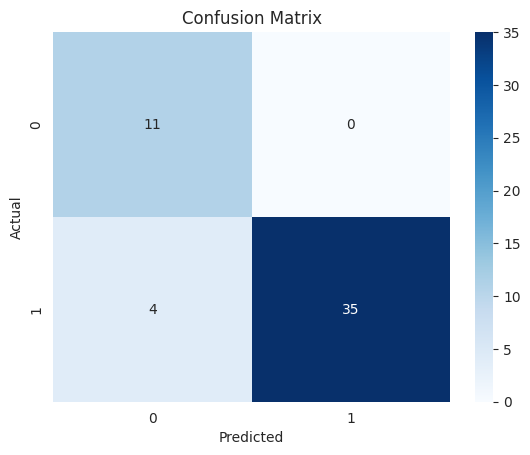

Classification Report:
              precision    recall  f1-score   support

           0       0.73      1.00      0.85        11
           1       1.00      0.90      0.95        39

    accuracy                           0.92        50
   macro avg       0.87      0.95      0.90        50
weighted avg       0.94      0.92      0.92        50



In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

accu_rec = recom_one['Actual_Recommendation']
pred_rec = recom_one['LLM_Recommended_Flag']
accuracy = accuracy_score(accu_rec, pred_rec)
print(f"Accuracy: {accuracy}")

cm = confusion_matrix(accu_rec, pred_rec)
print(f"Confusion Matrix:\n{cm}")

# Corrected line to plot confusion matrix using seaborn.heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

report = classification_report(accu_rec, pred_rec)
print(f"Classification Report:\n{report}")

The accuracy score, which is comparing the recommendation score provided by humans to the score predicted by the model. The model has a very high accuracy score.

The confusion matrix shows the number of true negatives in the upper left hand corner, false negatives in the upper right hand corner, false positives in the lower left hand corner and true positives in the lower right hand corner. The classification report shows the results of the confusioin matrix.

In [ ]:
SYSTEM_MESSAGE_ECS0 = """
You are a review analyst. For the Actaul Recommendation not equal to the LLM Recommendation,
use the original review Review.Text and the LLM_Recommend_Reason to give an
explanation for why the model’s decision may have differed from the human label.
"""

BASE_MESSAGES_ECS0 = [
    {"role": "system", "content": SYSTEM_MESSAGE_ECS0}
]

In [ ]:
def explain_prompt5(review_row):
    """
    Generates an explanation for why the LLM's recommendation might differ from the actual recommendation.
    Expects a pandas Series (a row) containing relevant review data.
    """

    user_content_prompt = (
        f"Actual Recommendation: {review_row['Actual_Recommendation']}\n"
        f"LLM Predicted Flag: {review_row['LLM_Recommended_Flag']}\n"
        f"LLM Predicted Reason: {review_row['LLM_Recommend_Reason']}\n"
        f"Original Review Text: {review_row['Review.Text']}\n\n"
        "Explain why the LLM's prediction might differ from the actual recommendation based on the provided information."
    )

    instructions = BASE_MESSAGES_ECS0 + [{
        "role": "user",
        "content": user_content_prompt
    }]

    response = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=instructions,
        temperature=0.0,
        max_tokens=200 # Adjusted max_tokens for a full explanation
    )
    raw_expl = response.choices[0].message.content
    print(raw_expl)
    return raw_expl


In [ ]:
sample_size2 = 10 # This variable is currently unused with the iteration over recom_one

llm_explanations = []

# Iterate over rows in recom_one DataFrame
for indx, row in tqdm(recom_one.iterrows(), total=len(recom_one), desc="Explaining Mismatched LLM predictions"):
    # Check if Actual Recommendation is not equal to LLM Recommended Flag
    if row['Actual_Recommendation'] != row['LLM_Recommended_Flag']:
        print(f"--- Mismatch found for Review Index: {row['Original_Index']} ---")
        raw_llm_expl = explain_prompt5(row) # Pass the entire row (pandas Series) to the function
        llm_explanations.append({
            "Original_Index": row['Original_Index'],
            "Actual_Recommendation": row['Actual_Recommendation'],
            "LLM_Recommended_Flag": row['LLM_Recommended_Flag'],
            "LLM_Recommended_Reason": row['LLM_Recommend_Reason'],
            "Explanation_of_Mismatch": raw_llm_expl
        })

# Convert the list of explanations to a DataFrame
if llm_explanations:
    llm_explanations_df = pd.DataFrame(llm_explanations)
    display(llm_explanations_df.head())
else:
    print("No mismatches found to explain.")

Explaining Mismatched LLM predictions:   0%|          | 0/50 [00:00<?, ?it/s]

--- Mismatch found for Review Index: 8037 ---


Explaining Mismatched LLM predictions:   2%|▏         | 1/50 [00:05<04:46,  5.84s/it]

The LLM's prediction of a flag (0) suggests that it interpreted the review as generally positive, focusing on the reviewer’s love for the dress and their admiration for its style, likening it to Audrey Hepburn. However, the reviewer explicitly states their dissatisfaction with the armpit design, which they believe detracts from the overall enjoyment of the dress. This strong negative sentiment regarding a specific aspect of the product is significant enough to lead to an overall negative recommendation (1).

The discrepancy arises because the LLM may have placed too much emphasis on the positive aspects mentioned at the beginning of the review, overlooking the critical feedback that ultimately influenced the reviewer’s final recommendation. The reviewer’s desire for a redesign of the armpits indicates a serious concern that affects their overall assessment, which the LLM did not fully capture in its reasoning. Thus, the LLM's prediction may have failed to adequately weigh the negative 

Explaining Mismatched LLM predictions:   8%|▊         | 4/50 [00:10<01:46,  2.32s/it]

The LLM's prediction of a flag (0) suggests that it interpreted the review as generally positive, focusing on the appreciation of the swimsuit's style. However, the actual recommendation (1) indicates a negative experience due to the lack of support in the chest area, which ultimately led to the return of the product. 

The discrepancy may arise from the LLM's emphasis on the positive aspects mentioned in the review, such as the style being loved, while underestimating the significance of the critical issue regarding support. The reviewer clearly states that the lack of support was a major disappointment, which directly influenced their decision to return the swimsuit. The LLM may have failed to fully weigh the impact of this negative aspect, leading to a more favorable prediction than warranted by the overall sentiment of the review.
--- Mismatch found for Review Index: 4821 ---


Explaining Mismatched LLM predictions:  70%|███████   | 35/50 [00:15<00:05,  2.98it/s]

The LLM's prediction of a flag of 0 suggests that it did not identify the review as negative, while the actual recommendation of 1 indicates that it was indeed considered negative. The discrepancy may stem from the LLM's interpretation of the review's tone and content. 

In the original review, the reviewer mentions that "the shirt was cute," which could be interpreted as a positive remark. However, the key issue lies in the dissatisfaction expressed regarding the fit of the shirt, particularly for someone who is petite. The LLM may have focused on the positive aspect of the shirt's appearance and overlooked the significant concern about the fit, which ultimately led to the reviewer's dissatisfaction.

The LLM's reasoning might not have fully accounted for the impact of the fit issue on the overall experience of the reviewer. While the reviewer acknowledges a positive attribute (the cuteness of the shirt), the primary concern about the fit being unsuitable for their body type is a crit

Explaining Mismatched LLM predictions: 100%|██████████| 50/50 [00:23<00:00,  2.10it/s]

The LLM's prediction of a flag (0) suggests that it did not identify the review as negative, likely focusing on the positive aspect of the material that the reviewer mentioned. However, the actual recommendation (1) indicates that the review should be flagged as negative due to the reviewer’s dissatisfaction with the fit of the product, which ultimately led to a return. 

The discrepancy arises because the LLM may have placed more weight on the positive comment about the material, overlooking the significant negative experience related to the fit. The reviewer explicitly states that the fit is "not for me," which is a clear indication of dissatisfaction, and the decision to return the items reinforces this negative sentiment. Thus, while the LLM recognized a positive element, it failed to fully account for the overall negative experience expressed by the reviewer, leading to a different recommendation.


Original_Index  Actual_Recommendation  LLM_Recommended_Flag  \
0            8037                      1                     0   
1           11051                      1                     0   
2            4821                      1                     0   
3           21198                      1                     0   

                              LLM_Recommended_Reason  \
0  The reviewer expresses strong dissatisfaction ...   
1  The reviewer appreciated the style of the swim...   
2  The review indicates dissatisfaction with the ...   
3  The reviewer had a negative experience with th...   

                             Explanation_of_Mismatch  
0  The LLM's prediction of a flag (0) suggests th...  
1  The LLM's prediction of a flag (0) suggests th...  
2  The LLM's prediction of a flag of 0 suggests t...  
3  The LLM's prediction of a flag (0) suggests th...

**Visualization of Sentiments Distribution**

 After generating results from all prompting techniques, it's crucial to visualize their outputs to better understand their behavior and performance. This helps us see if one technique tends to be more cautious (e.g., assigning more 'Neutral' sentiments) or if they generally agree on the sentiment of the reviews.
    
 **Questions:**
    
* How does the distribution of predicted Sentiment (Positive, Negative, Neutral) compare across the V2 versions of Zero-Shot, Few-Shot, and Chain-of-Thought? (Hint: Create a separate bar chart for each technique's V2 sentiment column).
    
* Are there noticeable differences in the counts? For example, does one technique identify more "Neutral" reviews than the others? What might this imply about its ability to handle nuance?
    



--- Sentiment Distribution Across All Versions ---


extracted_sentiment  positive  neutral  negative
Zero-Shot V1              0.6      0.2       0.2
Zero-Shot V2              0.2      0.2       0.6
Few-Shot V1               0.6      0.2       0.2
Few-Shot V2               0.2      0.0       0.4
CoT V1                    0.8      0.0       0.2
CoT V2                    0.2      0.4       0.4

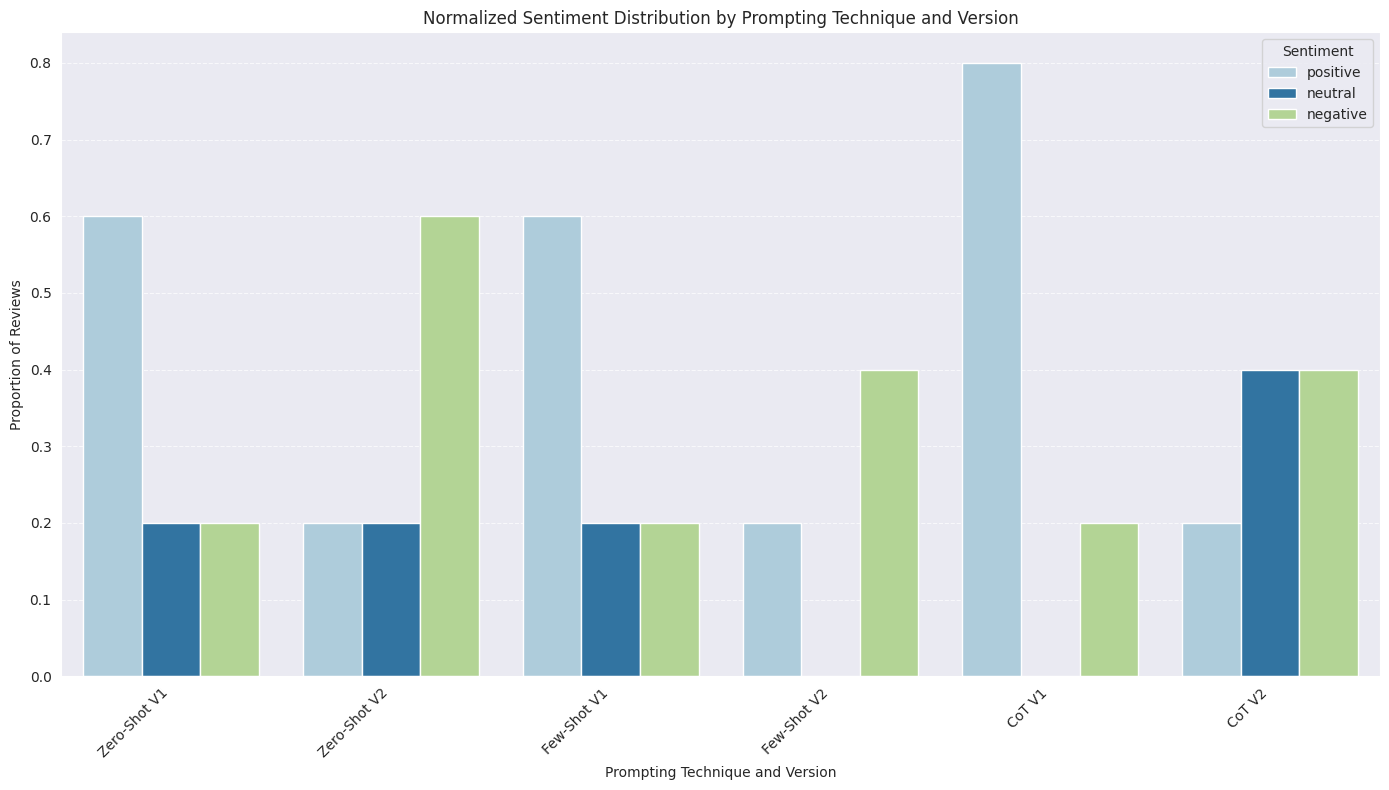

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import json
import re
import pandas as pd

def extract_sentiment_from_raw_output(raw_output_str):
    """
    Extracts sentiment (positive, neutral, negative) from raw LLM output strings.
    Handles JSON objects with a 'sentiment' key or direct keyword presence.
    """
    if not isinstance(raw_output_str, str):
        return None

    # First, try to extract the inner JSON string if wrapped in ```json\n...\n```
    match_json_block = re.search(r'```json\n(.*)```', raw_output_str, re.DOTALL)
    json_str_to_parse = match_json_block.group(1).strip() if match_json_block else raw_output_str

    try:
        parsed_data = json.loads(json_str_to_parse)
        if isinstance(parsed_data, dict) and 'sentiment' in parsed_data:
            return str(parsed_data['sentiment']).lower()
    except json.JSONDecodeError:
        pass # Not a JSON, or malformed JSON, proceed to keyword search

    # Fallback to keyword search for sentiments if not a clean JSON or key not found
    sentiment_keywords = ['positive', 'neutral', 'negative']
    for keyword in sentiment_keywords:
        if keyword in raw_output_str.lower():
            return keyword

    return None # No recognizable sentiment found

# --- Apply sentiment extraction to all relevant DataFrames ---

# Zero-Shot V1: Already has 'extracted_sentiment' from cell 1ff8af5f
# zero_shot_results_df['extracted_sentiment']

# Few-Shot V1: Already has 'extracted_sentiment' from cell HhA7w9hLcDeE
# few_shot_results_df1['extracted_sentiment']

# Zero-Shot V2
zero_shot_results_df_v2['extracted_sentiment'] = zero_shot_results_df_v2['raw_llm_output'].apply(extract_sentiment_from_raw_output)

# Few-Shot V2
few_shot_results_df_v2['extracted_sentiment'] = few_shot_results_df_v2['raw_llm_output'].apply(extract_sentiment_from_raw_output)

# CoT V1
cot_results_df['extracted_sentiment'] = cot_results_df['sentiment_raw_output'].apply(extract_sentiment_from_raw_output)

# CoT V2
cot_results_df_v2['extracted_sentiment'] = cot_results_df_v2['sentiment_raw_output'].apply(extract_sentiment_from_raw_output)

# --- Consolidate sentiment data for plotting ---

sentiment_counts = {
    'Zero-Shot V1': zero_shot_results_df['extracted_sentiment'].value_counts(normalize=True).reindex(['positive', 'neutral', 'negative'], fill_value=0),
    'Zero-Shot V2': zero_shot_results_df_v2['extracted_sentiment'].value_counts(normalize=True).reindex(['positive', 'neutral', 'negative'], fill_value=0),
    'Few-Shot V1': few_shot_results_df1['extracted_sentiment'].value_counts(normalize=True).reindex(['positive', 'neutral', 'negative'], fill_value=0),
    'Few-Shot V2': few_shot_results_df_v2['extracted_sentiment'].value_counts(normalize=True).reindex(['positive', 'neutral', 'negative'], fill_value=0),
    'CoT V1': cot_results_df['extracted_sentiment'].value_counts(normalize=True).reindex(['positive', 'neutral', 'negative'], fill_value=0),
    'CoT V2': cot_results_df_v2['extracted_sentiment'].value_counts(normalize=True).reindex(['positive', 'neutral', 'negative'], fill_value=0),
}

sentiment_comparison_df = pd.DataFrame(sentiment_counts).T

print("\n--- Sentiment Distribution Across All Versions ---")
display(sentiment_comparison_df)

# --- Plotting the comparison ---

sentiment_comparison_df_long = sentiment_comparison_df.reset_index().melt(id_vars='index', var_name='Sentiment', value_name='Proportion')
sentiment_comparison_df_long.rename(columns={'index': 'Technique_Version'}, inplace=True)

plt.figure(figsize=(14, 8))
sns.barplot(x='Technique_Version', y='Proportion', hue='Sentiment', data=sentiment_comparison_df_long, palette='Paired')
plt.title('Normalized Sentiment Distribution by Prompting Technique and Version')
plt.ylabel('Proportion of Reviews')
plt.xlabel('Prompting Technique and Version')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sentiment')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Comparison of Prompting Techniques:

## Observations and Insights


--- Average Retail Insight Polarity by Version ---


Version  Average_Polarity
0  Zero-Shot V1          0.204116
1  Zero-Shot V2          0.383810
2   Few-Shot V1          0.176667
3   Few-Shot V2          0.220000
4        CoT V1          0.013500
5        CoT V2          0.195771

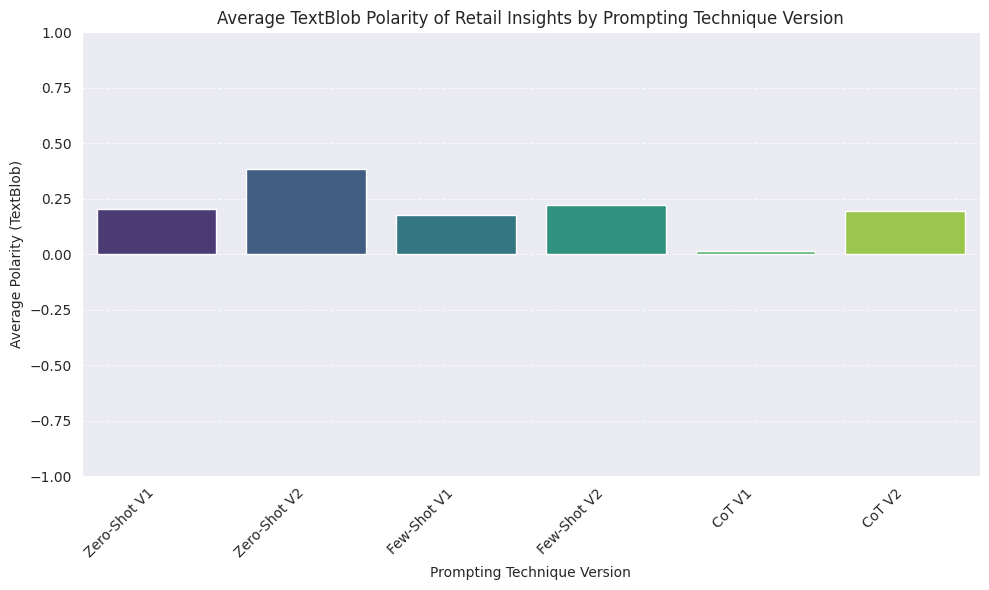

In [ ]:
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
import json
import re
import pandas as pd

def extract_retail_insight(raw_output_str):
    """
    Extracts the retail_insight from raw LLM output strings, handling JSON structures.
    """
    if not isinstance(raw_output_str, str):
        return ""

    # Try to parse as a direct JSON object (common for CoT components)
    try:
        parsed_data = json.loads(raw_output_str)
        if isinstance(parsed_data, dict) and 'retail_insight' in parsed_data:
            return parsed_data['retail_insight']
    except json.JSONDecodeError:
        pass # Not a direct JSON, try wrapped JSON

    # Try to extract JSON wrapped in ```json\n...\n``` (common for Zero-Shot/Few-Shot V1/V2)
    match_json_block = re.search(r'```json\n(.*)```', raw_output_str, re.DOTALL)
    if match_json_block:
        json_str_to_parse = match_json_block.group(1).strip()
        try:
            parsed_data = json.loads(json_str_to_parse)
            if isinstance(parsed_data, dict) and 'retail_insight' in parsed_data:
                return parsed_data['retail_insight']
        except json.JSONDecodeError:
            pass # Malformed wrapped JSON

    return "" # Return empty string if no insight found


# --- Apply retail insight extraction and TextBlob sentiment analysis ---

insight_polarities = {}

# Zero-Shot V1
zero_shot_results_df['retail_insight_text'] = zero_shot_results_df['raw_llm_output'].apply(extract_retail_insight)
zero_shot_results_df['retail_insight_polarity'] = zero_shot_results_df['retail_insight_text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
insight_polarities['Zero-Shot V1'] = zero_shot_results_df['retail_insight_polarity'].mean()

# Zero-Shot V2
zero_shot_results_df_v2['retail_insight_text'] = zero_shot_results_df_v2['raw_llm_output'].apply(extract_retail_insight)
zero_shot_results_df_v2['retail_insight_polarity'] = zero_shot_results_df_v2['retail_insight_text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
insight_polarities['Zero-Shot V2'] = zero_shot_results_df_v2['retail_insight_polarity'].mean()

# Few-Shot V1
few_shot_results_df1['retail_insight_text'] = few_shot_results_df1['raw_llm_output1'].apply(extract_retail_insight)
few_shot_results_df1['retail_insight_polarity'] = few_shot_results_df1['retail_insight_text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
insight_polarities['Few-Shot V1'] = few_shot_results_df1['retail_insight_polarity'].mean()

# Few-Shot V2
few_shot_results_df_v2['retail_insight_text'] = few_shot_results_df_v2['raw_llm_output'].apply(extract_retail_insight)
few_shot_results_df_v2['retail_insight_polarity'] = few_shot_results_df_v2['retail_insight_text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
insight_polarities['Few-Shot V2'] = few_shot_results_df_v2['retail_insight_polarity'].mean()

# CoT V1
cot_results_df['retail_insight_text'] = cot_results_df['retail_insight_raw_output'].apply(extract_retail_insight)
cot_results_df['retail_insight_polarity'] = cot_results_df['retail_insight_text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
insight_polarities['CoT V1'] = cot_results_df['retail_insight_polarity'].mean()

# CoT V2
cot_results_df_v2['retail_insight_text'] = cot_results_df_v2['retail_insight_raw_output'].apply(extract_retail_insight)
cot_results_df_v2['retail_insight_polarity'] = cot_results_df_v2['retail_insight_text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
insight_polarities['CoT V2'] = cot_results_df_v2['retail_insight_polarity'].mean()

# --- Display and Plot Results ---

polarity_df = pd.DataFrame(insight_polarities.items(), columns=['Version', 'Average_Polarity'])

print("\n--- Average Retail Insight Polarity by Version ---")
display(polarity_df)

plt.figure(figsize=(10, 6))
sns.barplot(x='Version', y='Average_Polarity', data=polarity_df, palette='viridis')
plt.title('Average TextBlob Polarity of Retail Insights by Prompting Technique Version')
plt.xlabel('Prompting Technique Version')
plt.ylabel('Average Polarity (TextBlob)')
plt.ylim(-1, 1) # Polarity ranges from -1 to 1
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

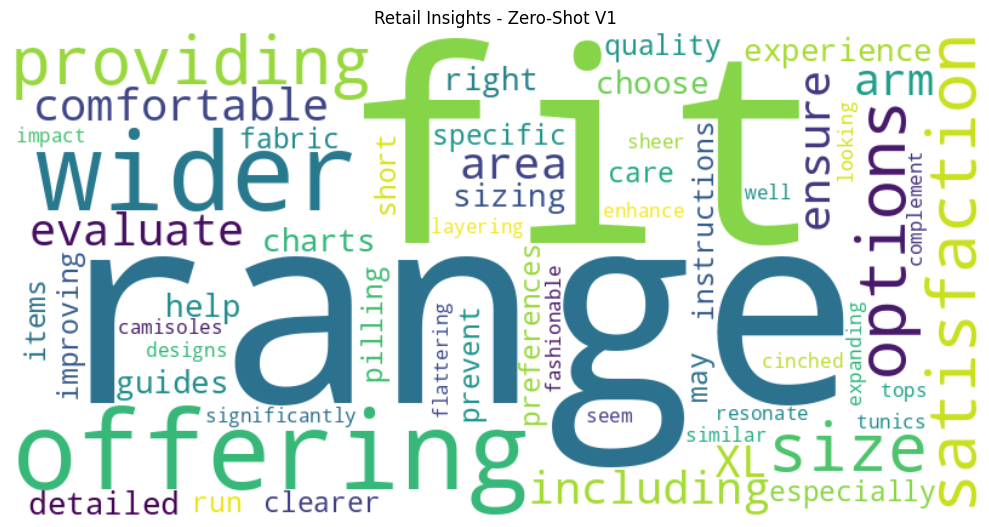

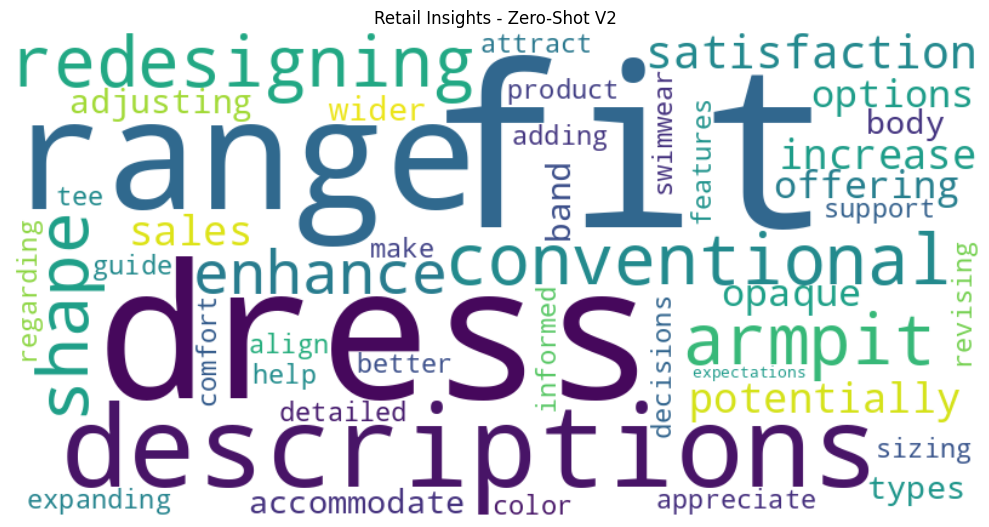

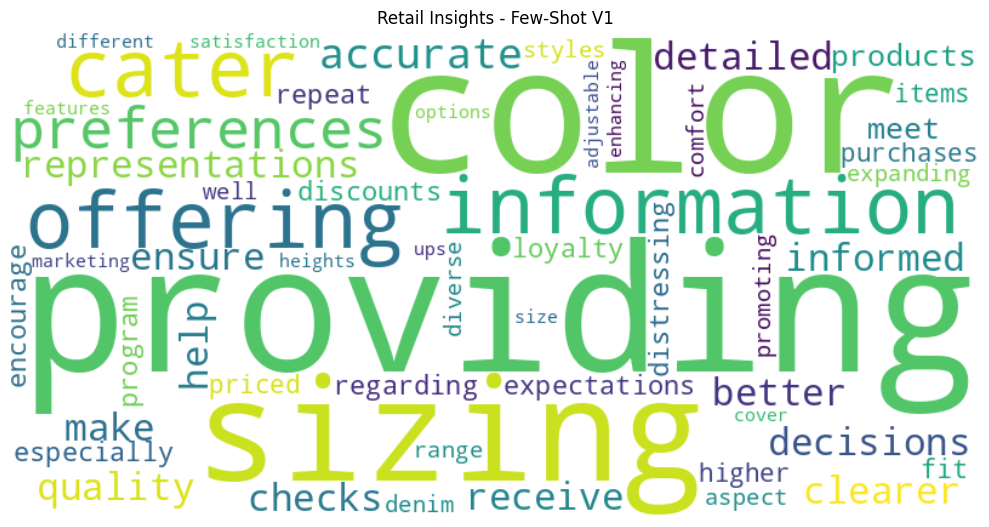

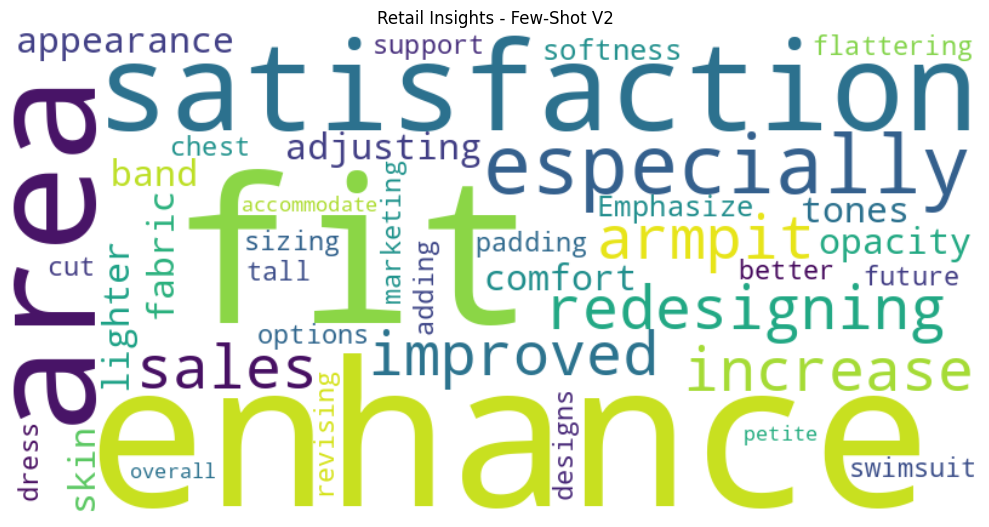

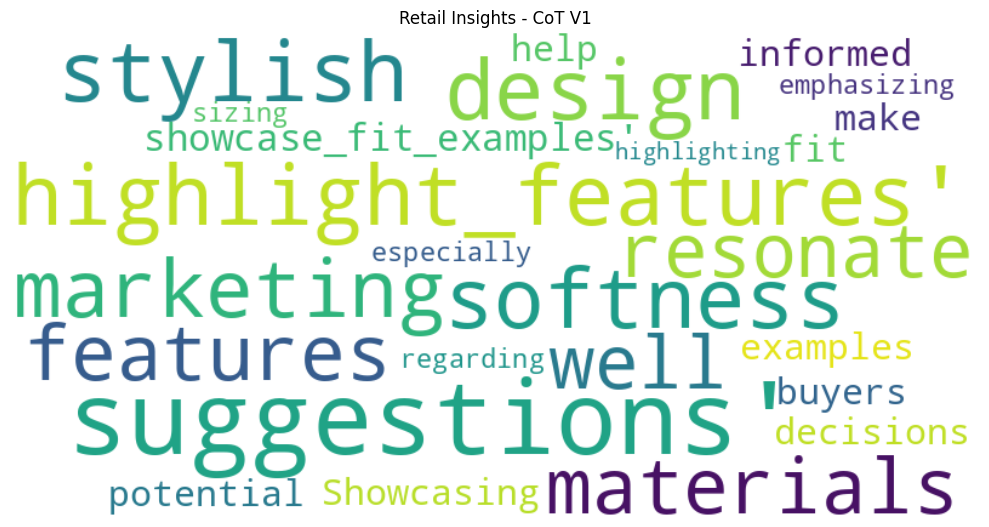

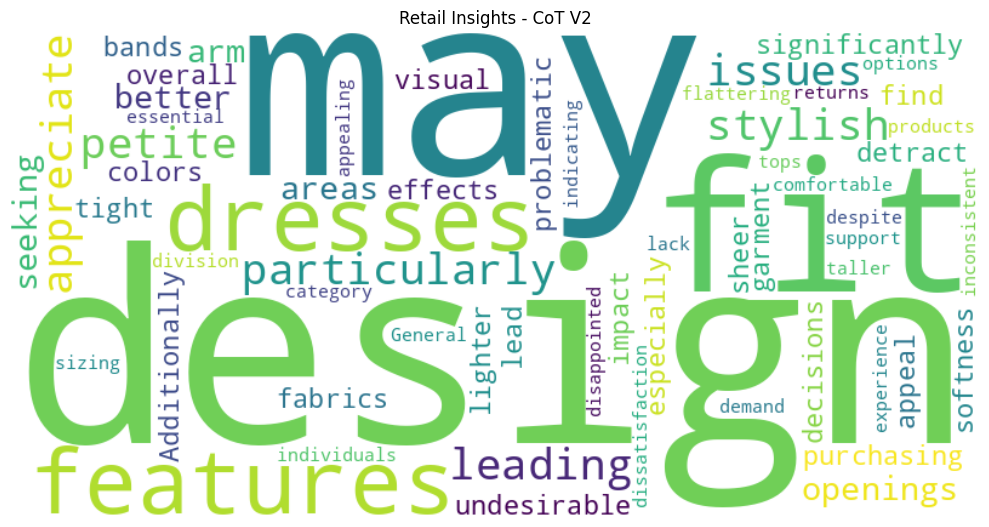

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Define common stopwords for WordCloud
stopwords = set(STOPWORDS)
# Add any domain-specific stopwords if necessary (e.g., 'review', 'customer', 'product')
stopwords.update(['customer', 'consider', 'customers']) # Added 'customer' and 'consider'

insight_texts = {
    'Zero-Shot V1': " ".join(zero_shot_results_df['retail_insight_text'].dropna().astype(str)),
    'Zero-Shot V2': " ".join(zero_shot_results_df_v2['retail_insight_text'].dropna().astype(str)),
    'Few-Shot V1': " ".join(few_shot_results_df1['retail_insight_text'].dropna().astype(str)),
    'Few-Shot V2': " ".join(few_shot_results_df_v2['retail_insight_text'].dropna().astype(str)),
    'CoT V1': " ".join(cot_results_df['retail_insight_text'].dropna().astype(str)),
    'CoT V2': " ".join(cot_results_df_v2['retail_insight_text'].dropna().astype(str)),
}

for version, text in insight_texts.items():
    plt.figure(figsize=(10, 6)) # Create a new figure for each word cloud
    if text:
        wordcloud = WordCloud(
            stopwords=stopwords,
            background_color='white',
            max_words=100,
            collocations=False,
            width=800,
            height=400
        ).generate(text)

        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f'Retail Insights - {version}', color='black')
        plt.axis('off')
    else:
        plt.text(0.5, 0.5, f'No insights for {version}', horizontalalignment='center', verticalalignment='center', fontsize=12, color='black')
        plt.title(f'Retail Insights - {version}', color='black')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

The word cloud makes words that occur the most frequently bigger, suggesting search and parsing parameters for the model to focus on in the reviews. Some examples of these are design, fit, enhance, sizing, providing, color, dress and range.

# Generating Actionable Product Improvement Suggestions


### Short-Term Actionable Recommendations:

1. From positive reviews - emphasize the quality and comfort of products in advertizing. Many reviews compliment the materials and feel of the garments, the softness and color.

2. From positive reviews - Show how the garments fit into an existing wardrobe, show the interchangeability with piecs already purchased. The best and most functional garments work well when they can be worn with many other different things, extending a wardrobe rather than being stand-alone pieces.

3. From neutral reviews - Consider investing in high-quality images and videos that accurately represent the product, as this can enhance customer expectations and satisfaction.

4. From the wordcloud, the most common words, which appear largest in the cloud, can be used as parsing parameters for the model to look for in the reviews, aggregate these, and summarize positive and negative sentiments. One particular example is the fit of some of the garments, especially the upper part. Another is sizing, which seems to run smaller that expected.

### Long-Term actionable Business Recommendations:

1. From positive reviews - Consider a more search-friendly, accurate system, as some reviewers have mentioned sending time looking for a particular type of time. This can shorten search time and improve customer experience.

2. From negative reviews - Consider quality controls on sizing and fit. Many complaints mentioned the fit runnig small in some cases, for the printed size, and the fit being queestionable. This could be an issue with the outsourced manufacturer, or the materials used.

3. From negative reviews - Consider expanding color options and promoting the lightweight material, which is a logical recommendation based on the review. It shows an understanding of customer preferences.

4. From neutral reviews - Consider asking for more details from the reviewers, such as gender, in additiion to age. Some reviews were ambiguous, though a general surmise could be made from the shopping habits of the customers: more dresses were sold than any other class of items, and more tops were sold, suggesting that the prevailing demographic is women. This suggests an untapped market for men, though targetting the current demograhic of young women could pay off in the future.

### **Observations and Insights**

1. The version1 few-shot model was the most accurate in matching the sentiment with the human assessmet, though the zero-shot uses the least tokens, expense-wise.
2. The system was effective in interpreting the reviews and sentiments, and in composing appropriate responses and retail insights.
3. To save time, I had the ggole AI create the V2 version of the models. These were not as consistent in their output as the models I coded, suggesting that an AI possibly should not be entrusted with creating the model code, not without human in the loop verification. The AI was good at correcting the code I generated, but not at creating the code from scratch.
4. I found out that the prompt uses tokens, as well as the output, which can add to the cost, suggesting that few-shot prompting and chain of thought will be more expensive token-wise than the zero-shot prompt. Depending on the criticality of the system under investigation, the cost of prompting and output must be a consideration. Chain of thought prompting was also more expensive time-wise, as I needed to insure that the output from one prompt was the input going into the next, for continuity. For more critical data, few-shot prompting would be my suggestion, token-expense-wise.

## **Conclusion**

This generative AI model can be an effective tool in retail business, quickly finding suggestions and insights into the customers' preferences, trouble areas to be resolved, and giving immediate customer engagement, which can drive repeat sales.